# About The Dataset

###### Introduction
This case study aims to :
    ---> Give  an idea of applying EDA in a real business scenario. 
    ---> Develop a basic understanding of risk analytics in banking and financial services 
    ---> Understand how data is used to minimise the risk of losing money while lending to customers
 
Business Understanding
When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. 
Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.


The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

The client with payment difficulties: he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

All other cases: All other cases when the payment is paid on time.

 
When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

Approved: The Company has approved loan Application

Cancelled: The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.

Refused: The company had rejected the loan (because the client does not meet their requirements etc.).

Unused offer:  Loan has been cancelled by the client but on different stages of the process.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default. 

Business Objectives
This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough).

 

#### Importing Libraries

In [6]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
#added to get the plot without delay or second execution
%matplotlib inline

from scipy import stats

import os
print(os.getcwd())
#os.chdir(r"D:\CREDIT EDA CASE")
print(os.getcwd())

C:\Users\SHARIE R NATH\Documents\CREDIT EDA CASE
C:\Users\SHARIE R NATH\Documents\CREDIT EDA CASE


In [7]:
import re
import datetime

# seaborn : advanced visualization
import seaborn as sns

pd.options.mode.chained_assignment = None #set it to None to remove SettingWithCopyWarning
pd.options.display.float_format = '{:.4f}'.format #set it to convert scientific noations such as 4.225108e+11 to 422510842796.00
pd.set_option('display.max_columns', 100) # to display all the columns

np.set_printoptions(suppress=True,formatter={'float_kind':'{:f}'.format})

import warnings
warnings.filterwarnings('ignore') # if there are any warning due to version mismatch, it will be ignored

# Data Sourcing

###### About the dataset

1. 'application_data.csv'  contains all the information of the client at the time of application. 
The data is about whether a client has payment difficulties.

2. 'previous_application.csv' contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer. 

3. 'columns_description.csv' is data dictionary which describes the meaning of the variables.

In [8]:
# reading the csv files
appdf=pd.read_csv("./application_data.csv")
prevdf=pd.read_csv("./previous_application.csv")


In [9]:
print("The application dataset is " ,appdf.shape)
print ("The previous application datset is" , prevdf.shape)

The application dataset is  (307511, 122)
The previous application datset is (1670214, 37)



#### Combining two datasets on SK_ID_CURR and removing duplicates

In [10]:
combined_df = pd.merge(appdf,prevdf,on ='SK_ID_CURR')
combined_df.shape

(1413701, 158)


# DATA CLEANING

### Fixing Rows and Columns

#### Removing duplicate Entries 

In [11]:
combined_df = combined_df.drop_duplicates(subset=('SK_ID_PREV','SK_ID_CURR'),keep="first").reset_index(drop=True)
combined_df.shape

(1413701, 158)

Duplication not present

#### Renaming Columns

In [12]:
combined_df.rename(columns={'AMT_CREDIT_x':'AMT_CREDIT_CURR',
                          'AMT_ANNUITY_x':'AMT_ANNUITY_CURR',
                          'AMT_GOODS_PRICE_x':'AMT_GOODS_PRICE_CURR',
                          'HOUR_APPR_PROCESS_START_x' :'HOUR_APPR_PROCESS_START_CURR',
                          'AMT_CREDIT_y':'AMT_CREDIT_PREV',
                          'AMT_ANNUITY_y':'AMT_ANNUITY_PREV',
                          'AMT_GOODS_PRICE_y':'AMT_GOODS_PRICE_PREV',
                          'HOUR_APPR_PROCESS_START_y' :'HOUR_APPR_PROCESS_START_PREV',
                          'NAME_CONTRACT_TYPE_x':'NAME_CONTRACT_TYPE_CURR',
                          'NAME_TYPE_SUITE_x': 'NAME_TYPE_SUITE_CURR',
                          'WEEKDAY_APPR_PROCESS_START_x': 'WEEKDAY_APPR_PROCESS_START_CURR',
                          'NAME_CONTRACT_TYPE_y': 'NAME_CONTRACT_TYPE_PREV',
                          'WEEKDAY_APPR_PROCESS_START_y': 'WEEKDAY_APPR_PROCESS_START_PREV',
                          'NAME_TYPE_SUITE_y':'NAME_TYPE_SUITE_PREV'}, 
                           inplace=True)
 

#### Changing dataype for certain columns to categorical

In [13]:
list_category=['CNT_CHILDREN','FLAG_MOBIL','FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL','CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION', 
       'LIVE_CITY_NOT_WORK_CITY','FLAG_DOCUMENT_2','FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4',
       'FLAG_DOCUMENT_5','FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11','FLAG_DOCUMENT_12',
       'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14','FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17','FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20','FLAG_DOCUMENT_21',
       'NFLAG_INSURED_ON_APPROVAL','NFLAG_LAST_APPL_IN_DAY']


for col in list_category:
     combined_df[col] = combined_df[col].astype('category')

#### Columns segregated based on datatype as numerical,object and categorical

In [14]:
categ_df= combined_df.select_dtypes('object')
numeric_df= combined_df.select_dtypes([np.number])
derived_categ_df=combined_df.select_dtypes('category')
    
    

### Dealing with Missing Data

In [15]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1413701 entries, 0 to 1413700
Columns: 158 entries, SK_ID_CURR to NFLAG_INSURED_ON_APPROVAL
dtypes: category(38), float64(78), int64(10), object(32)
memory usage: 1.3+ GB


#### Dealing with null values in categorical columns

In [16]:
categ_df=combined_df.select_dtypes("object")
categ_df.shape

(1413701, 32)

##### Finding categorical columns with any null value

In [17]:
NA_col=categ_df.isnull().sum()
NA_col = NA_col[NA_col.values > 0]
NA_col

NAME_TYPE_SUITE_CURR      3526
OCCUPATION_TYPE         457580
FONDKAPREMONT_MODE      964374
HOUSETYPE_MODE          704166
WALLSMATERIAL_MODE      713386
EMERGENCYSTATE_MODE     665351
NAME_TYPE_SUITE_PREV    694672
PRODUCT_COMBINATION        313
dtype: int64

In [18]:
for i in list(categ_df.columns):
     temp=combined_df[i]
     if temp.isnull().any():
        print (i)
        print(combined_df[i].unique())
    

NAME_TYPE_SUITE_CURR
['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A'
 'Group of people' 'Other_B' nan]
OCCUPATION_TYPE
['Laborers' 'Core staff' 'Accountants' 'Managers' nan 'Drivers'
 'Sales staff' 'Cleaning staff' 'Private service staff' 'Medicine staff'
 'Security staff' 'Cooking staff' 'High skill tech staff'
 'Waiters/barmen staff' 'Low-skill Laborers' 'Realty agents' 'Secretaries'
 'IT staff' 'HR staff']
FONDKAPREMONT_MODE
['reg oper account' nan 'org spec account' 'reg oper spec account'
 'not specified']
HOUSETYPE_MODE
['block of flats' nan 'terraced house' 'specific housing']
WALLSMATERIAL_MODE
['Stone, brick' 'Block' nan 'Panel' 'Mixed' 'Others' 'Monolithic' 'Wooden']
EMERGENCYSTATE_MODE
['No' nan 'Yes']
NAME_TYPE_SUITE_PREV
[nan 'Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A'
 'Other_B' 'Group of people']
PRODUCT_COMBINATION
['POS other with interest' 'Cash X-Sell: low' 'POS industry with interest'
 'POS household with interest' 'POS mobile wi

##### Replacing nan values in category columns with appropriate values

In [19]:
#NAME_TYPE_SUITE_x nan replaced with "not specified"
combined_df['NAME_TYPE_SUITE_CURR'].fillna("not specified",inplace=True)

#OCCUPATION_TYPE nan replace with "Others"
combined_df['OCCUPATION_TYPE'].fillna("Others",inplace=True)


#FONDKAPREMONT_MODE nan replaced with "not specified"
combined_df['FONDKAPREMONT_MODE'].fillna("not specified",inplace=True)


#HOUSETYPE_MODE nan replaced with "not specified"
combined_df['HOUSETYPE_MODE'].fillna("not specified",inplace=True)

#WALLSMATERIAL_MODE nan replaced with "Others"
combined_df['WALLSMATERIAL_MODE'].fillna("Others",inplace=True)

#EMERGENCYSTATE_MODE nan replaced with "not specified"
combined_df['EMERGENCYSTATE_MODE'].fillna("not specified",inplace=True)


#NAME_TYPE_SUITE_y nan replaced with "not specified"
combined_df['NAME_TYPE_SUITE_PREV'].fillna("not specified",inplace=True)

#PRODUCT_COMBINATION nan replaced with "not specified"
combined_df['PRODUCT_COMBINATION'].fillna("not specified",inplace=True)


In [20]:
#Redefined datatypes with modified datset

categ_df= combined_df.select_dtypes('object')
numeric_df= combined_df.select_dtypes([np.number])
derived_categ_df=combined_df.select_dtypes('category')
 
        

In [21]:
categ_df.isnull().any().sum()

0

###### Replaced all null values in categorical columns with appropriate values

#### Dealing with null values in numerical columns

In [22]:
numeric_df=combined_df.select_dtypes([np.number])
numeric_df.shape

(1413701, 88)

In [23]:
numeric_df.columns

Index(['SK_ID_CURR', 'TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_CURR',
       'AMT_ANNUITY_CURR', 'AMT_GOODS_PRICE_CURR',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'HOUR_APPR_PROCESS_START_CURR', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI',

#### Plotting columns with max null values

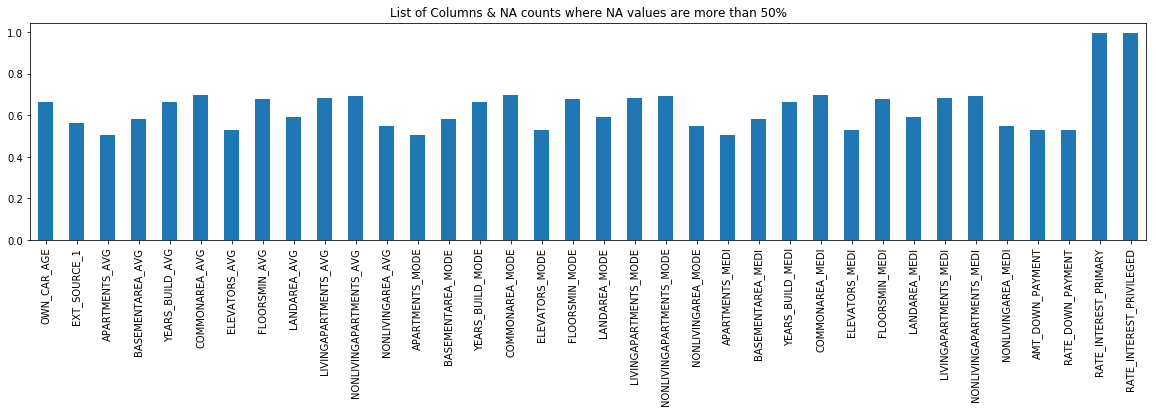

In [24]:
NA_col = numeric_df.isnull().mean()
#NA_col = NA_col[NA_col.values >(0.3*len(combined_df))]
NA_col = NA_col[NA_col.values > 0.5]
plt.figure(figsize=(20,4))
NA_col.plot(kind='bar')
plt.title('List of Columns & NA counts where NA values are more than 50%')
plt.show()

In [25]:
combined_df.drop(['RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED'], axis=1, inplace=True)

In [26]:
numeric_df=combined_df.select_dtypes([np.number])

In [27]:
numeric_df.columns

Index(['SK_ID_CURR', 'TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_CURR',
       'AMT_ANNUITY_CURR', 'AMT_GOODS_PRICE_CURR',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'HOUR_APPR_PROCESS_START_CURR', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI',

##### RATE_INTEREST_PRIMARY and RATE_INTEREST_PRIVILEGED removed

In [28]:
combined_df.shape

(1413701, 156)

### DETECTING AD REMOVING OUTLIERS

#### Function to detect outliers using Inter Quartile Value (IQR) Method

In [29]:
def detect_iqr_outlier(dataset):

#Fist sorting the dataset
#Finding first quartile and third quartile
#Find the IQR which is the difference between third and first quartile
#Find lower and upper bound
    outliers=[]
    sorted(dataset)
    q1=dataset.quantile(0.25)
    q3= dataset.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr)
    for y in dataset:
         
        if (lower_bound > y or y > upper_bound):
            outliers.append(y)
    return outliers


#### Function to detect outliers using z-score method 

In [30]:
def detect_outlier(col_1):
    outliers=[]
    threshold=1
    data_1=combined_df[col_1]
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

#### Function to plot box plots for identifying outliers 

In [31]:
def plot_box(column_list):
    plt.figure(figsize=(30,9))
    combined_df[column_list].boxplot()
    plt.title("Box plot for outliers", fontsize=20)
    plt.show()

#### Box plots to identify any outliers in the numerical columns

##### Columns are taken as batch  of columns at a time 

###### Identifying columns with Outliers

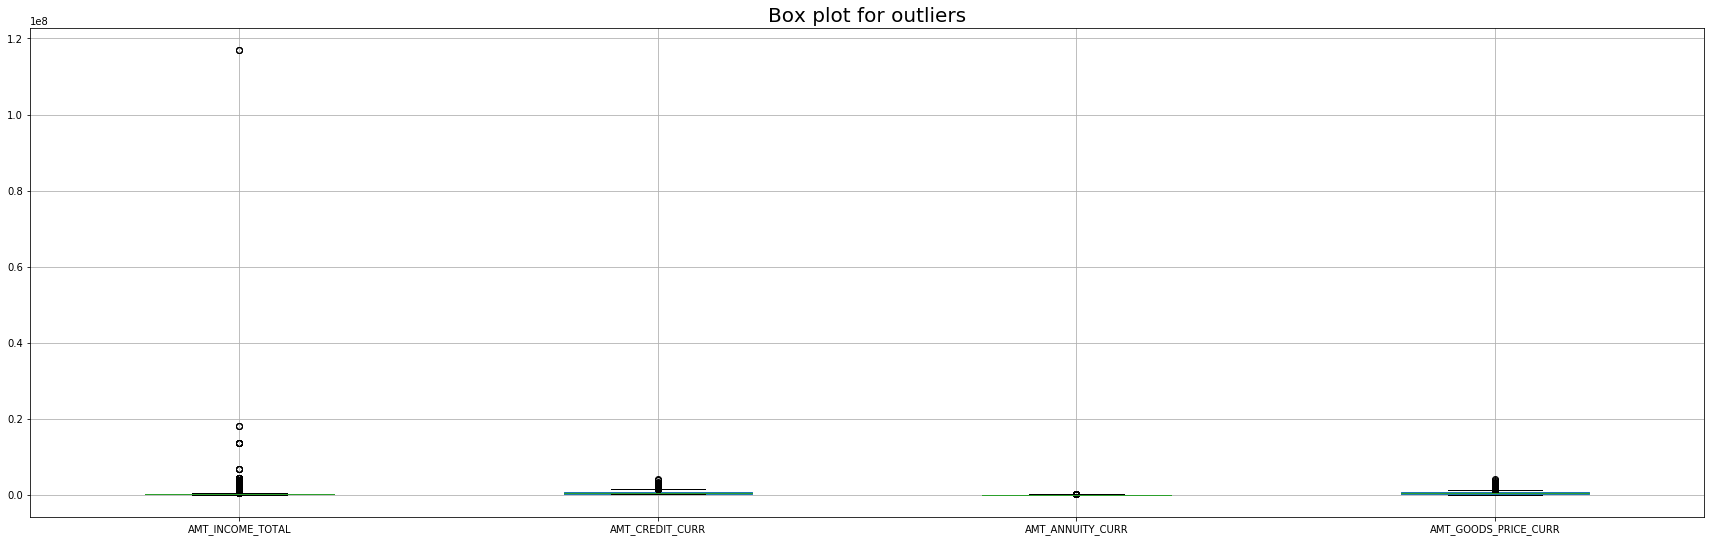

In [32]:
num_cols=numeric_df.columns[2:6]
plot_box(num_cols)

###### Detecting and Removing outliers

In [33]:
#Detecting outliers in AMT_INCOME_TOTAL
num_cols=numeric_df.columns[0:6]
for i in num_cols:
    outlier_datapoints = detect_iqr_outlier(combined_df[i])
    print(i)
    print(sorted(set(outlier_datapoints)))

SK_ID_CURR
[]
TARGET
[1]
AMT_INCOME_TOTAL
[349200.0, 349875.0, 351000.0, 351891.0, 351900.0, 352350.0, 353250.0, 354600.0, 354879.0, 355050.0, 355500.0, 356625.0, 356850.0, 357750.0, 358200.0, 359100.0, 360000.0, 360450.0, 360900.0, 362061.0, 362250.0, 362911.5, 364500.0, 365850.0, 366750.0, 369000.0, 371250.0, 371925.0, 373230.0, 373500.0, 373950.0, 374220.0, 375750.0, 377145.0, 378000.0, 378900.0, 380700.0, 381150.0, 381375.0, 382500.0, 382657.5, 383400.0, 385200.0, 386100.0, 386473.5, 387000.0, 388350.0, 389250.0, 391500.0, 392625.0, 392850.0, 393750.0, 394353.0, 395100.0, 395433.0, 396000.0, 396922.5, 400500.0, 400981.5, 401161.5, 402376.5, 402750.0, 403650.0, 404406.0, 405000.0, 409500.0, 410400.0, 410850.0, 411750.0, 412308.0, 414000.0, 414031.5, 415813.5, 416322.0, 418500.0, 422100.0, 423000.0, 426019.5, 427050.0, 427500.0, 432000.0, 433350.0, 434250.0, 435600.0, 436500.0, 438750.0, 440100.0, 441000.0, 442350.0, 442953.0, 443250.0, 443700.0, 445050.0, 445500.0, 450000.0, 450225.

AMT_ANNUITY_CURR
[61132.5, 61137.0, 61150.5, 61155.0, 61159.5, 61168.5, 61186.5, 61191.0, 61195.5, 61204.5, 61213.5, 61222.5, 61227.0, 61254.0, 61258.5, 61276.5, 61281.0, 61285.5, 61290.0, 61308.0, 61312.5, 61326.0, 61357.5, 61362.0, 61371.0, 61389.0, 61398.0, 61402.5, 61407.0, 61416.0, 61420.5, 61425.0, 61434.0, 61438.5, 61443.0, 61447.5, 61456.5, 61461.0, 61470.0, 61497.0, 61501.5, 61510.5, 61519.5, 61537.5, 61542.0, 61560.0, 61582.5, 61587.0, 61596.0, 61600.5, 61618.5, 61627.5, 61632.0, 61641.0, 61650.0, 61654.5, 61659.0, 61663.5, 61672.5, 61699.5, 61713.0, 61726.5, 61731.0, 61735.5, 61740.0, 61749.0, 61753.5, 61758.0, 61762.5, 61767.0, 61776.0, 61780.5, 61785.0, 61789.5, 61798.5, 61803.0, 61807.5, 61816.5, 61821.0, 61834.5, 61843.5, 61866.0, 61875.0, 61879.5, 61884.0, 61888.5, 61897.5, 61906.5, 61911.0, 61915.5, 61920.0, 61938.0, 61942.5, 61951.5, 61956.0, 61969.5, 61974.0, 61978.5, 62005.5, 62010.0, 62014.5, 62019.0, 62028.0, 62041.5, 62046.0, 62055.0, 62068.5, 62073.0, 62082.0, 6

AMT_GOODS_PRICE_CURR
[1345500.0, 1350000.0, 1354500.0, 1359000.0, 1363500.0, 1368000.0, 1372500.0, 1377000.0, 1381500.0, 1386000.0, 1388862.0, 1390500.0, 1395000.0, 1399500.0, 1404000.0, 1408500.0, 1413000.0, 1415259.0, 1417500.0, 1422000.0, 1426500.0, 1431000.0, 1435500.0, 1439248.5, 1440000.0, 1444500.0, 1449000.0, 1453500.0, 1458000.0, 1458859.5, 1462500.0, 1467000.0, 1471500.0, 1474663.5, 1476000.0, 1480500.0, 1481535.0, 1485000.0, 1489500.0, 1494000.0, 1496893.5, 1498500.0, 1503000.0, 1507500.0, 1512000.0, 1516500.0, 1521000.0, 1525500.0, 1530000.0, 1534500.0, 1539000.0, 1543500.0, 1548000.0, 1552500.0, 1557000.0, 1561500.0, 1566000.0, 1570500.0, 1575000.0, 1579500.0, 1584000.0, 1588500.0, 1593000.0, 1597500.0, 1602000.0, 1606500.0, 1611000.0, 1615500.0, 1620000.0, 1624500.0, 1629000.0, 1633500.0, 1638000.0, 1639431.0, 1642500.0, 1647000.0, 1651500.0, 1656000.0, 1660500.0, 1665000.0, 1669500.0, 1674000.0, 1677942.0, 1678500.0, 1683000.0, 1687500.0, 1692000.0, 1696500.0, 1701000.0,

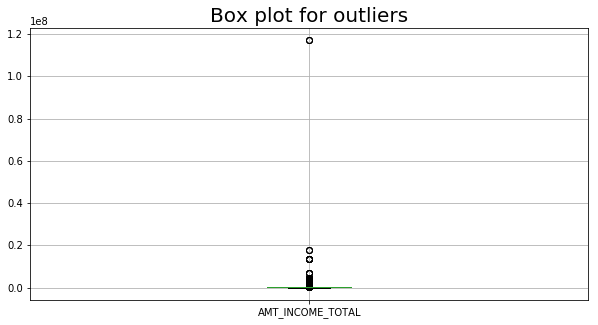

In [34]:
plt.figure(figsize=(10,5))
combined_df.boxplot(column='AMT_INCOME_TOTAL')
plt.title("Box plot for outliers", fontsize=20)
plt.show()

In [35]:
#Removing ouliers in AMT_AMT_INCOME_TOTAL 
#combined_df.drop(combined_df[combined_df['AMT_INCOME_TOTAL']==117000000.0].index,inplace=True)

#combined_df.drop(combined_df[combined_df['AMT_INCOME_TOTAL']==18000090.0].index,inplace=True)

combined_df.drop(combined_df[combined_df['AMT_INCOME_TOTAL']>=13500000.0].index,inplace=True)

In [36]:
combined_df.shape

(1413688, 156)

###### Identifying columns with Outliers

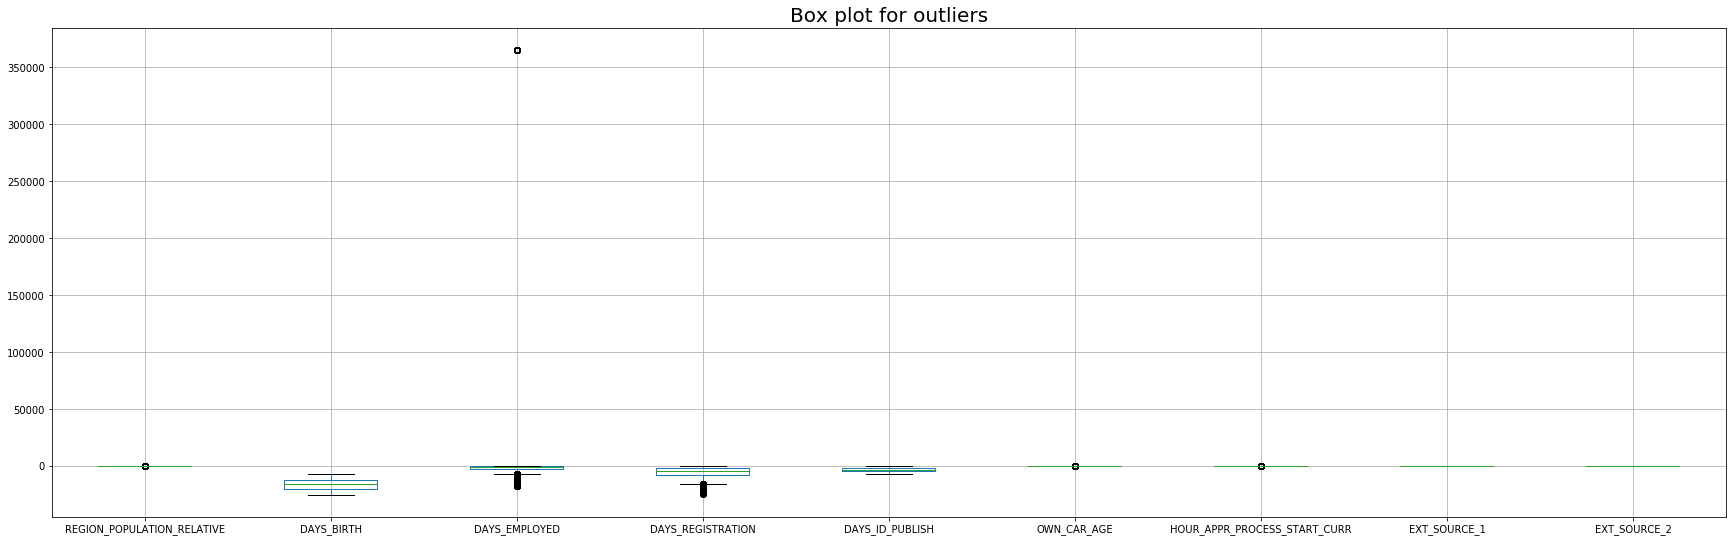

In [37]:
num_cols=numeric_df.columns[6:15]
plot_box(num_cols)

###### Detecting and Removing outliers

In [38]:
num_cols=numeric_df.columns[6:15]
for i in num_cols:
    outlier_datapoints = detect_iqr_outlier(combined_df[i])
    print(i)
    print(sorted(set(outlier_datapoints)))

REGION_POPULATION_RELATIVE
[0.072508]
DAYS_BIRTH
[]
DAYS_EMPLOYED
[-17912, -17583, -17546, -17531, -17522, -17170, -17139, -16852, -16849, -16836, -16767, -16651, -16632, -16607, -16554, -16538, -16499, -16495, -16492, -16481, -16452, -16429, -16424, -16375, -16365, -16364, -16360, -16358, -16352, -16348, -16343, -16314, -16310, -16308, -16304, -16266, -16265, -16263, -16260, -16236, -16221, -16220, -16169, -16160, -16142, -16135, -16133, -16121, -16113, -16103, -16093, -16069, -16061, -16037, -16032, -15943, -15911, -15890, -15882, -15871, -15860, -15845, -15837, -15834, -15791, -15783, -15729, -15727, -15726, -15713, -15699, -15691, -15689, -15688, -15687, -15676, -15661, -15632, -15629, -15625, -15578, -15569, -15568, -15543, -15542, -15530, -15524, -15516, -15509, -15499, -15488, -15477, -15476, -15474, -15473, -15431, -15427, -15422, -15412, -15382, -15371, -15369, -15368, -15342, -15338, -15334, -15327, -15323, -15303, -15300, -15290, -15285, -15277, -15238, -15229, -15227, -1522

DAYS_REGISTRATION
[-24672.0, -23416.0, -22928.0, -22858.0, -22701.0, -22442.0, -22392.0, -22113.0, -21887.0, -21865.0, -21249.0, -21244.0, -21146.0, -20981.0, -20841.0, -20838.0, -20741.0, -20701.0, -20623.0, -20571.0, -20569.0, -20560.0, -20516.0, -20452.0, -20447.0, -20136.0, -20096.0, -19985.0, -19795.0, -19706.0, -19695.0, -19660.0, -19636.0, -19579.0, -19513.0, -19504.0, -19488.0, -19463.0, -19424.0, -19370.0, -19344.0, -19265.0, -19244.0, -19207.0, -19183.0, -19170.0, -19159.0, -19152.0, -19134.0, -19040.0, -19027.0, -18928.0, -18926.0, -18864.0, -18761.0, -18758.0, -18718.0, -18660.0, -18645.0, -18616.0, -18584.0, -18579.0, -18572.0, -18437.0, -18417.0, -18386.0, -18367.0, -18350.0, -18347.0, -18341.0, -18337.0, -18294.0, -18291.0, -18289.0, -18231.0, -18228.0, -18208.0, -18197.0, -18161.0, -18132.0, -18130.0, -18125.0, -18123.0, -18105.0, -18098.0, -18053.0, -18042.0, -18037.0, -18034.0, -18006.0, -17999.0, -17995.0, -17974.0, -17965.0, -17959.0, -17951.0, -17921.0, -17918.0, -

In [39]:
# ouliers in DAYS_EMPLOYED
combined_df[combined_df['DAYS_EMPLOYED']==365243].shape


(273583, 156)

273583 rows with value 365243 .This clearly indicates the value is not an outlier .. rather unemployed

###### Identifying columns with Outliers

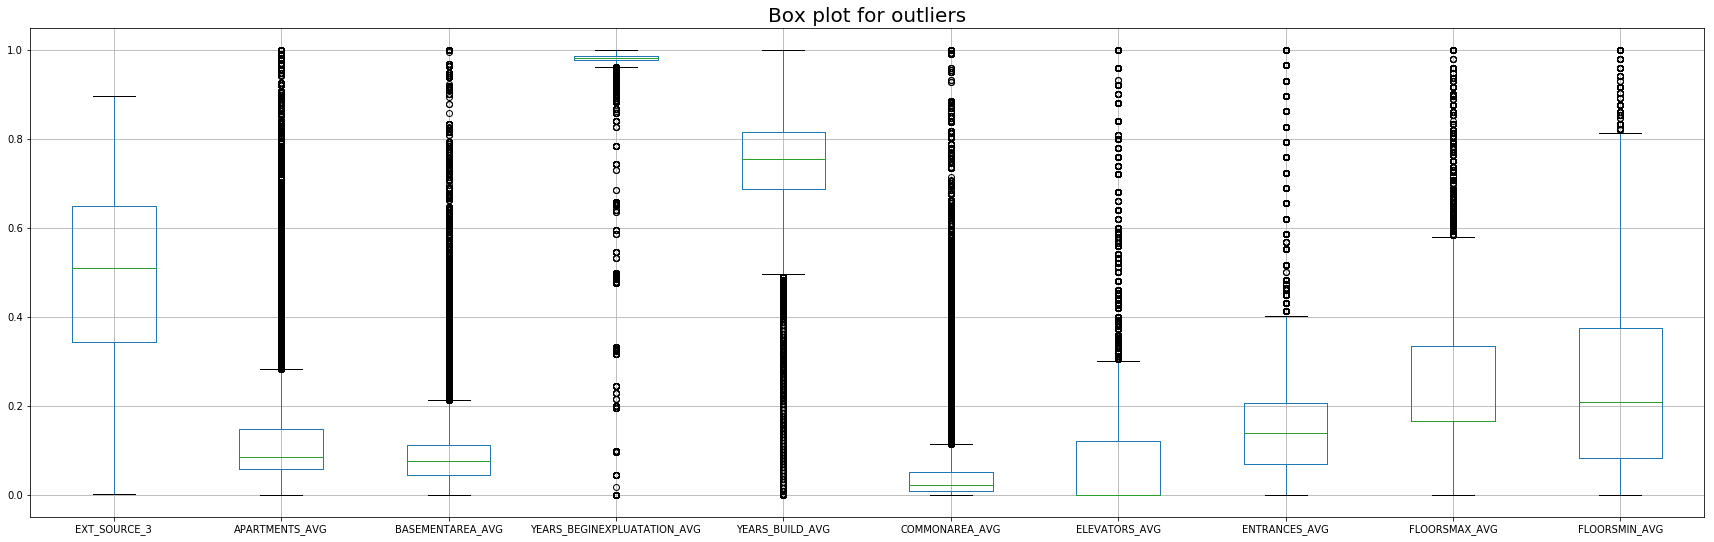

In [40]:
num_cols=numeric_df.columns[15:25]
plot_box(num_cols)

###### Detecting and Removing outliers

In [41]:
num_cols=numeric_df.columns[15:25]
for i in num_cols:
    outlier_datapoints = detect_iqr_outlier(combined_df[i])
    print(i)
    print(sorted(set(outlier_datapoints)))

EXT_SOURCE_3
[]
APARTMENTS_AVG
[0.2835, 0.2838, 0.284, 0.2845, 0.2851, 0.2856, 0.2861, 0.2862, 0.2866, 0.287, 0.2871, 0.2876, 0.2881, 0.2887, 0.2891, 0.2893, 0.2894, 0.2895, 0.2897, 0.29, 0.2902, 0.2907, 0.2911, 0.2912, 0.2918, 0.2921, 0.2923, 0.2928, 0.2933, 0.2938, 0.2942, 0.2943, 0.2948, 0.2954, 0.2956, 0.2959, 0.2961, 0.2962, 0.2964, 0.2969, 0.2974, 0.2975, 0.2976, 0.2977, 0.2979, 0.299, 0.2993, 0.2995, 0.2996, 0.3, 0.301, 0.3015, 0.3018, 0.3021, 0.3026, 0.3031, 0.3034, 0.3039, 0.3041, 0.3045, 0.3046, 0.3052, 0.3054, 0.3057, 0.3062, 0.3072, 0.3082, 0.3088, 0.3089, 0.3093, 0.31, 0.3103, 0.3105, 0.3113, 0.3119, 0.3124, 0.3134, 0.3139, 0.3144, 0.3149, 0.3155, 0.316, 0.3165, 0.317, 0.3172, 0.3175, 0.318, 0.3186, 0.3196, 0.3199, 0.3201, 0.3202, 0.3203, 0.3206, 0.3211, 0.3213, 0.3216, 0.3222, 0.3223, 0.3227, 0.3232, 0.3237, 0.3242, 0.3245, 0.3247, 0.3251, 0.3258, 0.3263, 0.3268, 0.3271, 0.3278, 0.3289, 0.3294, 0.3299, 0.3301, 0.3302, 0.3306, 0.3309, 0.3314, 0.332, 0.33299999999999996, 0.

YEARS_BEGINEXPLUATATION_AVG
[0.0, 0.0179, 0.0447, 0.0969, 0.0974, 0.0979, 0.1942, 0.1987, 0.2156, 0.22899999999999998, 0.2434, 0.3164, 0.3169, 0.3224, 0.3229, 0.3254, 0.3259, 0.3279, 0.3284, 0.3289, 0.3294, 0.3304, 0.3308, 0.3318, 0.4759, 0.4774, 0.4779, 0.4784, 0.4789, 0.4848, 0.4863, 0.4878, 0.4883, 0.4888, 0.4893, 0.4898, 0.4903, 0.4908, 0.4913, 0.4918, 0.4923, 0.4928, 0.4933, 0.4938, 0.4943, 0.4948, 0.4953, 0.4958, 0.4968, 0.4973, 0.4978, 0.4983, 0.4988, 0.4993, 0.5315, 0.545, 0.5852, 0.5857, 0.5941, 0.6344, 0.6408, 0.6508, 0.6513, 0.6533, 0.6538, 0.6547, 0.6567, 0.6572, 0.6577, 0.6841, 0.7303, 0.7432, 0.7437, 0.7442, 0.7829, 0.8276, 0.841, 0.8579, 0.8629, 0.8674, 0.8818, 0.8823, 0.8833, 0.8852, 0.8877, 0.8922, 0.8927, 0.8967, 0.8977, 0.8982, 0.8987, 0.8992, 0.9001, 0.9006, 0.9056, 0.9066, 0.9071, 0.9076, 0.9086, 0.9091, 0.9096, 0.9106, 0.9116, 0.9121, 0.9136, 0.9151, 0.9159999999999999, 0.9165, 0.917, 0.9175, 0.9179999999999999, 0.9185, 0.919, 0.9195, 0.92, 0.9205, 0.9209999999999

ELEVATORS_AVG
[0.304, 0.3064, 0.3108, 0.312, 0.32, 0.33, 0.332, 0.3332, 0.336, 0.34, 0.344, 0.3464, 0.35, 0.35200000000000004, 0.3564, 0.36, 0.3732, 0.38, 0.384, 0.3864, 0.39, 0.392, 0.4, 0.42, 0.4264, 0.4320000000000001, 0.44, 0.44799999999999995, 0.45, 0.4532, 0.46, 0.48, 0.5, 0.512, 0.52, 0.5332, 0.54, 0.56, 0.5660000000000001, 0.5732, 0.58, 0.5864, 0.59, 0.6, 0.62, 0.64, 0.66, 0.68, 0.72, 0.74, 0.76, 0.78, 0.8, 0.8079999999999999, 0.84, 0.88, 0.9, 0.92, 0.9332, 0.96, 1.0]
ENTRANCES_AVG
[0.4138, 0.431, 0.4483, 0.4597, 0.4655, 0.4741, 0.4828, 0.5, 0.5172, 0.5517, 0.569, 0.5862, 0.6207, 0.6552, 0.6897, 0.7241, 0.7586, 0.7931, 0.8276, 0.8621, 0.8966, 0.9309999999999999, 0.9655, 1.0]
FLOORSMAX_AVG
[0.5833, 0.5863, 0.5917, 0.5938, 0.595, 0.5971, 0.5979, 0.6, 0.6017, 0.6042, 0.6071, 0.6083, 0.6108, 0.6129, 0.6146, 0.6167, 0.625, 0.6308, 0.6317, 0.6333, 0.6342, 0.6354, 0.6375, 0.6387, 0.6417, 0.6458, 0.65, 0.6525, 0.6625, 0.6667, 0.6725, 0.6771, 0.6783, 0.6804, 0.6833, 0.6842, 0.6875, 0.69

###### Identifying columns with Outliers

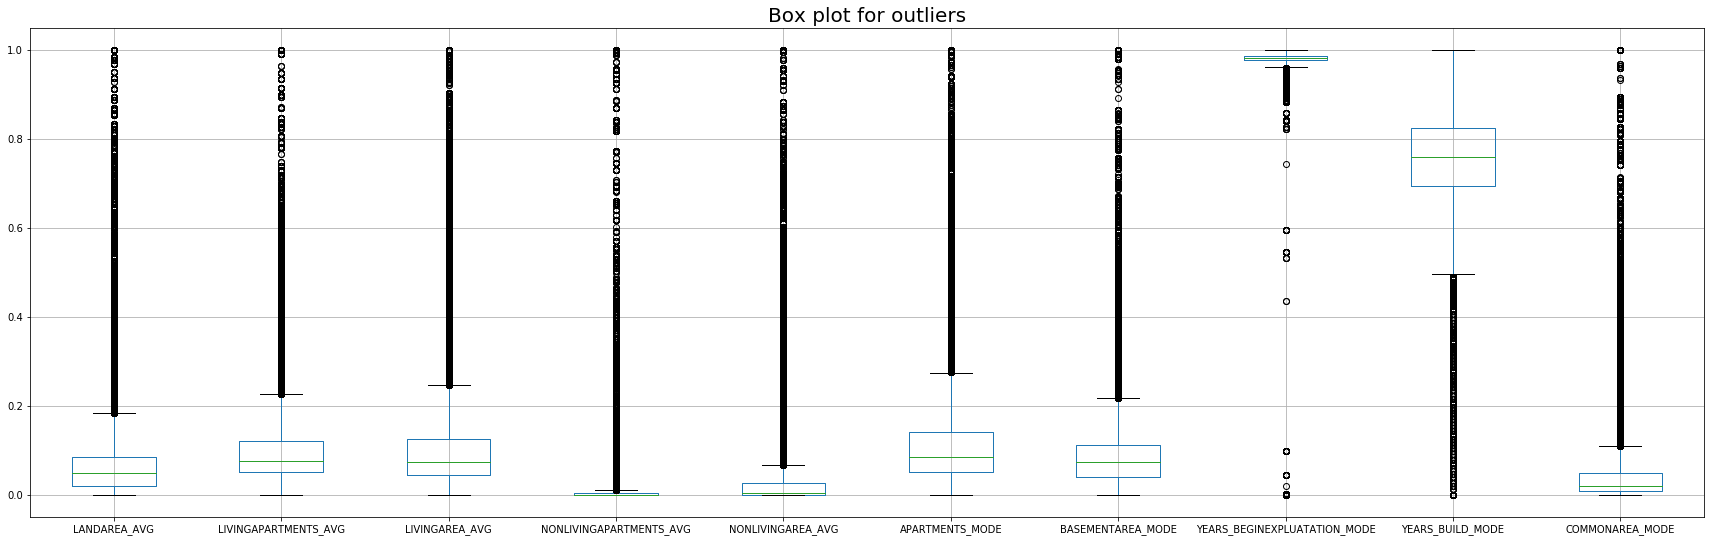

In [42]:
num_cols=numeric_df.columns[25:35]
plot_box(num_cols)

###### Detecting and Removing outliers

In [43]:
num_cols=numeric_df.columns[25:35]
for i in num_cols:
    outlier_datapoints = detect_iqr_outlier(combined_df[i])
    print(i)
    print(sorted(set(outlier_datapoints)))

LANDAREA_AVG
[0.183, 0.1831, 0.1832, 0.1833, 0.1834, 0.1835, 0.1836, 0.1837, 0.1838, 0.1839, 0.184, 0.1841, 0.1842, 0.1843, 0.1844, 0.1845, 0.1846, 0.1847, 0.1848, 0.1849, 0.185, 0.1851, 0.1852, 0.1853, 0.1854, 0.1855, 0.1856, 0.1857, 0.1858, 0.1859, 0.18600000000000005, 0.1861, 0.1862, 0.1863, 0.1864, 0.1865, 0.1866, 0.1867, 0.1868, 0.1869, 0.187, 0.1871, 0.1872, 0.1873, 0.1874, 0.1875, 0.1876, 0.1877, 0.1878, 0.1879, 0.188, 0.1881, 0.1882, 0.1883, 0.1884, 0.1885, 0.1886, 0.1887, 0.1888, 0.1889, 0.18899999999999997, 0.1891, 0.1893, 0.1894, 0.1895, 0.1896, 0.1897, 0.1898, 0.1899, 0.19, 0.1901, 0.1902, 0.1903, 0.1904, 0.1905, 0.1906, 0.1907, 0.1908, 0.1909, 0.191, 0.1911, 0.1912, 0.1913, 0.1914, 0.1915, 0.1916, 0.1917, 0.1918, 0.1919, 0.192, 0.1921, 0.1922, 0.1923, 0.1924, 0.1925, 0.1926, 0.1927, 0.1928, 0.1929, 0.193, 0.1931, 0.1932, 0.1933, 0.1934, 0.1935, 0.1936, 0.1937, 0.1938, 0.1939, 0.19399999999999998, 0.1941, 0.1942, 0.1943, 0.1944, 0.1945, 0.1946, 0.1947, 0.1948, 0.1949, 0.195

LIVINGAPARTMENTS_AVG
[0.2274, 0.2276, 0.2278, 0.2282, 0.2286, 0.2291, 0.2292, 0.2295, 0.2299, 0.2303, 0.2307, 0.2311, 0.23199999999999998, 0.2328, 0.2331, 0.2332, 0.2334, 0.2337, 0.23399999999999999, 0.2341, 0.2345, 0.2348, 0.2349, 0.2353, 0.2356, 0.23600000000000002, 0.2362, 0.2365, 0.2366, 0.2367, 0.237, 0.2374, 0.2379, 0.2383, 0.2387, 0.2391, 0.2393, 0.2396, 0.2398, 0.24, 0.2401, 0.2404, 0.2407, 0.2408, 0.2412, 0.2414, 0.2415, 0.2417, 0.2421, 0.2429, 0.2432, 0.2438, 0.2442, 0.2446, 0.2454, 0.2463, 0.2467, 0.2468, 0.2471, 0.2473, 0.2475, 0.248, 0.2484, 0.2488, 0.2496, 0.2498, 0.2499, 0.2501, 0.2505, 0.2513, 0.2517, 0.2522, 0.2526, 0.253, 0.2532, 0.2533, 0.2538, 0.2545, 0.2547, 0.2551, 0.2555, 0.2559, 0.2564, 0.2568, 0.2572, 0.2576, 0.258, 0.2586, 0.2589, 0.2593, 0.2597, 0.2606, 0.2614, 0.2622, 0.2627, 0.2631, 0.2634, 0.2639, 0.2643, 0.2648, 0.2656, 0.2664, 0.2673, 0.2677, 0.2681, 0.2685, 0.2688, 0.26899999999999996, 0.2694, 0.2695, 0.2698, 0.2707, 0.2713, 0.2715, 0.2719, 0.2723, 0.27

NONLIVINGAPARTMENTS_AVG
[0.01, 0.0103, 0.0104, 0.0105, 0.0106, 0.0108, 0.0109, 0.0111, 0.0116, 0.0118, 0.012, 0.0122, 0.0124, 0.0125, 0.0127, 0.0129, 0.0131, 0.0135, 0.0137, 0.0139, 0.0141, 0.0143, 0.0145, 0.0147, 0.0154, 0.0161, 0.0162, 0.0164, 0.0167, 0.0172, 0.0174, 0.018000000000000002, 0.0182, 0.0183, 0.0185, 0.0193, 0.0199, 0.0203, 0.0206, 0.0208, 0.0212, 0.0219, 0.0222, 0.0225, 0.0232, 0.0238, 0.0241, 0.0244, 0.0251, 0.0257, 0.027000000000000003, 0.027999999999999997, 0.0283, 0.028999999999999998, 0.0309, 0.0315, 0.0317, 0.0319, 0.0322, 0.0323, 0.0328, 0.0334, 0.0338, 0.0347, 0.036000000000000004, 0.0367, 0.0373, 0.0386, 0.0394, 0.0399, 0.0402, 0.0405, 0.040999999999999995, 0.0412, 0.0415, 0.0425, 0.0437, 0.0441, 0.0444, 0.045, 0.0459, 0.0463, 0.0469, 0.0473, 0.0483, 0.0489, 0.0495, 0.0502, 0.0515, 0.0521, 0.0524, 0.0531, 0.0541, 0.0548, 0.055999999999999994, 0.0566, 0.0579, 0.0598, 0.0605, 0.0618, 0.0627, 0.0637, 0.0647, 0.0649, 0.0656, 0.0682, 0.0695, 0.0714, 0.0724, 0.0734, 0

APARTMENTS_MODE
[0.2752, 0.2763, 0.2773, 0.2784, 0.2794, 0.2805, 0.2815, 0.2826, 0.2836, 0.2847, 0.2857, 0.2868, 0.2878, 0.2889, 0.2899, 0.29100000000000004, 0.292, 0.2931, 0.2941, 0.2952, 0.2962, 0.2973, 0.2983, 0.2994, 0.3004, 0.3015, 0.3025, 0.3036, 0.3046, 0.3057, 0.3067, 0.3078, 0.3088, 0.3099, 0.3109, 0.312, 0.313, 0.3141, 0.3151, 0.3162, 0.3172, 0.3183, 0.3193, 0.3204, 0.3214, 0.3225, 0.3235, 0.3246, 0.3256, 0.3267, 0.3277, 0.3288, 0.3298, 0.3309, 0.3319, 0.33299999999999996, 0.33399999999999996, 0.3351, 0.3361, 0.3372, 0.3382, 0.3393, 0.3403, 0.3414, 0.3424, 0.3435, 0.3445, 0.3456, 0.3466, 0.3477, 0.3487, 0.3498, 0.3508, 0.3519, 0.3529, 0.354, 0.355, 0.3561, 0.3571, 0.3582, 0.3592, 0.3603, 0.3613, 0.3624, 0.3634, 0.3645, 0.3655, 0.3666, 0.3676, 0.3687, 0.3697, 0.3708, 0.3718, 0.3729, 0.3739, 0.375, 0.3761, 0.3771, 0.3782, 0.3792, 0.3803, 0.3813, 0.3824, 0.3834, 0.3845, 0.3855, 0.3866, 0.3876, 0.3887, 0.3897, 0.3908, 0.3918, 0.3929, 0.3939, 0.395, 0.396, 0.3971, 0.3981, 0.3992, 

YEARS_BEGINEXPLUATATION_MODE
[0.0, 0.0005, 0.0184, 0.0452, 0.0973, 0.0978, 0.0983, 0.4359, 0.5318, 0.5452, 0.5943, 0.7433, 0.8222, 0.8277, 0.8401, 0.8411, 0.8421, 0.858, 0.8818, 0.8823, 0.8833, 0.8853, 0.8878, 0.8923, 0.8928, 0.8937, 0.8967, 0.8972, 0.8977, 0.8982, 0.8987, 0.8992, 0.9002, 0.9037, 0.9057, 0.9067, 0.9071, 0.9076, 0.9086, 0.9091, 0.9096, 0.9106, 0.9116, 0.9121, 0.9136, 0.9141, 0.9146, 0.9151, 0.9161, 0.9166, 0.9171, 0.9176, 0.9181, 0.9186, 0.9191, 0.9196, 0.9201, 0.9206, 0.9211, 0.9215, 0.922, 0.9225, 0.9229999999999999, 0.9235, 0.924, 0.9245, 0.925, 0.9255, 0.9259999999999999, 0.9265, 0.927, 0.9275, 0.9279999999999999, 0.9285, 0.929, 0.9295, 0.93, 0.9305, 0.9309999999999999, 0.9315, 0.932, 0.9325, 0.9329999999999999, 0.9335, 0.934, 0.9345, 0.935, 0.9355, 0.9359, 0.9364, 0.9369, 0.9374, 0.9379, 0.9384, 0.9389, 0.9394, 0.9399, 0.9404, 0.9409, 0.9414, 0.9419, 0.9424, 0.9429, 0.9434, 0.9439, 0.9444, 0.9449, 0.9454, 0.9459, 0.9464, 0.9469, 0.9474, 0.9479, 0.9484, 0.9489, 0.94

###### Identifying columns with Outliers

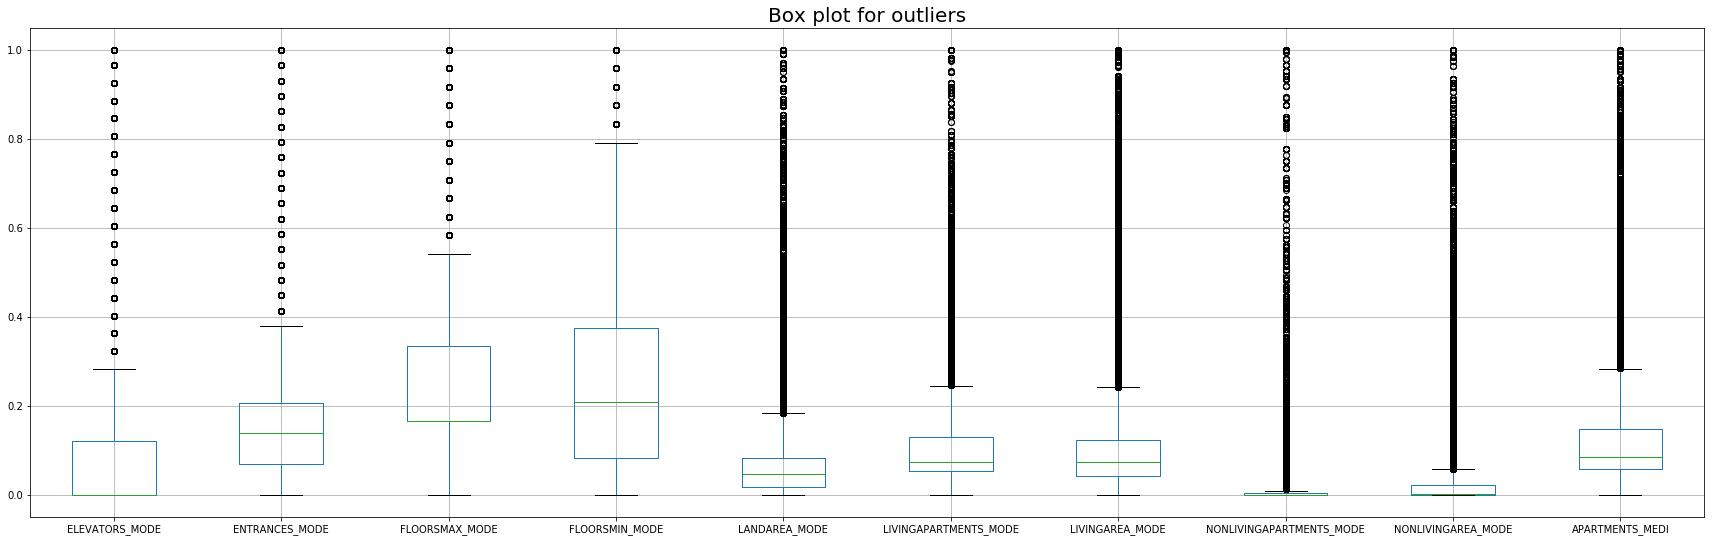

In [44]:
num_cols=numeric_df.columns[35:45]
plot_box(num_cols)

###### Detecting and Removing outliers

In [45]:
num_cols=numeric_df.columns[35:45]
for i in num_cols:
    outlier_datapoints = detect_iqr_outlier(combined_df[i])
    print(i)
    print(sorted(set(outlier_datapoints)))

ELEVATORS_MODE
[0.3222, 0.3625, 0.4028, 0.4431, 0.4834, 0.5236, 0.5639, 0.6042, 0.6445, 0.6848, 0.725, 0.7653, 0.8056, 0.8459, 0.8862, 0.9264, 0.9667, 1.0]
ENTRANCES_MODE
[0.4138, 0.4483, 0.4828, 0.5172, 0.5517, 0.5862, 0.6207, 0.6552, 0.6897, 0.7241, 0.7586, 0.7931, 0.8276, 0.8621, 0.8966, 0.9309999999999999, 0.9655, 1.0]
FLOORSMAX_MODE
[0.5833, 0.625, 0.6667, 0.7083, 0.75, 0.7917, 0.8333, 0.875, 0.9167, 0.9583, 1.0]
FLOORSMIN_MODE
[0.8333, 0.875, 0.9167, 0.9583, 1.0]
LANDAREA_MODE
[0.1826, 0.1827, 0.1828, 0.1829, 0.183, 0.1831, 0.1832, 0.1833, 0.1834, 0.1835, 0.1836, 0.1837, 0.1838, 0.1839, 0.184, 0.1841, 0.1842, 0.1843, 0.1844, 0.1845, 0.1846, 0.1847, 0.1848, 0.1849, 0.185, 0.1851, 0.1852, 0.1853, 0.1854, 0.1855, 0.1856, 0.1857, 0.1858, 0.1859, 0.18600000000000005, 0.1861, 0.1862, 0.1863, 0.1864, 0.1865, 0.1866, 0.1867, 0.1868, 0.1869, 0.187, 0.1871, 0.1872, 0.1873, 0.1874, 0.1875, 0.1876, 0.1877, 0.1878, 0.1879, 0.188, 0.1881, 0.1882, 0.1883, 0.1884, 0.1885, 0.1886, 0.1887, 0.1888,

LIVINGAPARTMENTS_MODE
[0.2461, 0.247, 0.2479, 0.2489, 0.2498, 0.2507, 0.2516, 0.2525, 0.2534, 0.2544, 0.2553, 0.2562, 0.2571, 0.258, 0.259, 0.2599, 0.2608, 0.2617, 0.2626, 0.2635, 0.2645, 0.2654, 0.2663, 0.2672, 0.2681, 0.2691, 0.27, 0.2709, 0.2718, 0.2727, 0.2736, 0.2746, 0.2755, 0.2764, 0.2773, 0.2782, 0.2792, 0.2801, 0.281, 0.2819, 0.2828, 0.2837, 0.2847, 0.2856, 0.2865, 0.2874, 0.2883, 0.2893, 0.2902, 0.2911, 0.292, 0.2929, 0.2938, 0.2948, 0.2957, 0.2966, 0.2975, 0.2984, 0.2994, 0.3003, 0.3012, 0.3021, 0.303, 0.3039, 0.3049, 0.3058, 0.3067, 0.3076, 0.3085, 0.3095, 0.3104, 0.3113, 0.3122, 0.3131, 0.314, 0.315, 0.3159, 0.3168, 0.3177, 0.3186, 0.3196, 0.3205, 0.3214, 0.3223, 0.3232, 0.3242, 0.3251, 0.326, 0.3269, 0.3278, 0.3287, 0.3297, 0.3306, 0.3315, 0.3324, 0.3333, 0.3343, 0.3352, 0.3361, 0.337, 0.3379, 0.3388, 0.3398, 0.3407, 0.3416, 0.3425, 0.3434, 0.3444, 0.3453, 0.3462, 0.3471, 0.348, 0.3489, 0.3499, 0.3508, 0.3517, 0.3526, 0.3535, 0.3545, 0.3554, 0.3563, 0.3572, 0.3581, 0.359,

NONLIVINGAPARTMENTS_MODE
[0.0117, 0.0156, 0.0195, 0.0233, 0.0272, 0.0311, 0.035, 0.0389, 0.0428, 0.0467, 0.0506, 0.0545, 0.0584, 0.0623, 0.0661, 0.07, 0.0739, 0.0778, 0.0817, 0.0856, 0.0895, 0.0934, 0.0973, 0.1012, 0.1051, 0.1089, 0.1128, 0.1167, 0.1206, 0.1245, 0.1284, 0.1323, 0.1362, 0.1401, 0.14400000000000002, 0.1479, 0.1518, 0.1556, 0.1595, 0.1634, 0.1673, 0.1712, 0.1751, 0.179, 0.1829, 0.1868, 0.1907, 0.1946, 0.1984, 0.2023, 0.2062, 0.2101, 0.214, 0.2179, 0.2218, 0.2257, 0.2296, 0.2335, 0.2374, 0.2412, 0.2451, 0.249, 0.2529, 0.2568, 0.2607, 0.2646, 0.2724, 0.2763, 0.2802, 0.284, 0.2879, 0.2918, 0.2957, 0.2996, 0.3035, 0.3074, 0.3113, 0.3152, 0.3191, 0.32299999999999995, 0.3268, 0.3307, 0.3346, 0.3385, 0.3424, 0.3463, 0.3502, 0.3541, 0.3658, 0.3735, 0.3774, 0.3813, 0.3852, 0.3891, 0.39299999999999996, 0.3969, 0.4008, 0.4086, 0.4125, 0.4163, 0.4202, 0.4241, 0.428, 0.4319, 0.4358, 0.4397, 0.4436, 0.4475, 0.4591, 0.46299999999999997, 0.4669, 0.4708, 0.4825, 0.4864, 0.4942, 0.5019, 0.

APARTMENTS_MEDI
[0.2842, 0.2847, 0.2852, 0.2857, 0.2863, 0.2873, 0.2878, 0.2883, 0.2889, 0.2894, 0.2899, 0.2904, 0.2915, 0.2925, 0.293, 0.2935, 0.2941, 0.2946, 0.2951, 0.2956, 0.2961, 0.2967, 0.2972, 0.2977, 0.2982, 0.2987, 0.2993, 0.2998, 0.3003, 0.3008, 0.3019, 0.3024, 0.3029, 0.3039, 0.3045, 0.305, 0.3055, 0.306, 0.3071, 0.3076, 0.3081, 0.3086, 0.3092, 0.3102, 0.3112, 0.3118, 0.3123, 0.3133, 0.3144, 0.3149, 0.3154, 0.3159, 0.3164, 0.317, 0.3175, 0.318, 0.3185, 0.3196, 0.3201, 0.3206, 0.3211, 0.3216, 0.3227, 0.3232, 0.3237, 0.3242, 0.3248, 0.3253, 0.3258, 0.3263, 0.3268, 0.3274, 0.3279, 0.3289, 0.3294, 0.33, 0.331, 0.3321, 0.3326, 0.3331, 0.3341, 0.3347, 0.3352, 0.3362, 0.3367, 0.3373, 0.3378, 0.3383, 0.3393, 0.3399, 0.3404, 0.3409, 0.3414, 0.3419, 0.3425, 0.34299999999999997, 0.3435, 0.344, 0.3445, 0.3456, 0.3466, 0.3471, 0.3477, 0.3482, 0.3487, 0.3492, 0.3497, 0.3508, 0.3513, 0.3518, 0.3529, 0.3534, 0.3539, 0.3544, 0.355, 0.35600000000000004, 0.3565, 0.35700000000000004, 0.3581, 0.

###### Identifying columns with Outliers

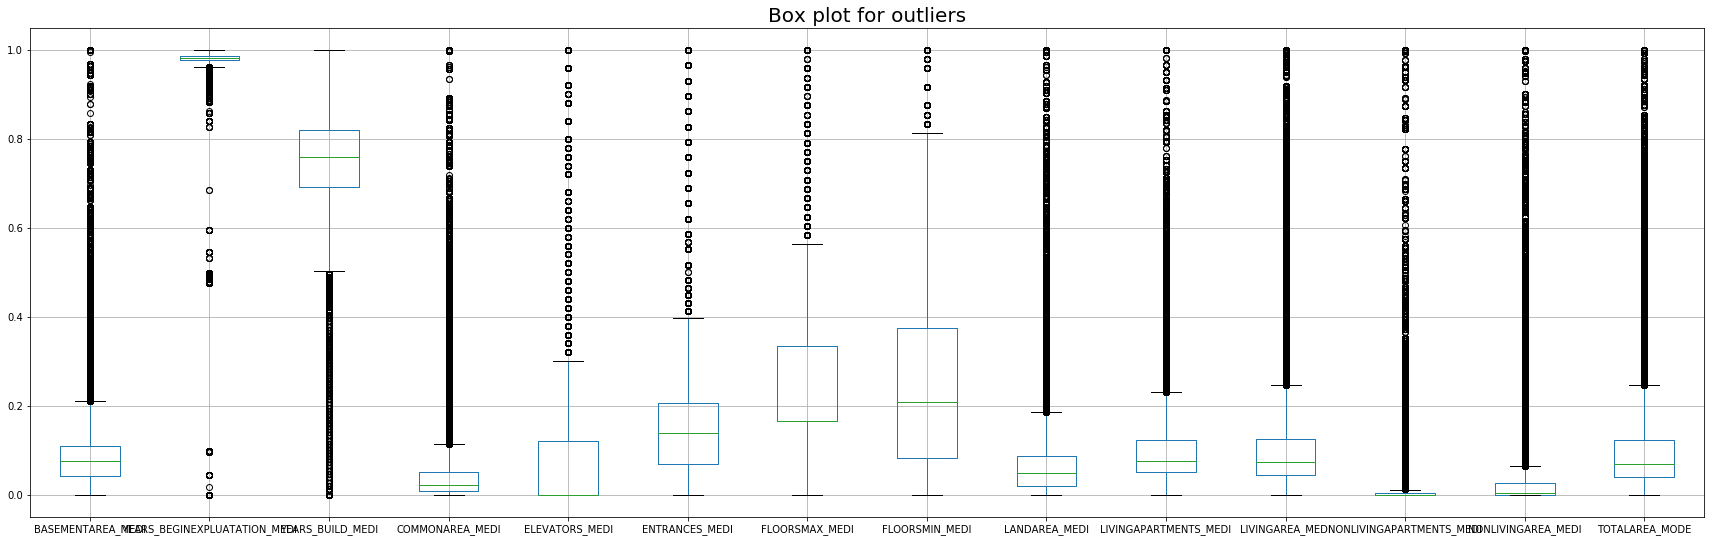

In [46]:
num_cols=numeric_df.columns[45:59]
plot_box(num_cols)

###### Detecting and Removing outliers

In [47]:
num_cols=numeric_df.columns[45:59]
for i in num_cols:
    outlier_datapoints = detect_iqr_outlier(combined_df[i])
    print(i)
    print(sorted(set(outlier_datapoints)))

BASEMENTAREA_MEDI
[0.2114, 0.2115, 0.2116, 0.2117, 0.2118, 0.2119, 0.212, 0.2121, 0.2122, 0.2123, 0.2124, 0.2125, 0.2126, 0.2127, 0.2128, 0.2129, 0.213, 0.2131, 0.2132, 0.2133, 0.2134, 0.2135, 0.2136, 0.2138, 0.2139, 0.214, 0.2141, 0.2142, 0.2143, 0.2144, 0.2145, 0.2146, 0.2147, 0.2148, 0.2149, 0.215, 0.2151, 0.2152, 0.2153, 0.2154, 0.2155, 0.2156, 0.2157, 0.2158, 0.2159, 0.21600000000000005, 0.2161, 0.2162, 0.2163, 0.2164, 0.2165, 0.2166, 0.2167, 0.2168, 0.2169, 0.217, 0.2171, 0.2172, 0.2173, 0.2174, 0.2175, 0.2176, 0.2177, 0.2178, 0.2179, 0.218, 0.2181, 0.2182, 0.2183, 0.2184, 0.2185, 0.2186, 0.2187, 0.2188, 0.2189, 0.21899999999999997, 0.2191, 0.2192, 0.2193, 0.2194, 0.2195, 0.2196, 0.2197, 0.2198, 0.2199, 0.22, 0.2201, 0.2202, 0.2203, 0.2204, 0.2205, 0.2206, 0.2207, 0.2208, 0.2209, 0.221, 0.2211, 0.2212, 0.2213, 0.2214, 0.2215, 0.2216, 0.2217, 0.2218, 0.2219, 0.2221, 0.2222, 0.2223, 0.2224, 0.2225, 0.2226, 0.2227, 0.2228, 0.2229, 0.223, 0.2231, 0.2232, 0.2233, 0.2234, 0.2235, 0.223

YEARS_BEGINEXPLUATATION_MEDI
[0.0, 0.0179, 0.0447, 0.0969, 0.0974, 0.0979, 0.4759, 0.4774, 0.4779, 0.4784, 0.4789, 0.4848, 0.4863, 0.4878, 0.4883, 0.4888, 0.4893, 0.4898, 0.4903, 0.4908, 0.4913, 0.4918, 0.4923, 0.4928, 0.4933, 0.4938, 0.4943, 0.4948, 0.4953, 0.4958, 0.4968, 0.4973, 0.4978, 0.4983, 0.4988, 0.4993, 0.5315, 0.545, 0.5941, 0.6841, 0.8276, 0.841, 0.8579, 0.8629, 0.8818, 0.8823, 0.8833, 0.8852, 0.8877, 0.8922, 0.8927, 0.8967, 0.8977, 0.8982, 0.8987, 0.8992, 0.9001, 0.9056, 0.9066, 0.9071, 0.9076, 0.9086, 0.9091, 0.9096, 0.9106, 0.9116, 0.9121, 0.9136, 0.9151, 0.9159999999999999, 0.9165, 0.917, 0.9175, 0.9179999999999999, 0.9185, 0.919, 0.9195, 0.92, 0.9205, 0.9209999999999999, 0.9215, 0.922, 0.9225, 0.9229999999999999, 0.9235, 0.924, 0.9245, 0.925, 0.9255, 0.9259999999999999, 0.9265, 0.927, 0.9275, 0.9279999999999999, 0.9285, 0.929, 0.9295, 0.93, 0.9305, 0.9309, 0.9314, 0.9319, 0.9324, 0.9329, 0.9334, 0.9339, 0.9344, 0.9349, 0.9354, 0.9359, 0.9364, 0.9369, 0.9374, 0.9379, 0.

ELEVATORS_MEDI
[0.32, 0.34, 0.36, 0.38, 0.4, 0.42, 0.44, 0.46, 0.48, 0.5, 0.52, 0.54, 0.56, 0.58, 0.6, 0.62, 0.64, 0.66, 0.68, 0.72, 0.74, 0.76, 0.78, 0.8, 0.84, 0.88, 0.9, 0.92, 0.96, 1.0]
ENTRANCES_MEDI
[0.4138, 0.431, 0.4483, 0.4655, 0.4828, 0.5, 0.5172, 0.5517, 0.569, 0.5862, 0.6207, 0.6552, 0.6897, 0.7241, 0.7586, 0.7931, 0.8276, 0.8621, 0.8966, 0.9309999999999999, 0.9655, 1.0]
FLOORSMAX_MEDI
[0.5833, 0.6042, 0.625, 0.6458, 0.6667, 0.6875, 0.7083, 0.7292, 0.75, 0.7708, 0.7917, 0.8125, 0.8333, 0.8542, 0.875, 0.8958, 0.9167, 0.9375, 0.9583, 0.9792, 1.0]
FLOORSMIN_MEDI
[0.8333, 0.8542, 0.875, 0.9167, 0.9583, 0.9792, 1.0]
LANDAREA_MEDI
[0.1859, 0.18600000000000005, 0.1861, 0.1862, 0.1863, 0.1864, 0.1865, 0.1866, 0.1867, 0.1868, 0.1869, 0.187, 0.1871, 0.1872, 0.1873, 0.1874, 0.1875, 0.1876, 0.1877, 0.1878, 0.1879, 0.188, 0.1881, 0.1882, 0.1883, 0.1884, 0.1885, 0.1886, 0.1887, 0.1888, 0.1889, 0.18899999999999997, 0.1891, 0.1892, 0.1893, 0.1894, 0.1895, 0.1896, 0.1897, 0.1899, 0.1901, 0.

LIVINGAPARTMENTS_MEDI
[0.2309, 0.2313, 0.2317, 0.2322, 0.2326, 0.2334, 0.2343, 0.2347, 0.2351, 0.23600000000000002, 0.2369, 0.2377, 0.2381, 0.2386, 0.239, 0.2394, 0.2403, 0.2407, 0.2411, 0.2416, 0.242, 0.2424, 0.2428, 0.2433, 0.2437, 0.2441, 0.2446, 0.245, 0.2454, 0.2458, 0.2463, 0.2471, 0.248, 0.2484, 0.2488, 0.2497, 0.2505, 0.251, 0.2514, 0.2522, 0.2527, 0.2531, 0.254, 0.2544, 0.2548, 0.2557, 0.2561, 0.2565, 0.257, 0.2574, 0.2582, 0.2591, 0.2595, 0.2599, 0.2604, 0.2608, 0.2612, 0.2617, 0.2625, 0.2634, 0.2638, 0.2642, 0.2651, 0.2659, 0.2668, 0.2672, 0.2676, 0.2685, 0.2689, 0.2694, 0.2702, 0.2711, 0.2719, 0.2723, 0.2728, 0.2732, 0.2736, 0.2741, 0.2745, 0.2753, 0.2762, 0.2766, 0.27699999999999997, 0.2775, 0.2779, 0.2788, 0.2792, 0.2796, 0.2805, 0.2813, 0.2818, 0.2822, 0.28300000000000003, 0.2839, 0.2847, 0.2856, 0.28600000000000003, 0.2865, 0.2869, 0.2873, 0.2882, 0.289, 0.2894, 0.2899, 0.2903, 0.2907, 0.2916, 0.2924, 0.2929, 0.2933, 0.2937, 0.2941, 0.295, 0.2954, 0.2959, 0.2967, 0.2971

NONLIVINGAPARTMENTS_MEDI
[0.0116, 0.0136, 0.0155, 0.0175, 0.0194, 0.0214, 0.0233, 0.0252, 0.0272, 0.0291, 0.0311, 0.033, 0.0349, 0.0369, 0.0388, 0.0408, 0.0427, 0.0446, 0.0466, 0.0485, 0.0505, 0.0524, 0.0543, 0.0563, 0.0582, 0.0621, 0.0641, 0.066, 0.0699, 0.0718, 0.0738, 0.0757, 0.0776, 0.0796, 0.0815, 0.0854, 0.0873, 0.0893, 0.0932, 0.0951, 0.09699999999999999, 0.1009, 0.1029, 0.1048, 0.1087, 0.1126, 0.1145, 0.1165, 0.1184, 0.1203, 0.1242, 0.1262, 0.1281, 0.132, 0.1359, 0.1397, 0.1436, 0.1475, 0.1495, 0.1514, 0.1553, 0.1592, 0.163, 0.1669, 0.1708, 0.1747, 0.1766, 0.1786, 0.1805, 0.1824, 0.1863, 0.1902, 0.1941, 0.198, 0.1999, 0.2019, 0.2038, 0.2057, 0.2096, 0.2135, 0.2174, 0.2213, 0.2232, 0.2251, 0.22899999999999998, 0.2329, 0.2349, 0.2368, 0.2407, 0.2446, 0.2465, 0.2484, 0.2523, 0.2562, 0.2601, 0.264, 0.2659, 0.2678, 0.2717, 0.2756, 0.2795, 0.2814, 0.2834, 0.2873, 0.2911, 0.2931, 0.295, 0.2989, 0.3028, 0.3067, 0.3106, 0.3125, 0.3144, 0.3183, 0.3222, 0.3261, 0.33, 0.3319, 0.3338, 0.337

TOTALAREA_MODE
[0.2456, 0.2457, 0.2458, 0.2459, 0.24600000000000002, 0.2461, 0.2462, 0.2463, 0.2464, 0.2465, 0.2466, 0.2467, 0.2468, 0.2469, 0.247, 0.2471, 0.2472, 0.2473, 0.2474, 0.2475, 0.2476, 0.2477, 0.2478, 0.2479, 0.248, 0.2481, 0.2482, 0.2483, 0.2484, 0.2485, 0.2486, 0.2487, 0.2488, 0.2489, 0.249, 0.2491, 0.2492, 0.2493, 0.2494, 0.2495, 0.2496, 0.2497, 0.2498, 0.2499, 0.25, 0.2501, 0.2502, 0.2503, 0.2504, 0.2505, 0.2506, 0.2507, 0.2508, 0.2509, 0.251, 0.2511, 0.2512, 0.2513, 0.2514, 0.2515, 0.2516, 0.2517, 0.2518, 0.2519, 0.252, 0.2521, 0.2522, 0.2523, 0.2524, 0.2525, 0.2526, 0.2527, 0.2528, 0.2529, 0.253, 0.2531, 0.2532, 0.2533, 0.2534, 0.2535, 0.2536, 0.2537, 0.2538, 0.2539, 0.254, 0.2541, 0.2542, 0.2543, 0.2544, 0.2545, 0.2546, 0.2547, 0.2548, 0.2549, 0.255, 0.2551, 0.2552, 0.2553, 0.2554, 0.2555, 0.2556, 0.2557, 0.2558, 0.2559, 0.256, 0.2561, 0.2562, 0.2563, 0.2564, 0.2565, 0.2566, 0.2567, 0.2568, 0.2569, 0.257, 0.2571, 0.2572, 0.2573, 0.2574, 0.2575, 0.2576, 0.2577, 0.2578,

###### Identifying columns with Outliers

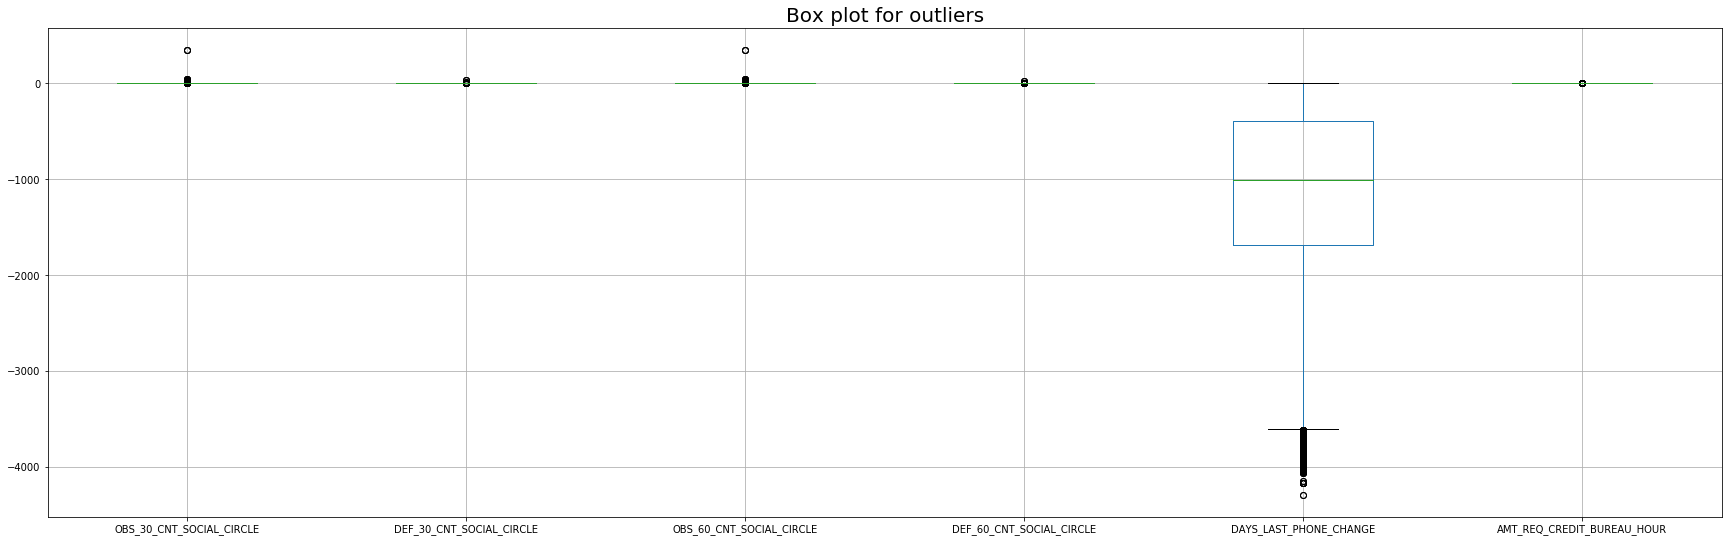

In [48]:
num_cols=numeric_df.columns[59:65]
plot_box(num_cols)

###### Detecting and Removing outliers

In [49]:
num_cols=numeric_df.columns[59:65]
for i in num_cols:
    outlier_datapoints = detect_iqr_outlier(combined_df[i])
    print(i)
    print(sorted(set(outlier_datapoints)))

OBS_30_CNT_SOCIAL_CIRCLE
[6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 47.0, 348.0]
DEF_30_CNT_SOCIAL_CIRCLE
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 34.0]
OBS_60_CNT_SOCIAL_CIRCLE
[6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 47.0, 344.0]
DEF_60_CNT_SOCIAL_CIRCLE
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 24.0]
DAYS_LAST_PHONE_CHANGE
[-4292.0, -4173.0, -4153.0, -4066.0, -4051.0, -4046.0, -4043.0, -4039.0, -4033.0, -4026.0, -4025.0, -4018.0, -4016.0, -3999.0, -3988.0, -3978.0, -3967.0, -3963.0, -3960.0, -3949.0, -3943.0, -3939.0, -3938.0, -3932.0, -3926.0, -3917.0, -3915.0, -3899.0, -3884.0, -3882.0, -3866.0, -3857.0, -3856.0, -3851.0, -3850.0, -3848.0, -3841.0, -3828.0, -3825.0, -3824.0, -3818.0, -3811.0, -3809.0, -3808.0, -3807.0, -3802.0, -3797.0, -3795.0, -3784.0, -3783.0, -3782.0, -3781.0,

###### Identifying columns with Outliers

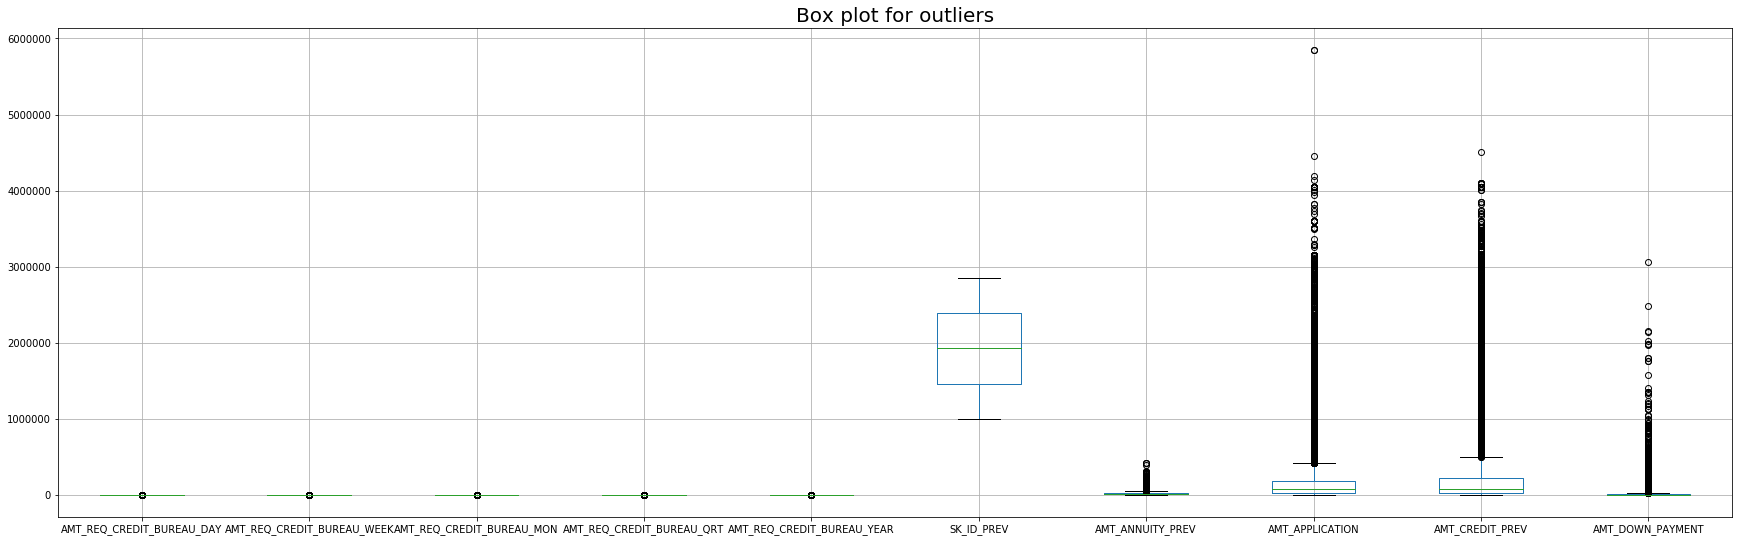

In [50]:
num_cols=numeric_df.columns[65:75]
plot_box(num_cols)

###### Detecting and Removing outliers

In [51]:
num_cols=numeric_df.columns[65:75]
for i in num_cols:
    outlier_datapoints = detect_iqr_outlier(combined_df[i])
    print(i)
    print(sorted(set(outlier_datapoints)))

AMT_REQ_CREDIT_BUREAU_DAY
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 9.0]
AMT_REQ_CREDIT_BUREAU_WEEK
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0]
AMT_REQ_CREDIT_BUREAU_MON
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 22.0, 23.0, 24.0, 27.0]
AMT_REQ_CREDIT_BUREAU_QRT
[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 261.0]
AMT_REQ_CREDIT_BUREAU_YEAR
[9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 25.0]
SK_ID_PREV
[]
AMT_ANNUITY_PREV
[41663.79, 41664.825, 41665.275, 41665.815, 41666.22, 41667.615, 41669.1, 41669.82, 41670.09, 41670.81, 41672.25, 41673.42, 41673.915, 41676.12, 41677.02, 41678.055, 41679.0, 41683.95, 41687.325, 41687.73, 41688.9, 41690.43, 41690.925, 41691.33, 41692.5, 41692.68, 41693.94, 41694.255, 41694.975, 41696.01, 41697.72, 41698.08, 41698.8, 41699.385, 41699.79, 41700.105, 41701.095, 41701.32, 41703.075, 41703.12, 41703.165, 41704.2, 41705.415, 41705.82, 41706.0, 41707.44, 41709.465, 41710

AMT_APPLICATION
[420403.5, 420503.985, 420506.55, 420525.0, 420592.5, 420660.0, 420732.0, 420732.36, 420750.0, 420786.0, 420858.0, 420898.5, 420975.0, 420979.5, 420984.0, 420993.0, 421011.0, 421015.5, 421051.5, 421060.5, 421078.5, 421092.0, 421137.0, 421155.0, 421159.5, 421173.0, 421200.0, 421240.5, 421380.0, 421393.5, 421398.0, 421411.5, 421515.0, 421569.0, 421618.5, 421632.0, 421650.0, 421695.0, 421704.0, 421744.5, 421749.99, 421785.0, 421798.5, 421830.0, 421870.5, 421875.0, 421942.5, 421956.0, 422019.0, 422037.0, 422041.5, 422068.5, 422077.5, 422095.5, 422100.0, 422154.0, 422158.5, 422163.0, 422352.0, 422370.0, 422478.0, 422509.5, 422550.0, 422595.0, 422631.0, 422694.0, 422797.5, 422802.0, 422806.5, 422820.0, 422829.0, 422865.0, 422887.5, 422901.0, 422910.0, 422914.5, 422925.75, 422955.0, 423000.0, 423022.5, 423058.5, 423148.5, 423175.5, 423225.0, 423252.0, 423450.0, 423476.235, 423526.5, 423630.0, 423675.0, 423693.0, 423732.015, 423801.0, 423846.0, 423864.0, 423900.0, 423918.0, 423

AMT_CREDIT_PREV
[501853.5, 501948.0, 501970.5, 501975.0, 501979.5, 502087.5, 502092.0, 502123.5, 502141.5, 502150.5, 502188.345, 502200.0, 502236.0, 502312.5, 502339.5, 502441.74, 502474.5, 502488.0, 502497.0, 502510.5, 502560.0, 502618.5, 502627.5, 502636.5, 502659.0, 502663.5, 502695.0, 502730.055, 502749.0, 502776.0, 502830.0, 502884.0, 502933.5, 502942.5, 503010.0, 503023.5, 503064.0, 503145.0, 503208.0, 503215.11, 503219.34, 503226.0, 503230.5, 503280.0, 503325.0, 503338.5, 503374.5, 503392.5, 503406.0, 503415.0, 503432.235, 503482.5, 503536.5, 503550.0, 503563.5, 503595.0, 503658.675, 503676.0, 503698.5, 503725.5, 503743.5, 503820.0, 503878.5, 503887.5, 503896.5, 503977.5, 503995.5, 504000.0, 504076.5, 504085.5, 504094.5, 504153.0, 504180.0, 504225.0, 504234.0, 504306.0, 504355.5, 504400.5, 504441.0, 504445.5, 504472.5, 504522.0, 504603.0, 504639.0, 504643.5, 504702.0, 504711.0, 504751.5, 504801.0, 504805.5, 504814.5, 504846.0, 504900.0, 504999.0, 505044.0, 505066.5, 505080.0, 50

AMT_DOWN_PAYMENT
[19242.0, 19246.14, 19246.5, 19251.0, 19255.5, 19259.1, 19260.0, 19260.45, 19264.5, 19266.75, 19266.84, 19266.975, 19269.0, 19271.835, 19272.6, 19273.5, 19275.885, 19278.0, 19282.5, 19287.0, 19291.5, 19295.595, 19296.0, 19300.5, 19304.145, 19305.0, 19305.675, 19309.5, 19313.28, 19313.64, 19314.0, 19317.195, 19318.23, 19318.5, 19323.0, 19325.565, 19327.5, 19332.0, 19336.5, 19341.0, 19344.6, 19344.735, 19345.5, 19345.95, 19349.595, 19349.64, 19350.0, 19354.005, 19354.5, 19357.47, 19359.0, 19360.8, 19361.7, 19363.5, 19363.905, 19368.0, 19372.5, 19374.39, 19377.0, 19381.5, 19386.0, 19388.7, 19390.5, 19395.0, 19399.5, 19404.0, 19408.23, 19408.5, 19412.28, 19413.0, 19417.5, 19420.38, 19422.0, 19426.095, 19426.5, 19431.0, 19431.9, 19432.89, 19433.7, 19435.5, 19439.64, 19440.0, 19440.45, 19441.35, 19444.5, 19448.28, 19449.0, 19451.52, 19453.5, 19453.86, 19456.47, 19458.0, 19462.5, 19467.0, 19471.5, 19475.55, 19476.0, 19478.25, 19480.05, 19480.5, 19480.95, 19484.595, 19485.0, 1

###### Identifying columns with Outliers

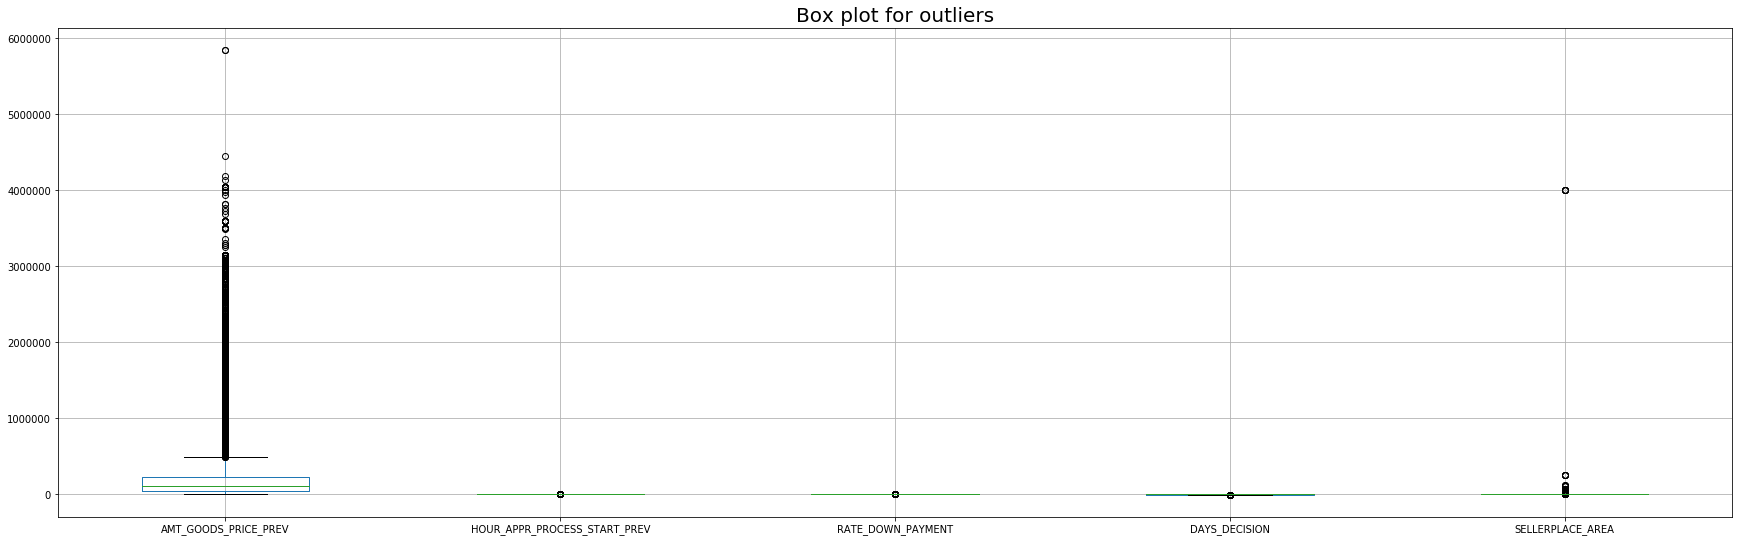

In [52]:
num_cols=numeric_df.columns[75:80]
plot_box(num_cols)

###### Detecting and Removing outliers

In [53]:
num_cols=numeric_df.columns[75:80]
for i in num_cols:
    outlier_datapoints = detect_iqr_outlier(combined_df[i])
    print(i)
    print(sorted(set(outlier_datapoints)))

AMT_GOODS_PRICE_PREV
[499027.5, 499050.0, 499141.035, 499230.0, 499232.25, 499234.5, 499261.5, 499306.5, 499338.0, 499458.375, 499482.0, 499495.5, 499500.0, 499590.0, 499639.5, 499680.0, 499792.5, 499950.0, 499954.5, 499977.0, 499995.0, 499999.5, 500004.0, 500013.0, 500040.0, 500080.5, 500085.0, 500175.0, 500400.0, 500422.5, 500503.5, 500535.0, 500656.5, 500818.5, 500827.5, 500940.0, 501030.0, 501039.0, 501088.59, 501117.03, 501120.0, 501187.5, 501205.5, 501408.0, 501462.0, 501466.5, 501516.0, 501525.0, 501620.355, 501660.0, 501745.5, 501750.0, 501820.92, 501849.0, 502119.0, 502200.0, 502227.0, 502312.5, 502425.0, 502441.74, 502488.0, 502515.0, 502555.5, 502636.5, 502641.0, 502650.0, 502659.0, 502663.5, 502794.0, 502830.0, 503010.0, 503100.0, 503226.0, 503235.0, 503406.0, 503415.0, 503484.705, 503550.0, 503595.0, 503631.0, 503725.5, 503775.0, 503905.5, 503928.0, 503946.0, 503955.0, 503964.0, 504000.0, 504085.5, 504238.5, 504396.0, 504400.5, 504441.0, 504450.0, 504477.0, 504634.5, 50463

HOUR_APPR_PROCESS_START_PREV
[0, 1, 2, 23]
RATE_DOWN_PAYMENT
[0.2722795342610838, 0.2722796204276748, 0.272279829730723, 0.2722801715031381, 0.2722810042974202, 0.27228161316833355, 0.2722817924542578, 0.2722820481698985, 0.2722822509611134, 0.27228252160803684, 0.27228281182131325, 0.27228287194008705, 0.272283199703485, 0.27228340505331744, 0.2722840724424124, 0.2722848471359489, 0.272284887915015, 0.2722851038683575, 0.2722851343234118, 0.2722853190836357, 0.2722858583422845, 0.2722861828065683, 0.2722863415898067, 0.2722863647747193, 0.2722863944322439, 0.2722865714140439, 0.27228708689127434, 0.2722871385746524, 0.2722872756418039, 0.2722879083559317, 0.27228815961004377, 0.2722882901608252, 0.2722893953307176, 0.2722896733564562, 0.27228974538181355, 0.2722902206482185, 0.2722905403396081, 0.2722913196334087, 0.2722913518521973, 0.2722913824784328, 0.27229151117940364, 0.27229169701614475, 0.2722920205193393, 0.2722921489666622, 0.2722922660403823, 0.2722929030954225, 0.272293947

DAYS_DECISION
[-2922, -2921, -2920, -2919, -2918, -2917, -2916, -2915, -2914, -2913, -2912, -2911, -2910, -2909, -2908, -2907, -2906, -2905, -2904, -2903, -2902, -2901, -2900, -2899, -2898, -2897, -2896, -2895, -2894, -2893, -2892, -2891, -2890, -2889, -2888, -2887, -2886, -2885, -2884, -2883, -2882, -2881, -2880, -2879, -2878, -2877]
SELLERPLACE_AREA
[215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 

###### Identifying columns with Outliers

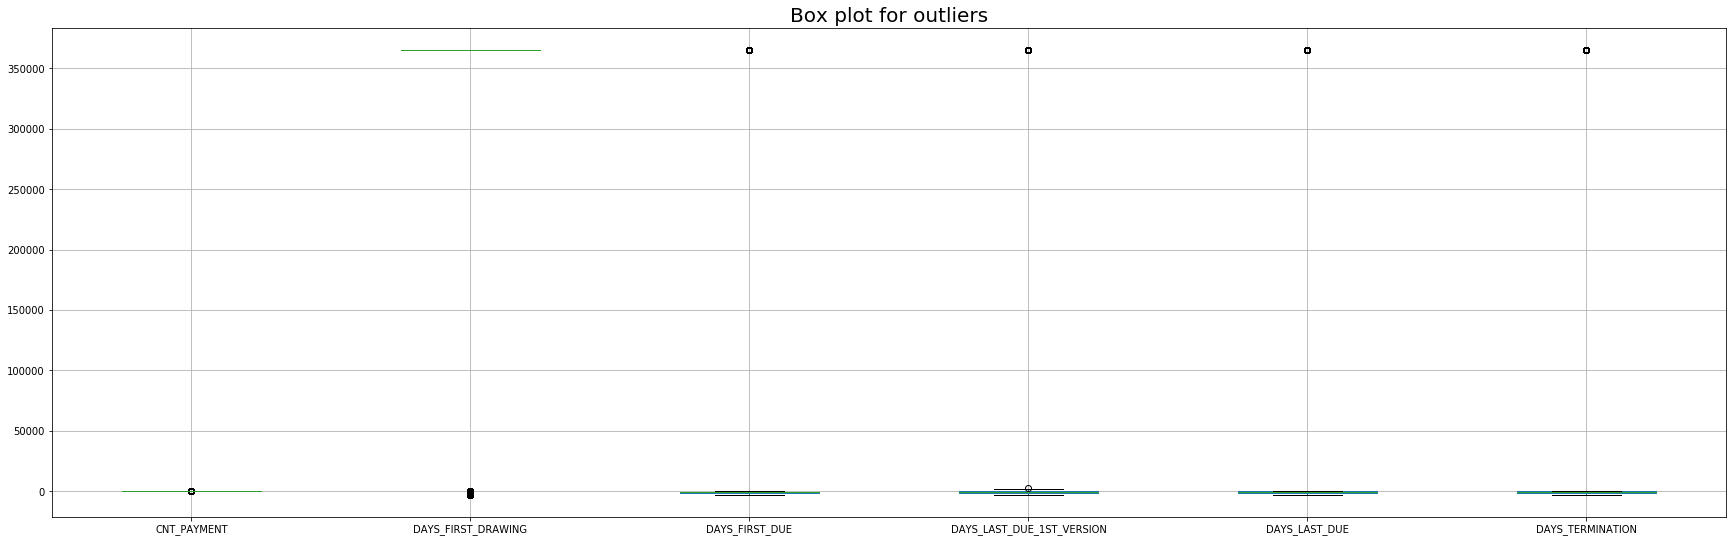

In [54]:
num_cols=numeric_df.columns[80:90]
plot_box(num_cols)

###### Detecting and Removing outliers

In [55]:
num_cols=numeric_df.columns[80:90]
for i in num_cols:
    outlier_datapoints = detect_iqr_outlier(combined_df[i])
    print(i)
    print(sorted(set(outlier_datapoints)))

CNT_PAYMENT
[53.0, 54.0, 59.0, 60.0, 66.0, 72.0, 84.0]
DAYS_FIRST_DRAWING
[-2922.0, -2921.0, -2920.0, -2919.0, -2918.0, -2917.0, -2916.0, -2915.0, -2914.0, -2913.0, -2912.0, -2911.0, -2910.0, -2909.0, -2908.0, -2907.0, -2906.0, -2905.0, -2904.0, -2903.0, -2902.0, -2901.0, -2900.0, -2899.0, -2898.0, -2897.0, -2896.0, -2895.0, -2894.0, -2893.0, -2892.0, -2891.0, -2890.0, -2889.0, -2888.0, -2887.0, -2886.0, -2885.0, -2884.0, -2883.0, -2882.0, -2881.0, -2880.0, -2879.0, -2878.0, -2877.0, -2876.0, -2875.0, -2874.0, -2873.0, -2872.0, -2871.0, -2870.0, -2869.0, -2868.0, -2867.0, -2866.0, -2865.0, -2864.0, -2863.0, -2862.0, -2861.0, -2860.0, -2859.0, -2858.0, -2857.0, -2856.0, -2855.0, -2854.0, -2853.0, -2852.0, -2851.0, -2850.0, -2849.0, -2848.0, -2847.0, -2846.0, -2845.0, -2844.0, -2843.0, -2842.0, -2841.0, -2840.0, -2839.0, -2838.0, -2837.0, -2836.0, -2835.0, -2834.0, -2833.0, -2832.0, -2831.0, -2830.0, -2829.0, -2828.0, -2827.0, -2826.0, -2825.0, -2824.0, -2823.0, -2822.0, -2821.0, -2820.0

DAYS_FIRST_DUE
[365243.0]
DAYS_LAST_DUE_1ST_VERSION
[2389.0, 365243.0]
DAYS_LAST_DUE
[365243.0]
DAYS_TERMINATION
[365243.0]


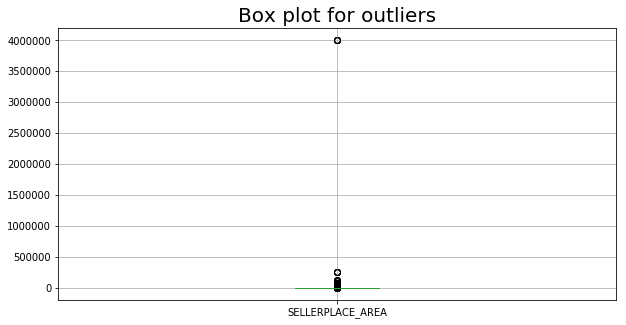

In [56]:
#bOX PLOT FOR SELLERPLACE_AREA
plt.figure(figsize=(10,5))
combined_df.boxplot(column='SELLERPLACE_AREA')
plt.title("Box plot for outliers", fontsize=20)
plt.show()

In [57]:
# Detecting outliers in SELLERPLACE_AREA
outlier_datapoints = detect_iqr_outlier(combined_df['SELLERPLACE_AREA'])
print(sorted(set(outlier_datapoints)))

[215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414,

In [58]:
combined_df[combined_df['SELLERPLACE_AREA']==4000000].shape

(5, 156)

In [59]:
#REmoving outliers in SELLERPLACE_AREA
combined_df.drop(combined_df[combined_df['SELLERPLACE_AREA']==4000000].index,inplace=True)

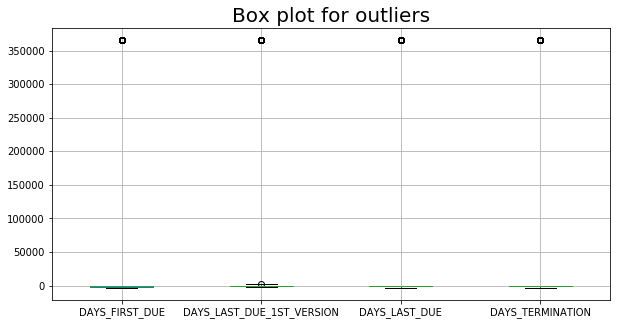

In [60]:
#bOX PLOT FOR SELLERPLACE_AREA
plt.figure(figsize=(10,5))
combined_df.boxplot(column=['DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE','DAYS_TERMINATION'])
plt.title("Box plot for outliers", fontsize=20)
plt.show()


In [61]:
combined_df[combined_df['DAYS_TERMINATION']==365243.0].shape

(193996, 156)

###### Significant outliers in Numerical columns identified using box plots and detected using IQR  method and corresponding rows removed

In [62]:
combined_df.shape

(1413683, 156)

### DERIVED METRICS

#### Converting DAYS TO YEARS

In [63]:
combined_df['CLIENT_AGE']=combined_df['DAYS_BIRTH']/-365
combined_df.drop('DAYS_BIRTH', axis=1, inplace=True)

In [64]:
combined_df['YEARS_EMPLOYED']=combined_df['DAYS_EMPLOYED']/-365
combined_df.drop('DAYS_EMPLOYED', axis=1, inplace=True)

In [65]:
combined_df['YEARS_TERMINATION']=combined_df['DAYS_TERMINATION']/-365
combined_df.drop('DAYS_TERMINATION', axis=1, inplace=True)

In [66]:
combined_df['YEARS_FIRST_DUE']=combined_df['DAYS_FIRST_DUE']/-365
combined_df.drop('DAYS_FIRST_DUE', axis=1, inplace=True)

In [67]:
combined_df['YEARS_LAST_DUE']=combined_df['DAYS_LAST_DUE']/-365
combined_df.drop('DAYS_LAST_DUE', axis=1, inplace=True)

In [68]:
combined_df['YEARS_LAST_DUE_1ST_VERSION']=combined_df['DAYS_LAST_DUE_1ST_VERSION']/-365
combined_df.drop('DAYS_LAST_DUE_1ST_VERSION', axis=1, inplace=True)

In [69]:
combined_df['YEARS_REGISTRATION']=combined_df['DAYS_REGISTRATION']/-365
combined_df.drop('DAYS_REGISTRATION', axis=1, inplace=True)

In [70]:
combined_df['YEARS_DECISION']=combined_df['DAYS_DECISION']/-365
combined_df.drop('DAYS_DECISION', axis=1, inplace=True)

In [71]:
combined_df['YEARS_FIRST_DRAWING']=combined_df['DAYS_FIRST_DRAWING']/-365
combined_df.drop('DAYS_FIRST_DRAWING', axis=1, inplace=True)

In [72]:
combined_df['YEARS_ID_PUBLISH']=combined_df['DAYS_ID_PUBLISH']/-365
combined_df.drop('DAYS_ID_PUBLISH', axis=1, inplace=True)

In [73]:
combined_df['YEARS_LAST_PHONE_CHANGE']=combined_df['DAYS_LAST_PHONE_CHANGE']/-365
combined_df.drop('DAYS_LAST_PHONE_CHANGE', axis=1, inplace=True)

#### Binning of values to make categorical

In [74]:
bins = [np.NINF, 0, 0.6, 1, 2, 3, 4, 5 , 10,np.inf]
names = ['NOT TERMINATED', '<6 months', '6months-1yr', '1-2 yrs', '2-3 yrs','3-4yrs','4-5yrs','5-10 yrs','10+ yrs']

combined_df['RANGE_YEARS_TERMINATION'] = pd.cut(combined_df['YEARS_TERMINATION'], bins, labels=names)


In [75]:
bins = [np.NINF,-5,-1,-0.6, 0, 0.6, 1, 2, 3, 4, 5 , 10,np.inf]
names = ['NOT DUE','due in 5 yrs','due in 1 yrs','due in 6 months','6 months before', '6months-1yr', '1-2 yrs', '2-3 yrs','3-4yrs','4-5yrs','5-10 yrs','10+ yrs']

combined_df['RANGE_YEARS_LAST_DUE_1ST_VERSION'] = pd.cut(combined_df['YEARS_LAST_DUE_1ST_VERSION'], bins, labels=names)


In [76]:
bins = [np.NINF, 0, 0.6, 1, 2, 3, 4, 5 , 10,np.inf]
names = ['NOT DUE', '<6 months', '6months-1yr', '1-2 yrs', '2-3 yrs','3-4yrs','4-5yrs','5-10 yrs','10+ yrs']

combined_df['RANGE_YEARS_LAST_DUE'] = pd.cut(combined_df['YEARS_LAST_DUE'], bins, labels=names)


In [77]:
bins = [np.NINF, 0, 0.6, 1, 2, 3, 4, 5 , 10,np.inf]
names = ['NOT DUE', '<6 months', '6months-1yr', '1-2 yrs', '2-3 yrs','3-4yrs','4-5yrs','5-10 yrs','10+ yrs']

combined_df['RANGE_YEARS_FIRST_DUE'] = pd.cut(combined_df['YEARS_FIRST_DUE'], bins, labels=names)


In [78]:
bins = [np.NINF, 0, 0.6, 1, 2, 3, 4, 5 , 10,np.inf]
names = ['NOT DECIDED', '<6 months', '6months-1yr', '1-2 yrs', '2-3 yrs','3-4yrs','4-5yrs','5-10 yrs','10+ yrs']

combined_df['RANGE_YEARS_DECISION'] = pd.cut(combined_df['YEARS_DECISION'], bins, labels=names)


In [79]:
bins = [np.NINF, 0, 0.6, 1, 2, 5, 10,15,20,25,np.inf]
names = ['NOT employed', '<6 months', '6months-1yr', '1-2 yrs', '2-5 yrs','5-10yrs','10-15yrs','15-20 yrs','20-25 yrs','25+ yrs']

combined_df['RANGE_YEARS_EMPLOYED'] = pd.cut(combined_df['YEARS_EMPLOYED'], bins, labels=names)


In [80]:
bins = [np.NINF, 0, 0.6, 1, 2, 3, 4, 5 , 10,np.inf]
names = ['NOT DRAWN', '<6 months', '6months-1yr', '1-2 yrs', '2-3 yrs','3-4yrs','4-5yrs','5-10 yrs','10+ yrs']

combined_df['RANGE_YEARS_FIRST_DRAWING'] = pd.cut(combined_df['YEARS_FIRST_DRAWING'], bins, labels=names)


In [81]:
bins = [np.NINF, 0, 0.6, 1, 2, 3, 4,5 , 10,np.inf]
names = ['No change', '<6 months', '6months-1yr', '1-2 yrs', '2-3 yrs','3-4yrs','4-5yrs','5-10yrs','10+ yrs']

combined_df['RANGE_YEARS_ID_PUBLISH'] = pd.cut(combined_df['YEARS_ID_PUBLISH'], bins, labels=names)


In [82]:
bins = [np.NINF, 0, 0.6, 1, 2, 3, 4,5 , 10,np.inf]
names = ['No change', '<6 months', '6months-1yr', '1-2 yrs', '2-3 yrs','3-4yrs','4-5yrs','5-10yrs','10+ yrs']

combined_df['RANGE_YEARS_REGISTRATION'] = pd.cut(combined_df['YEARS_REGISTRATION'], bins, labels=names)


In [83]:
bins = [np.NINF, 0, 0.6, 1, 2, 3, 4,5 ,np.inf]
names = ['No change', '<6 months', '6months-1yr', '1-2 yrs', '2-3 yrs','3-4yrs','4-5yrs','5+ yrs']

combined_df['RANGE_YEARS_LAST_PHONE_CHANGE'] = pd.cut(combined_df['YEARS_LAST_PHONE_CHANGE'], bins, labels=names)


###### CREATE BINS FOR CLIENT AGE

In [84]:
bins = [0, 20, 30, 40, 50, 60, np.inf]
names = ['<20', '20-30', '30-40', '40-50', '50-60', '60+']

combined_df['AGE_RANGE'] = pd.cut(combined_df['CLIENT_AGE'], bins, labels=names)



###### CREATE BINS FOR AMT_INCOME_TOTAL

In [85]:
bins = [0, 25000, 50000,100000, 200000, 400000,1000000 ,np.inf]
names = ['<25K', '25K-50K', '50K-1LA', '1LA-2LA', '2LA-4LA', '4LA-10LA','10LA+']

combined_df['INCOME_RANGE'] = pd.cut(combined_df['AMT_INCOME_TOTAL'], bins, labels=names)


###### CREATE BINS FOR AMT_CREDIT_CURR

In [86]:
bins = [0, 25000, 50000,100000, 200000, 400000,1000000 ,np.inf]
names = ['<25K', '25K-50K', '50K-1LA', '1LA-2LA', '2LA-4LA', '4LA-10LA','10LA+']

combined_df['CURR_CREDIT_RANGE'] = pd.cut(combined_df['AMT_CREDIT_CURR'], bins, labels=names)


###### CREATE BINS FOR AMT_ANNUITY_CURR

In [87]:
bins = [0, 10000, 20000,30000, 40000, 50000,75000 ,100000,150000,200000,np.inf]
names = ['<10K', '10K-20K','20K-30K','30K-40K' ,'40K-50K','50K-75K', '75k-1LA', '1LA-1.5LA', '1.5LA-2LA','2LA+']

combined_df['CURR_ANNUITY_RANGE'] = pd.cut(combined_df['AMT_ANNUITY_CURR'], bins, labels=names)


###### CREATE BINS FOR  AMT_GOODS_PRICE_CURR

In [88]:
bins = [0, 25000, 50000,100000, 200000, 400000,600000 ,800000,1000000,np.inf]
names = ['<25K', '25K-50K', '50K-1LA', '1LA-2LA', '2LA-4LA', '4LA-6LA','6LA-8LA','8LA-10LA','10LA+']

combined_df['CURR_GOODS_PRICE_RANGE'] = pd.cut(combined_df['AMT_GOODS_PRICE_CURR'], bins, labels=names)


###### CREATE BINS FOR AMT_CREDIT_PREV

In [89]:
bins = [0, 25000, 50000,100000, 200000, 400000,1000000 ,np.inf]
names = ['<25K', '25K-50K', '50K-1LA', '1LA-2LA', '2LA-4LA', '4LA-10LA','10LA+']

combined_df['PREV_CREDIT_RANGE'] = pd.cut(combined_df['AMT_CREDIT_PREV'], bins, labels=names)


###### CREATE BINS FOR AMT_GOODS_PRICE_PREV

In [90]:
bins = [0, 25000, 50000,100000, 200000, 400000,600000 ,800000,1000000,np.inf]
names = ['<25K', '25K-50K', '50K-1LA', '1LA-2LA', '2LA-4LA', '4LA-6LA','6LA-8LA','8LA-10LA','10LA+']

combined_df['PREV_GOODS_PRICE_RANGE'] = pd.cut(combined_df['AMT_GOODS_PRICE_PREV'], bins, labels=names)


###### CREATE BINS FOR AMT_ANNUITY_PREV

In [91]:
bins = [0, 10000, 20000,30000, 40000, 50000,75000 ,100000,150000,200000,np.inf]
names = ['<10K', '10K-20K','20K-30K','30K-40K' ,'40K-50K','50K-75K', '75k-1LA', '1LA-1.5LA', '1.5LA-2LA','2LA+']

combined_df['PREV_ANNUITY_RANGE'] = pd.cut(combined_df['AMT_ANNUITY_PREV'], bins, labels=names)


###### CREATE BINS FOR AMT_APPLICATION

In [92]:
bins = [0, 25000, 50000,100000, 200000, 400000,600000 ,800000,1000000,np.inf]
names = ['<25K', '25K-50K', '50K-1LA', '1LA-2LA', '2LA-4LA', '4LA-6LA','6LA-8LA','8LA-10LA','10LA+']

combined_df['AMT_APPLICATION_RANGE'] = pd.cut(combined_df['AMT_APPLICATION'], bins, labels=names)


###### CREATE BINS FOR AMT_DOWN_PAYMENT

In [93]:
bins = [0, 2500,5000,10000,15000,20000,25000, 50000, 100000, np.inf]
names = ['<2.5K','2.5K-5K','5K-10K','10K-15K','15K-20K','20K-25K','25K-50K', '50K-1LA','1LA+']

combined_df['AMT_DOWN_PAYMENT_RANGE'] = pd.cut(combined_df['AMT_DOWN_PAYMENT'], bins, labels=names)


#### VARIABLE TO INCOME RATIOS

In [94]:
combined_df['CREDIT_TO_INCOME']=combined_df['AMT_CREDIT_CURR']/combined_df['AMT_INCOME_TOTAL']*100
combined_df['ANNUITY_T0_INCOME']=combined_df['AMT_ANNUITY_CURR']/combined_df['AMT_INCOME_TOTAL']*100

###### SEGMENTING DATAFRAME ON COLUMN DATATYPE FOR EASE OF ANALYSIS

In [95]:
categ_df= combined_df.select_dtypes('object')
numeric_df= combined_df.select_dtypes([np.number])
derived_categ_df=combined_df.select_dtypes('category')


In [96]:
print(categ_df.columns)

Index(['NAME_CONTRACT_TYPE_CURR', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE_CURR', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START_CURR',
       'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'NAME_CONTRACT_TYPE_PREV',
       'WEEKDAY_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE_PREV', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION'],
      dtype='object')


In [97]:
print(derived_categ_df.columns)

Index(['CNT_CHILDREN', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'NFLAG_LAST_APPL_IN_DAY',
       'NFLAG_INSURED_ON_APPROVAL', 'RANGE_YEARS_TERMINATION',
       'RANGE_YEARS_LAST_DUE_1ST_VERSION', 'RANGE_YEARS_LAST_DUE',
  

In [98]:
print(numeric_df.columns)

Index(['SK_ID_CURR', 'TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_CURR',
       'AMT_ANNUITY_CURR', 'AMT_GOODS_PRICE_CURR',
       'REGION_POPULATION_RELATIVE', 'OWN_CAR_AGE',
       'HOUR_APPR_PROCESS_START_CURR', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI

#### UNIVARIANT ANALYSIS of TARGET VARIABLE FOR CHECKING DATA IMBALANCE

Total loanee  1413683
Repay vz Default
 0    1291326
1     122357
Name: TARGET, dtype: int64


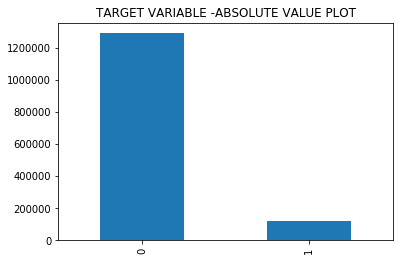

In [99]:
x=combined_df['TARGET'].value_counts()
x.plot(kind='bar',title="TARGET VARIABLE -ABSOLUTE VALUE PLOT")
print("Total loanee " ,combined_df['TARGET'].count())
print("Repay vz Default\n",combined_df['TARGET'].value_counts())
#print("Repay vz Default as % \n",x)

#### Count of Repayers = 1291326
#### Count of Defaulters =122357
#### Ratio of Data Imbalance is  1291326 :122357 ie. 10.554:1

Total loanee  1413683
Repayers vz Defaulters
 0    1291326
1     122357
Name: TARGET, dtype: int64
Repayers vz Defaulters as % 
 0   91.3448
1    8.6552
Name: TARGET, dtype: float64


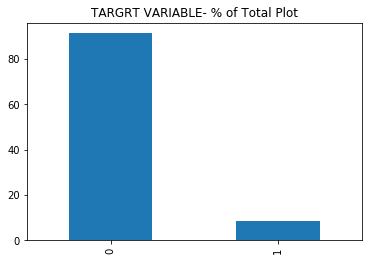

In [100]:
x=combined_df['TARGET'].value_counts()/combined_df['TARGET'].count()*100
x.plot(kind='bar',title="TARGRT VARIABLE- % of Total Plot")
print("Total loanee " ,combined_df['TARGET'].count())
print("Repayers vz Defaulters\n",combined_df['TARGET'].value_counts())
print("Repayers vz Defaulters as % \n",x)

#### From 1413701 loanee, 91.3447 % are Good customers and rest 8.6553 % are bad customers

Function to plot categoric 

In [101]:
repayers_df=combined_df[combined_df['TARGET']==0]
defaulters_df=combined_df[combined_df['TARGET']==1]

In [102]:
def plot_categoric(column_name,title,plot_type):
   
       plot_type
       fig ,(ax1,ax2)=plt.subplots(1,2)
       fig.suptitle(title)

       nx=len(repayers_df['TARGET'])
       x=repayers_df[column_name].value_counts()/nx*100
       x.plot(ax=ax1,kind=plot_type,title="Good Clients")
       print("Repayers\n",x)
        
       ny=len(defaulters_df['TARGET'])     
       y=defaulters_df[column_name].value_counts()/ny*100       
       y.plot(ax=ax2,kind=plot_type,title="Defaulters")
       print("Defaulters\n",y)
   

###### Function to plot univariate analysis

In [103]:
def univariate(df,col,vartype,hue =None):
    
    '''
    Univariate function will plot the graphs based on the parameters.
    df      : dataframe name
    col     : Column name
    vartype : variable type : continuos or categorical
                Continuos(0)   : Distribution, Violin & Boxplot will be plotted.
                Categorical(1) : Countplot will be plotted.
    hue     : It's only applicable for categorical analysis.
    
    '''
    sns.set(style="darkgrid")
    
    if vartype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(10,5))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        #ax[1].set_title("Violin Plot")
        #sns.violinplot(data =df, x=col,ax=ax[1], inner="quartile")
        ax[1].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[1],orient='v')
    
    if vartype == 1:
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots()
        width = len(df[col].unique())  + 4*len(temp.unique())
        fig.set_size_inches(width , 5)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
        if len(temp.unique()) > 0:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(combined_df))), (p.get_x()+0.05, p.get_height()+30))  
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+30)) 
        del temp
    else:
        exit
        
    plt.show()


#### Categorical variables-Segmented univariate Analysis

In [104]:
print(categ_df.columns)

Index(['NAME_CONTRACT_TYPE_CURR', 'CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE_CURR', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START_CURR',
       'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'NAME_CONTRACT_TYPE_PREV',
       'WEEKDAY_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE_PREV', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION'],
      dtype='object')


In [105]:
client_variables=['CODE_GENDER', 'FLAG_OWN_CAR',
       'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE_CURR', 'NAME_INCOME_TYPE',
       'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
       'OCCUPATION_TYPE', 'CNT_CHILDREN', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'RANGE_YEARS_LAST_PHONE_CHANGE',
        'RANGE_YEARS_ID_PUBLISH',
       'RANGE_YEARS_EMPLOYED','RANGE_YEARS_REGISTRATION', 'AGE_RANGE', 'INCOME_RANGE','ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE','NAME_TYPE_SUITE_PREV','NAME_CLIENT_TYPE']


In [106]:
loan_variables=['NAME_CONTRACT_TYPE_CURR','WEEKDAY_APPR_PROCESS_START_CURR','FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'NFLAG_LAST_APPL_IN_DAY',
       'NFLAG_INSURED_ON_APPROVAL','RANGE_YEARS_DECISION', 'RANGE_YEARS_LAST_DUE',
       'RANGE_YEARS_LAST_DUE_1ST_VERSION', 'RANGE_YEARS_FIRST_DUE',
       'RANGE_YEARS_TERMINATION', 'RANGE_YEARS_FIRST_DRAWING','CURR_CREDIT_RANGE', 'CURR_ANNUITY_RANGE', 'CURR_GOODS_PRICE_RANGE',
       'PREV_CREDIT_RANGE', 'PREV_GOODS_PRICE_RANGE', 'PREV_ANNUITY_RANGE',
       'AMT_APPLICATION_RANGE', 'AMT_DOWN_PAYMENT_RANGE','NAME_CONTRACT_TYPE_PREV',
       'WEEKDAY_APPR_PROCESS_START_PREV', 'FLAG_LAST_APPL_PER_CONTRACT',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON','NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'NAME_SELLER_INDUSTRY', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION']

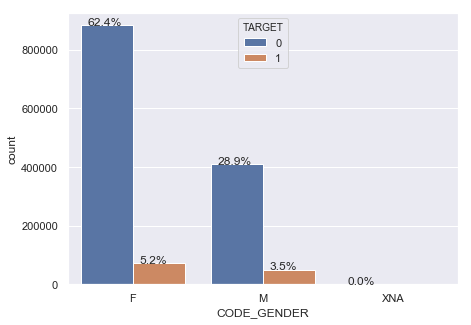

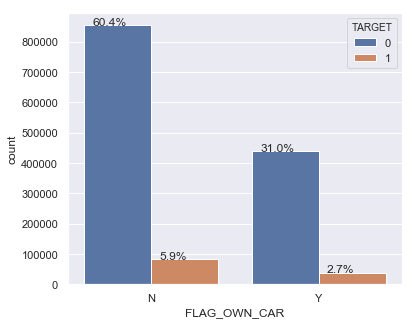

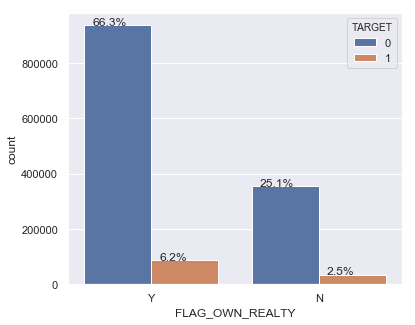

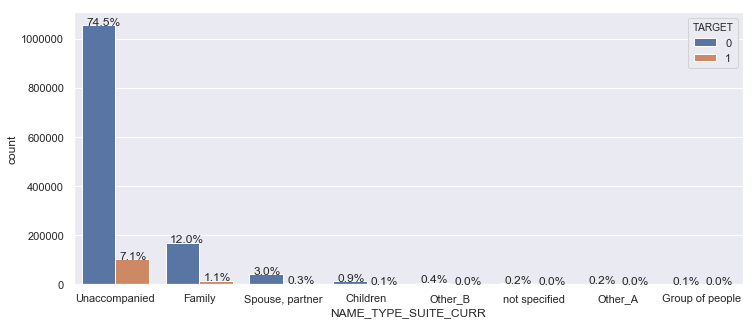

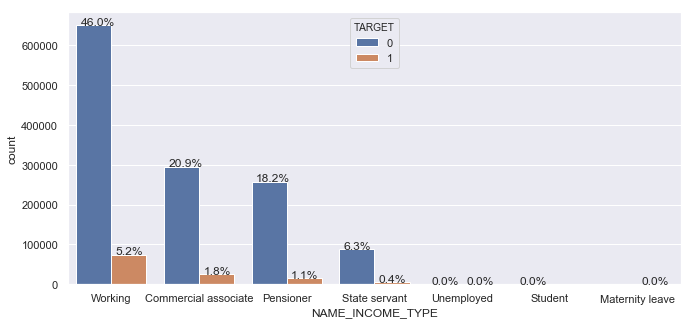

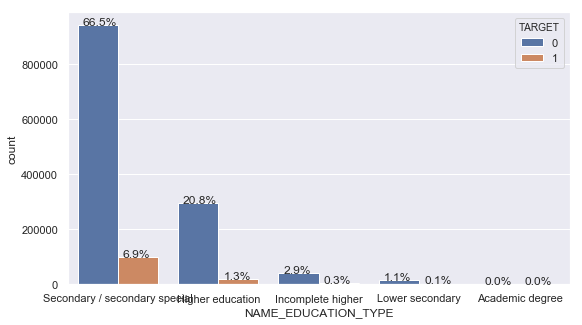

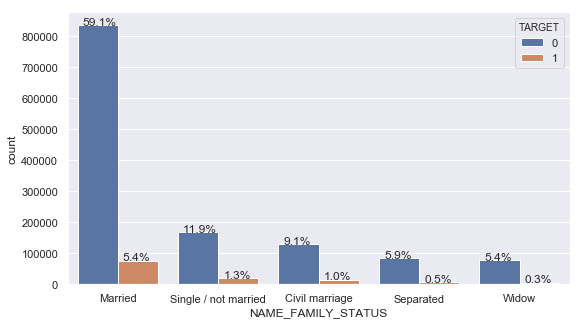

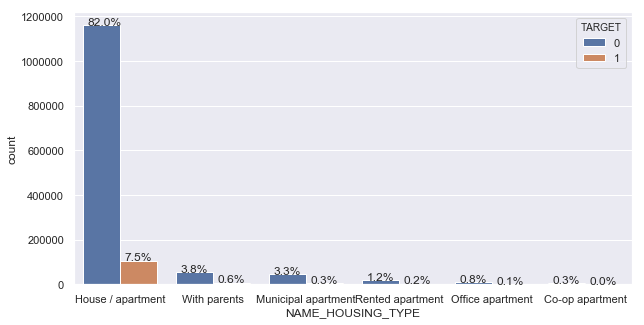

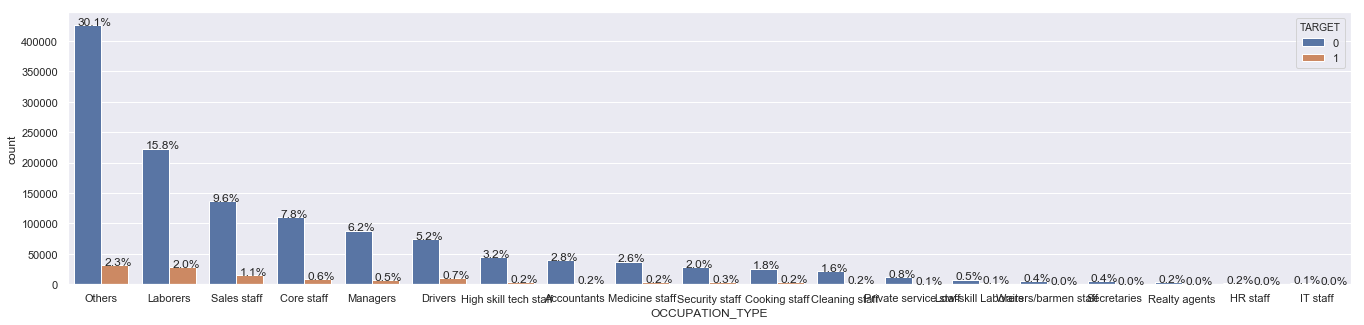

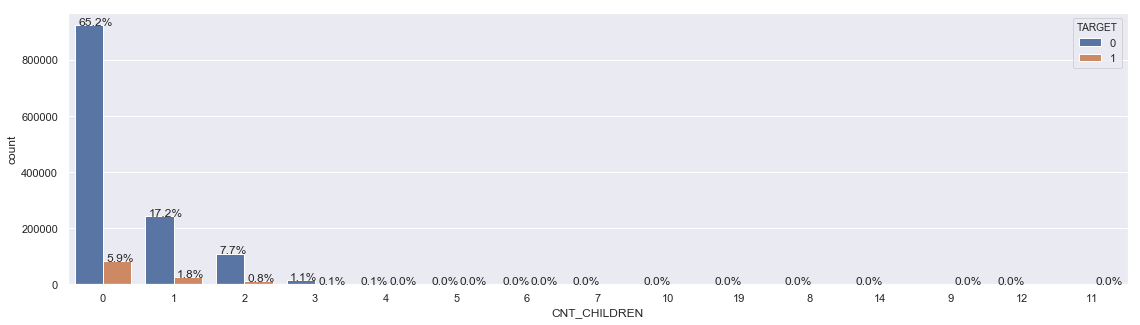

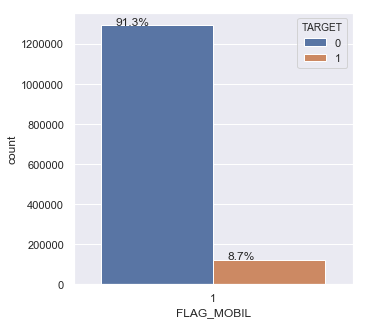

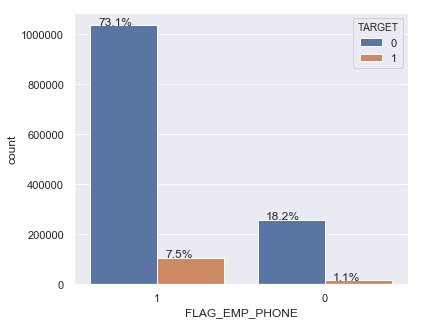

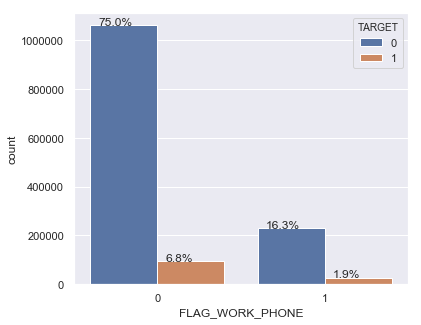

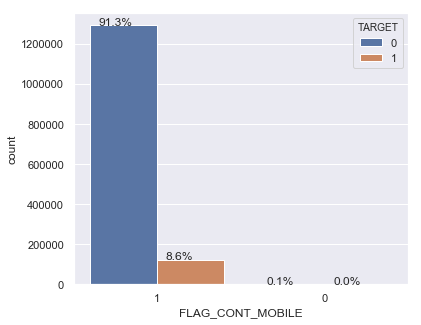

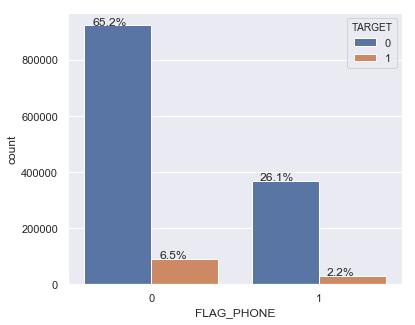

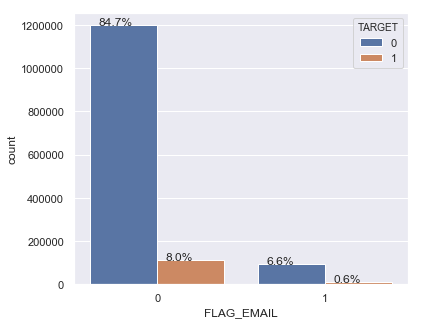

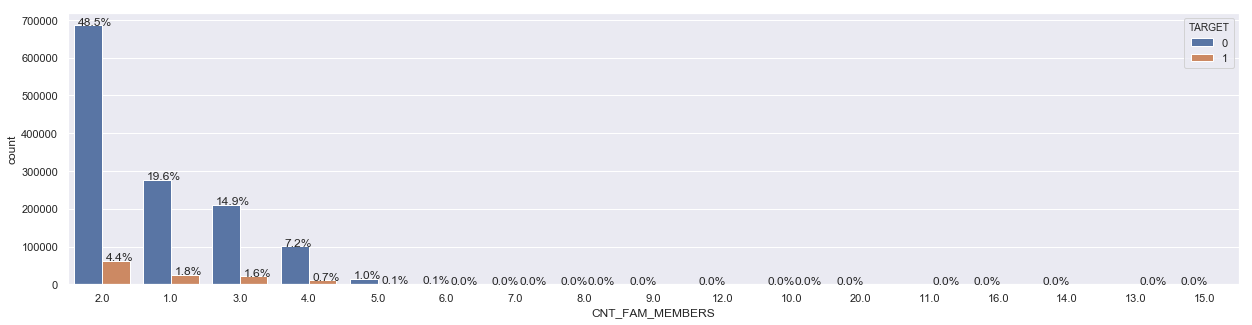

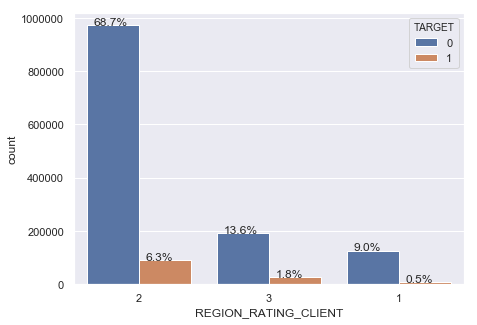

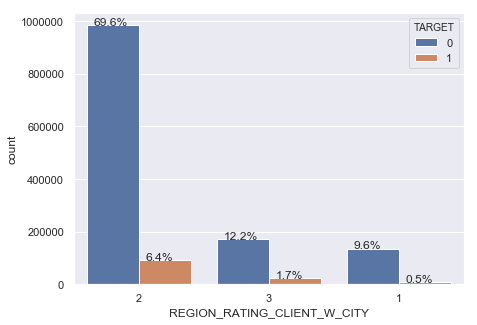

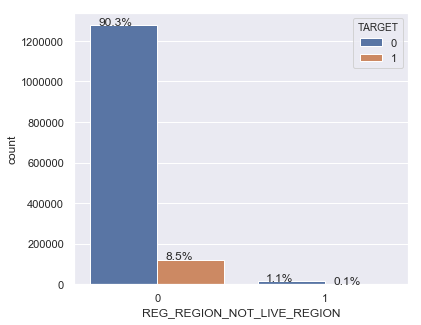

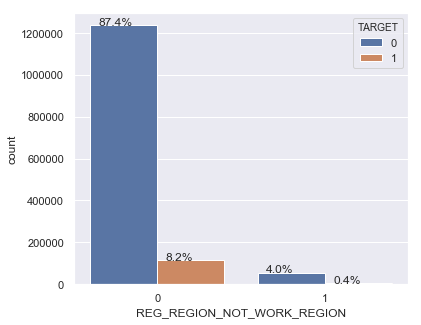

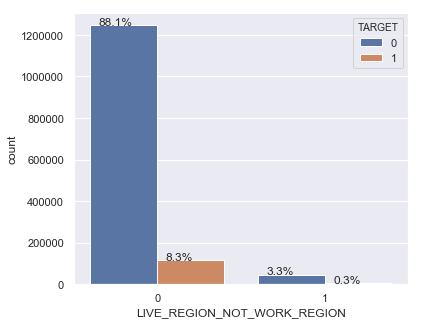

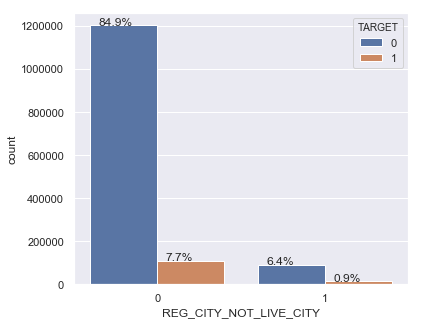

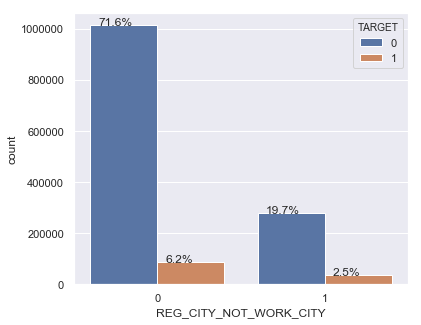

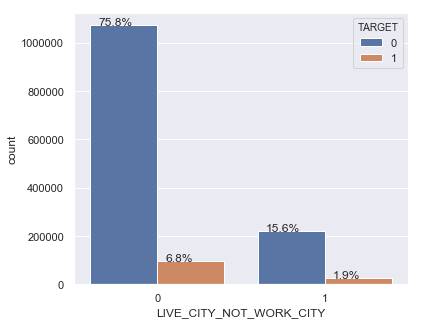

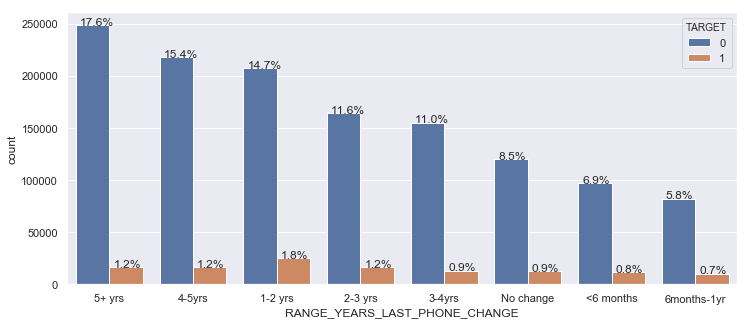

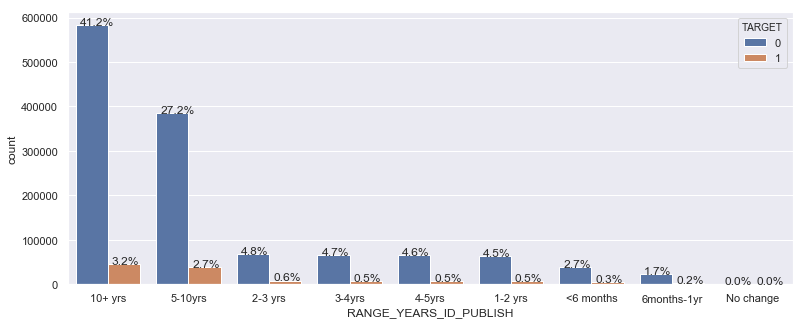

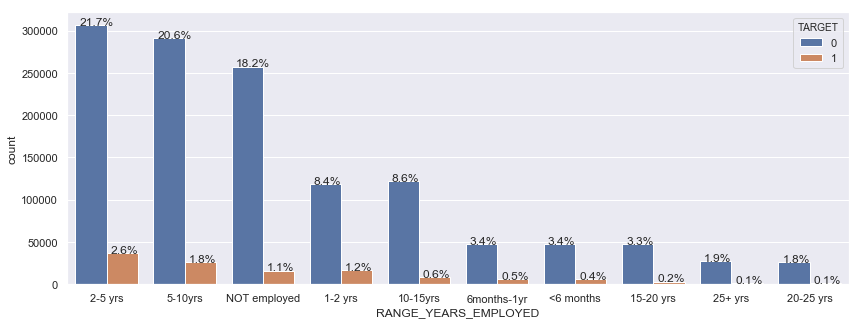

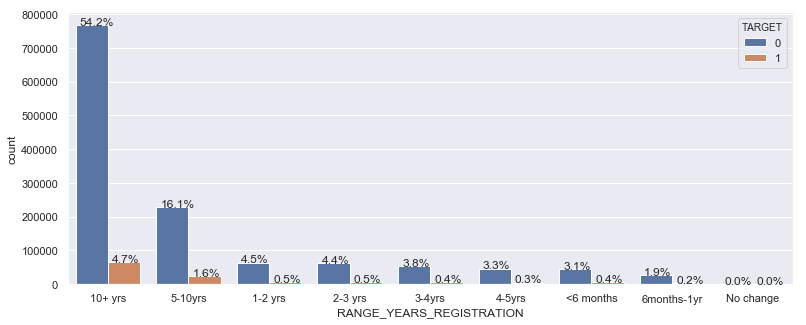

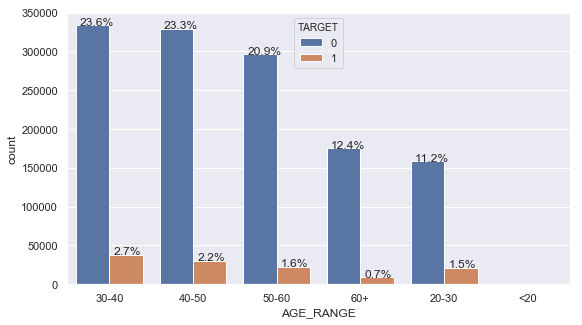

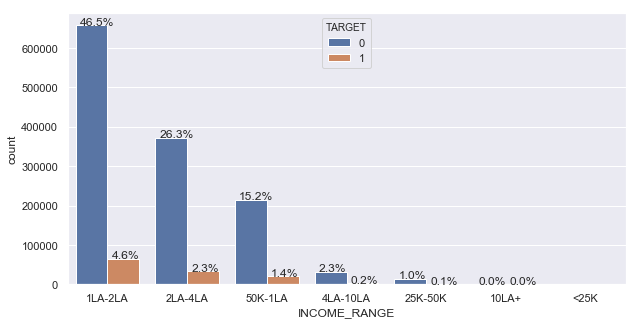

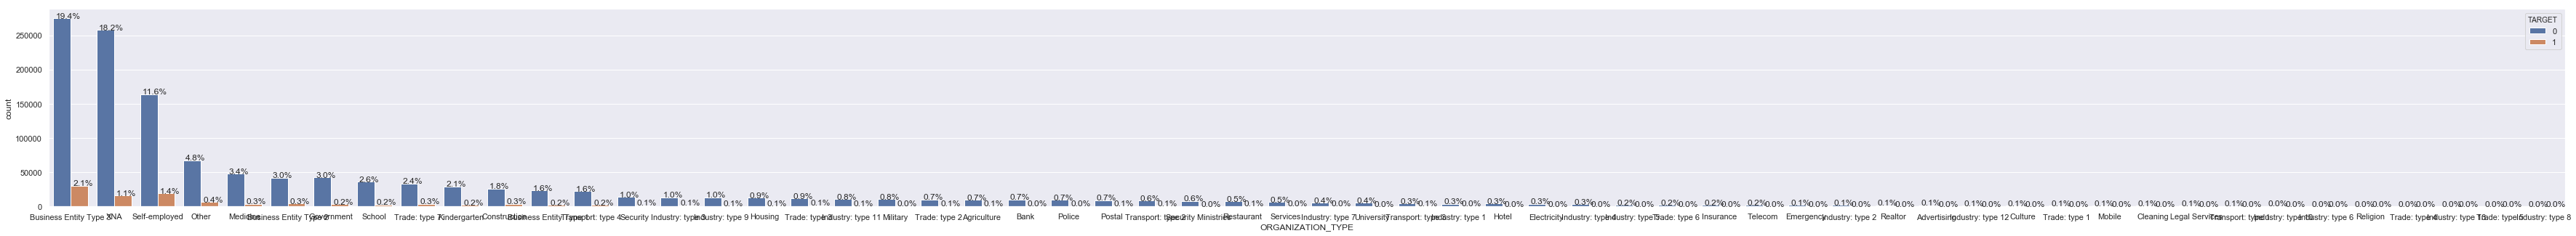

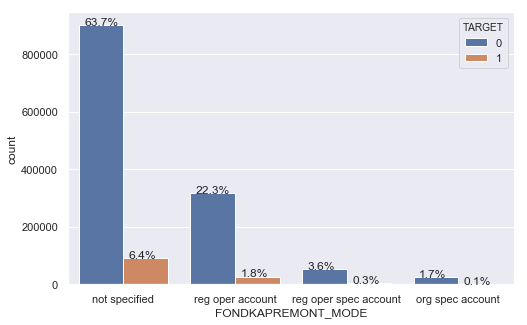

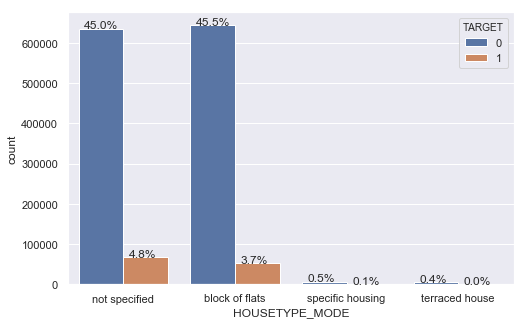

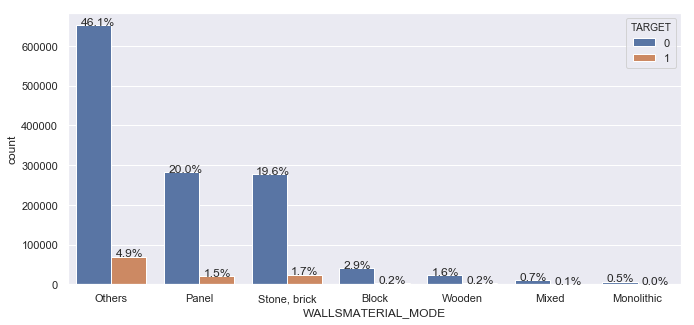

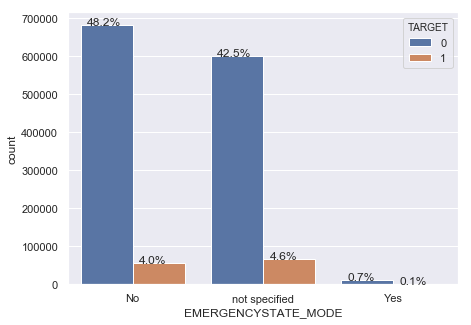

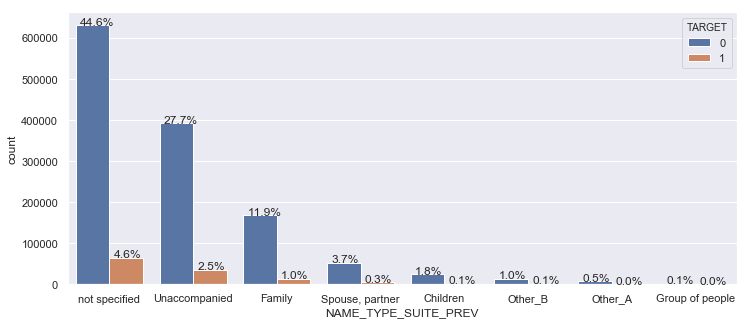

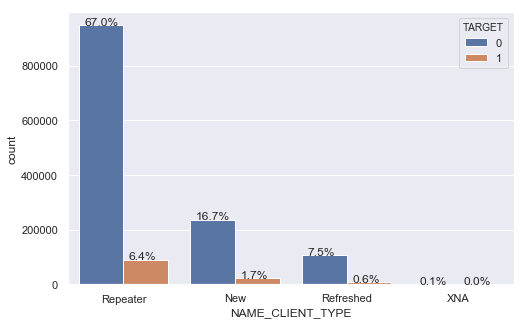

In [107]:
for item in client_variables:
           univariate(df=combined_df,col=item,vartype=1,hue='TARGET')

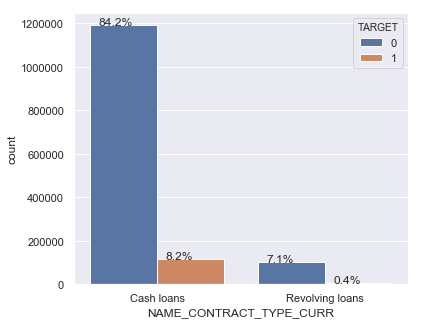

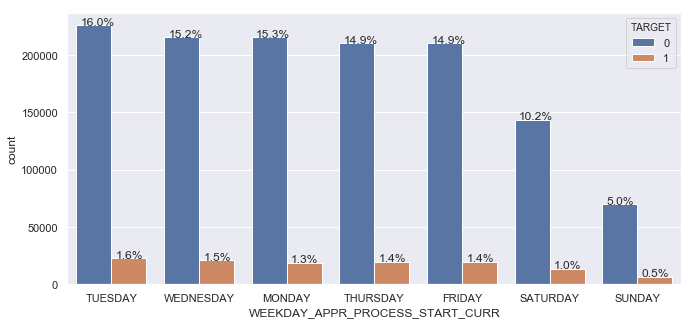

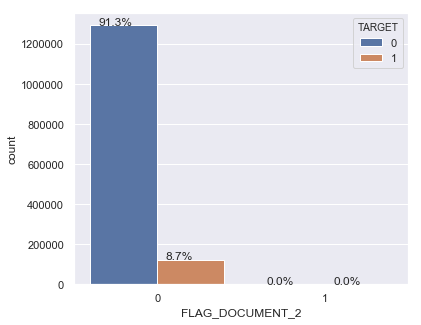

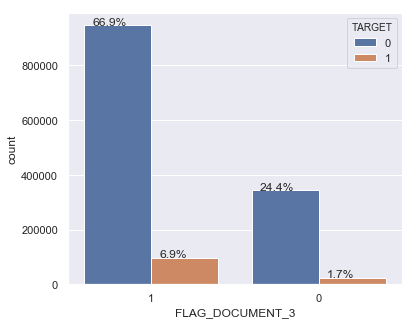

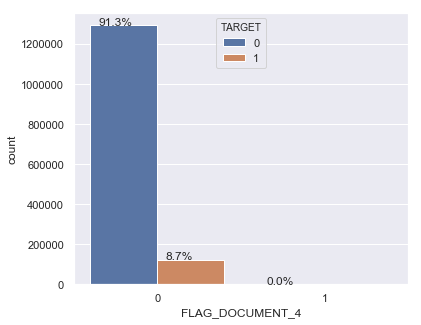

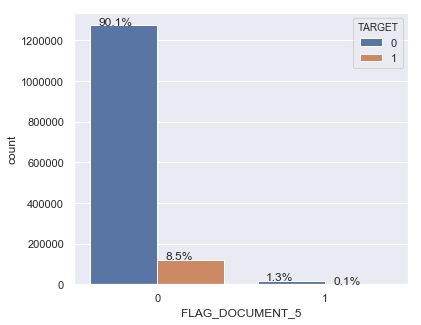

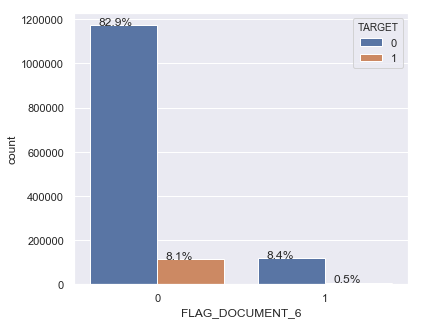

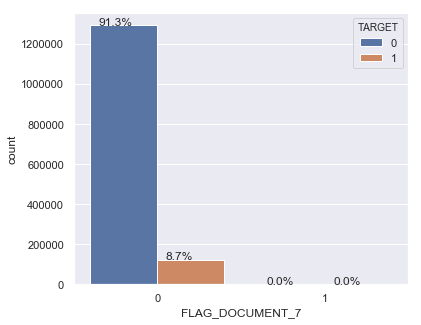

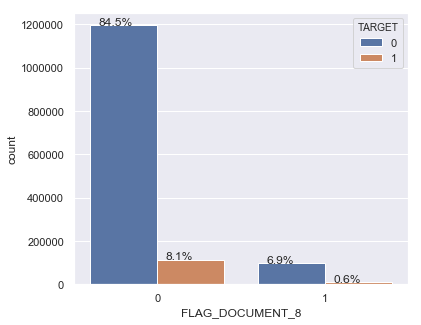

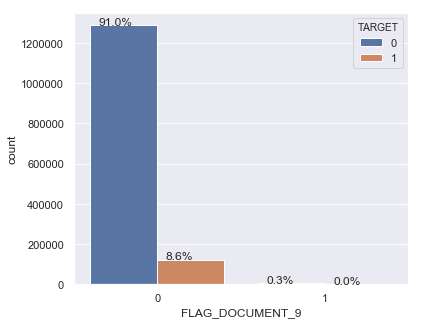

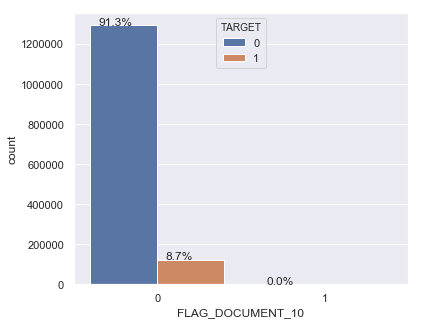

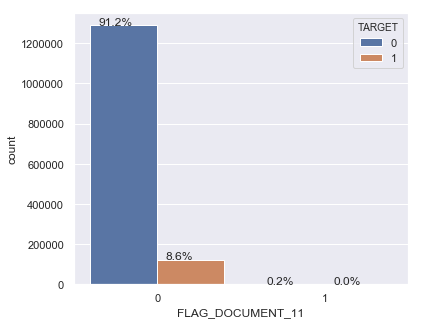

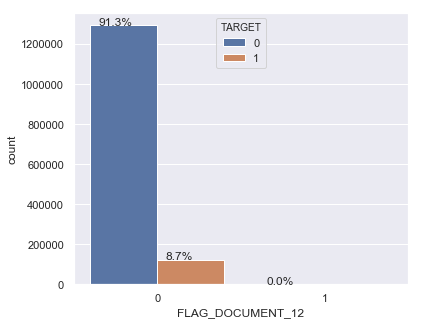

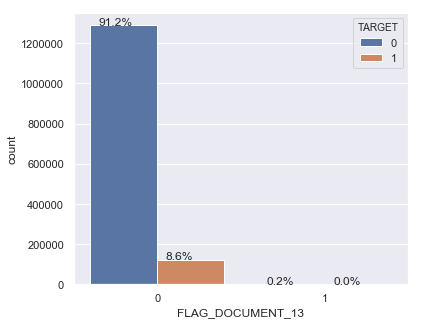

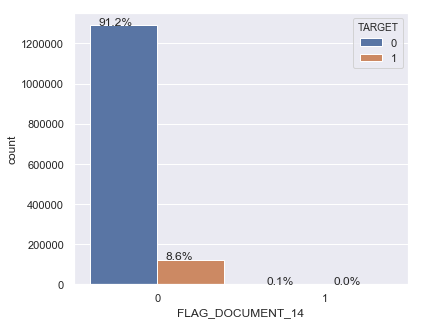

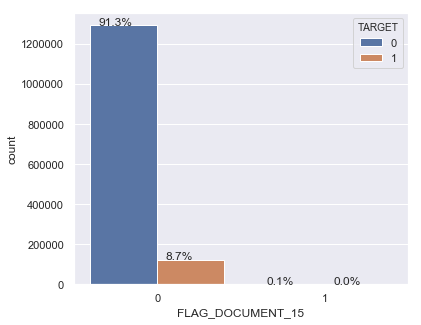

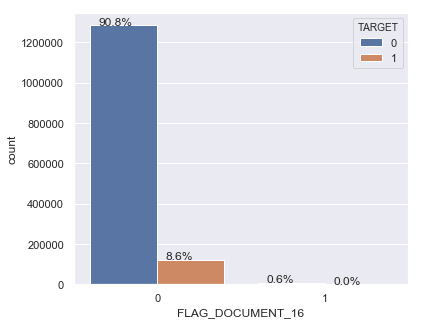

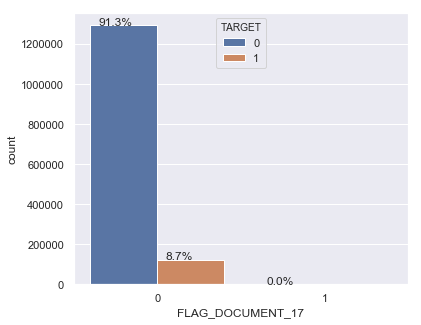

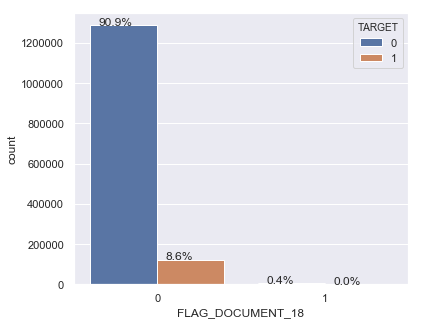

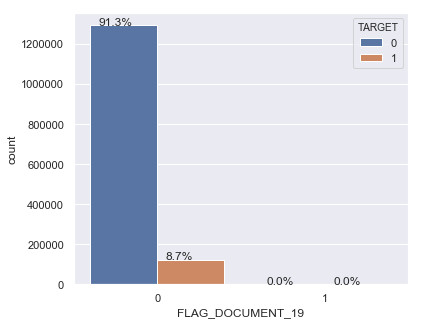

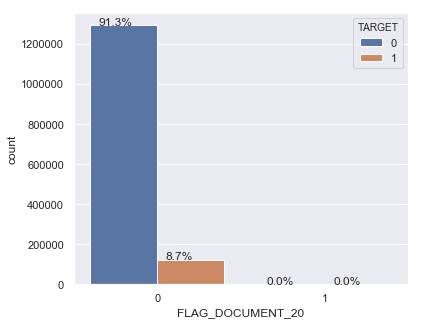

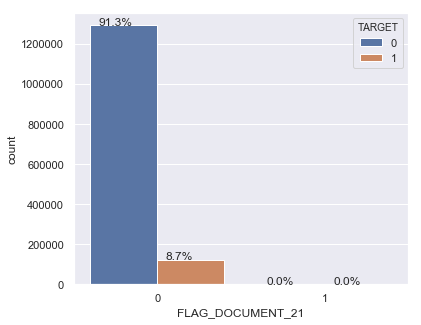

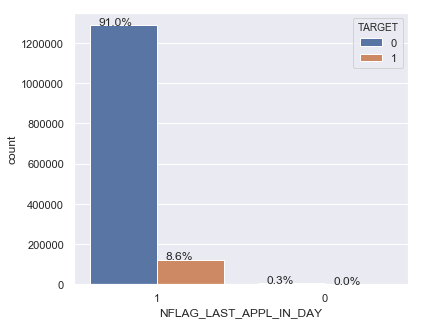

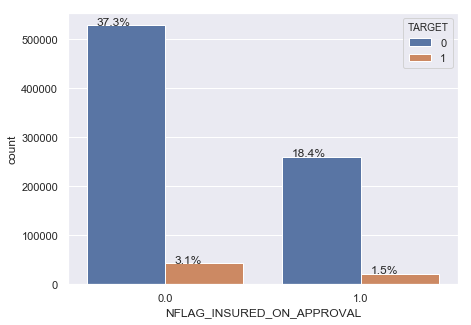

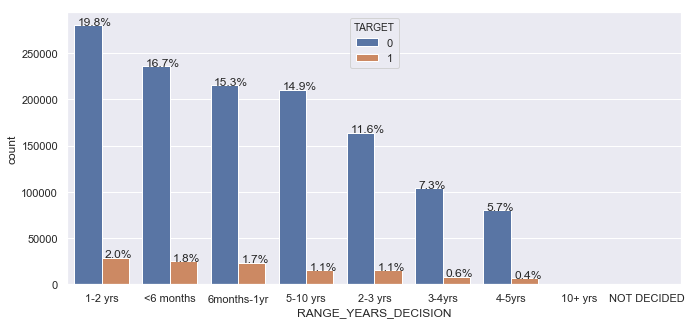

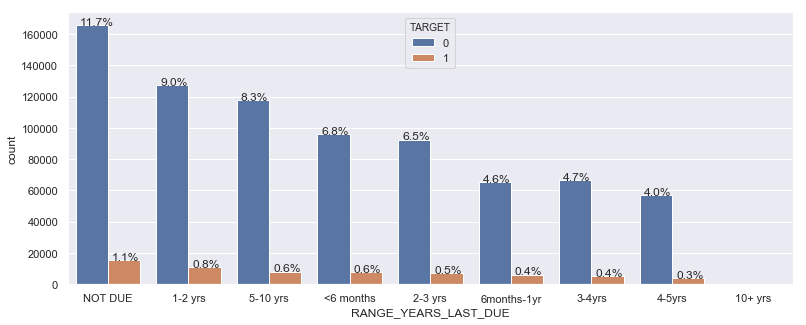

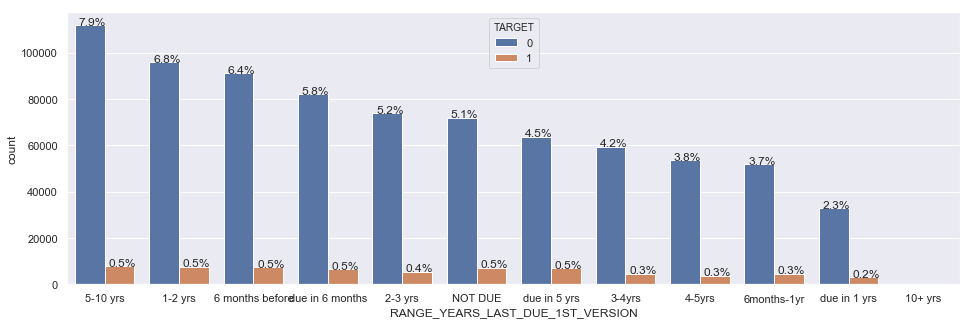

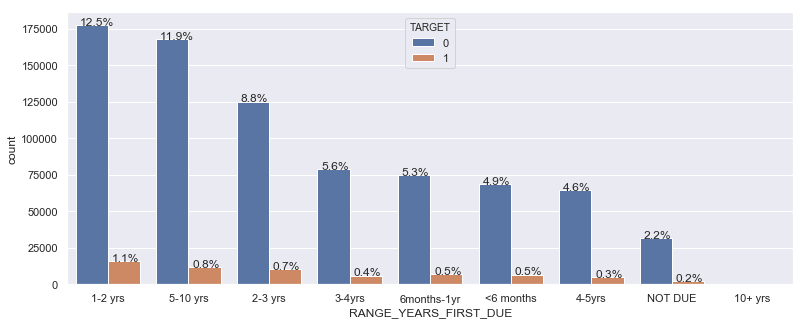

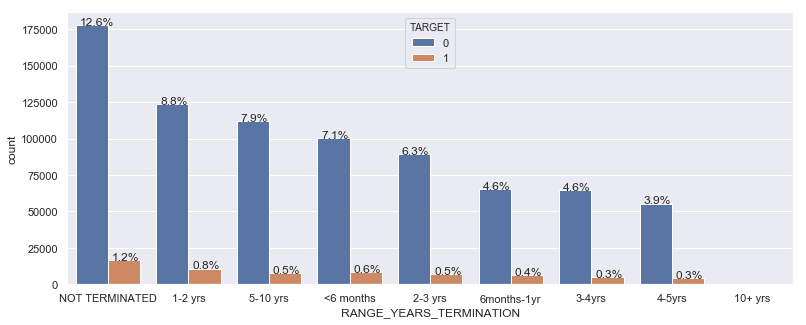

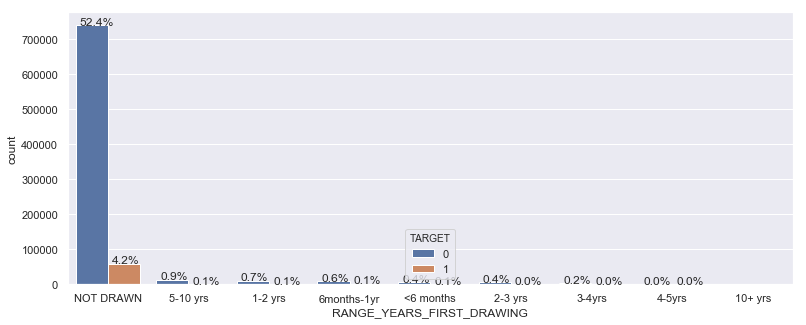

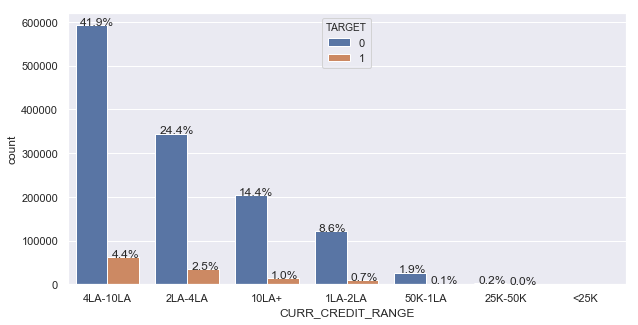

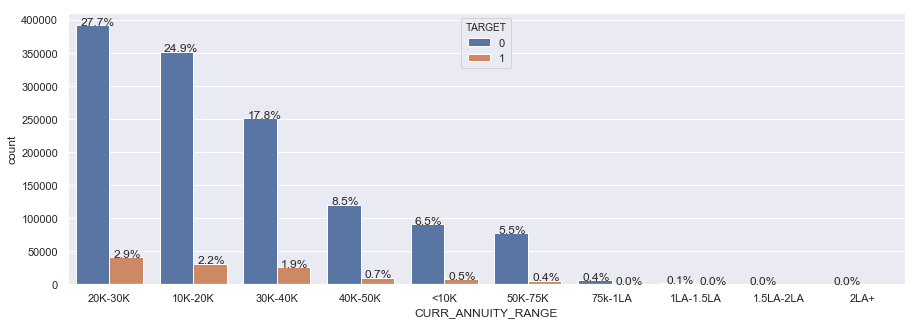

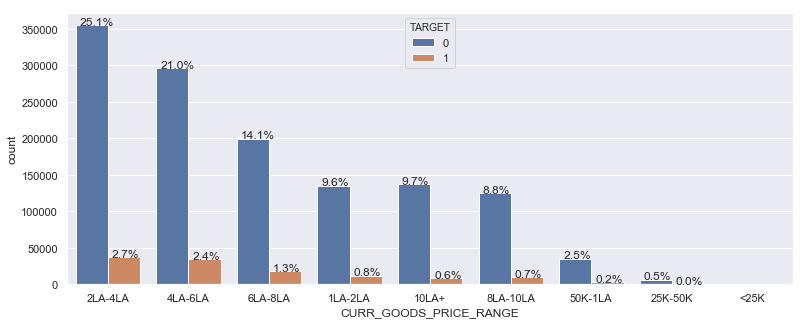

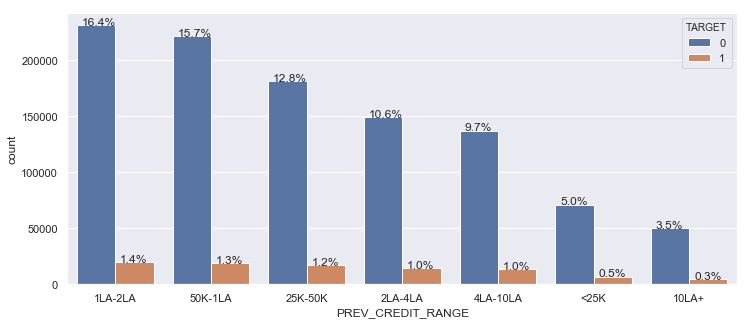

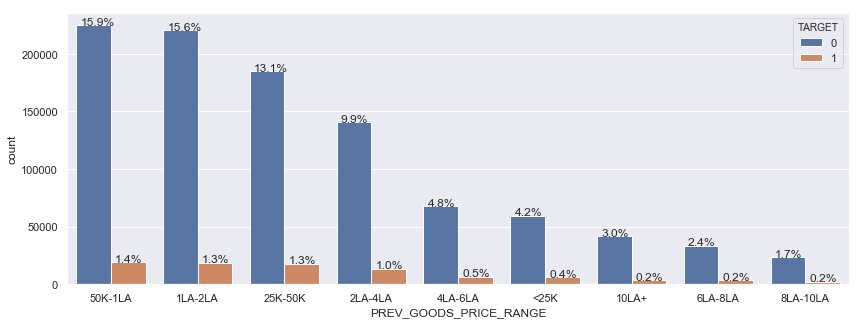

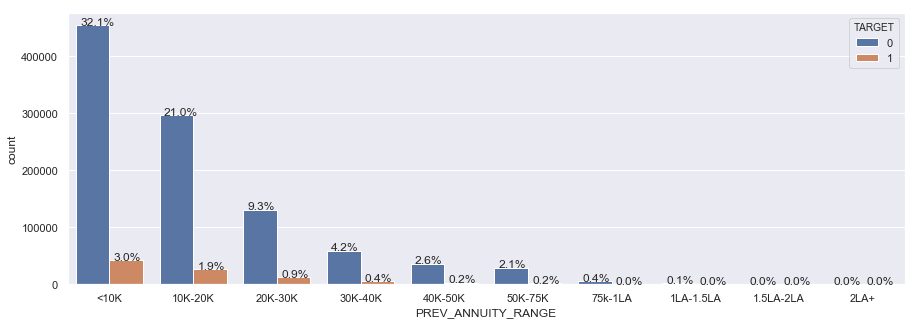

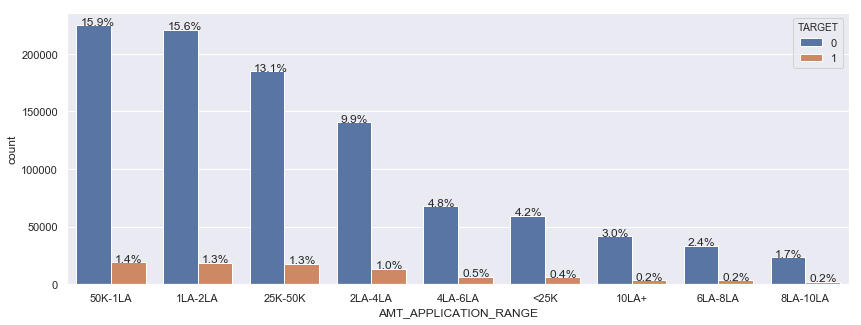

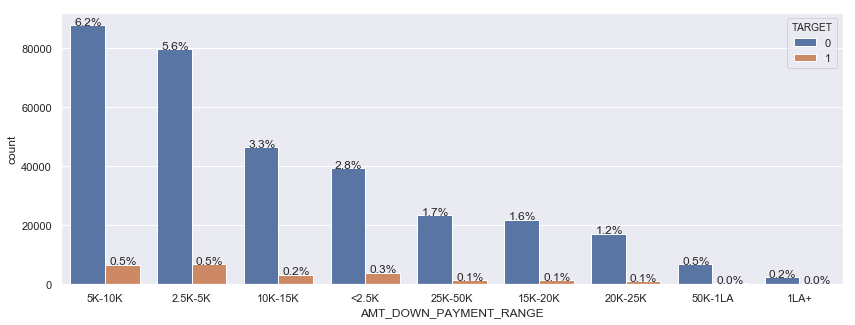

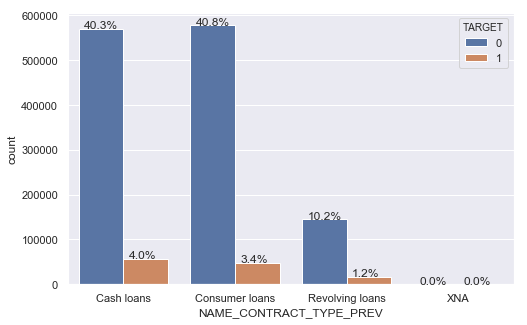

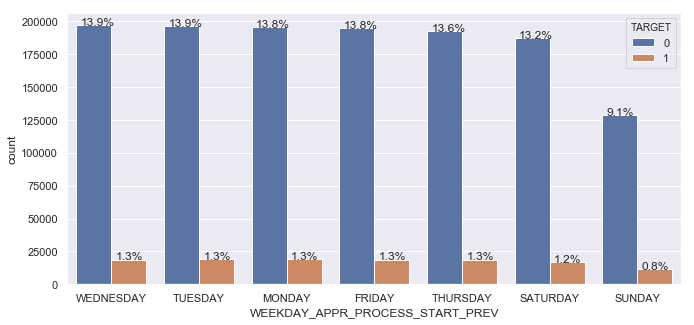

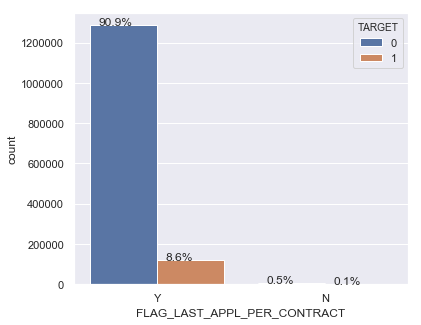

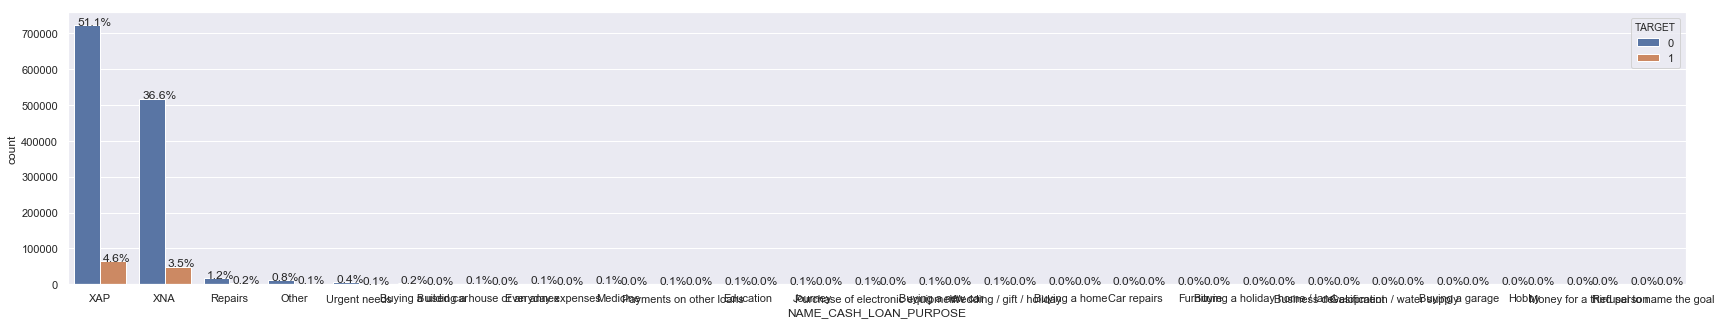

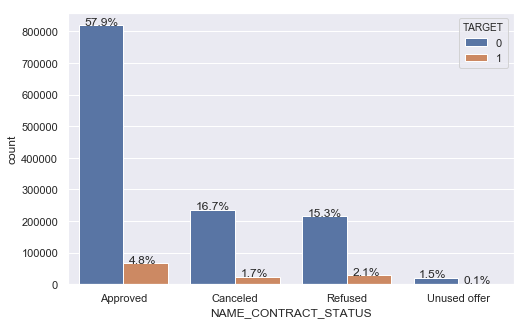

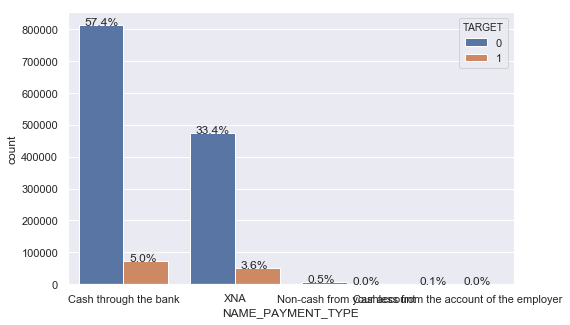

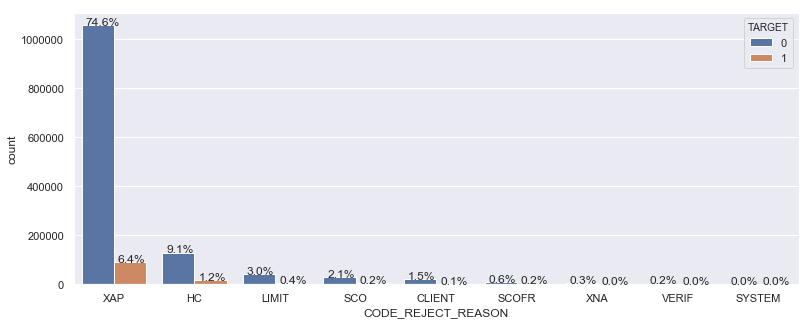

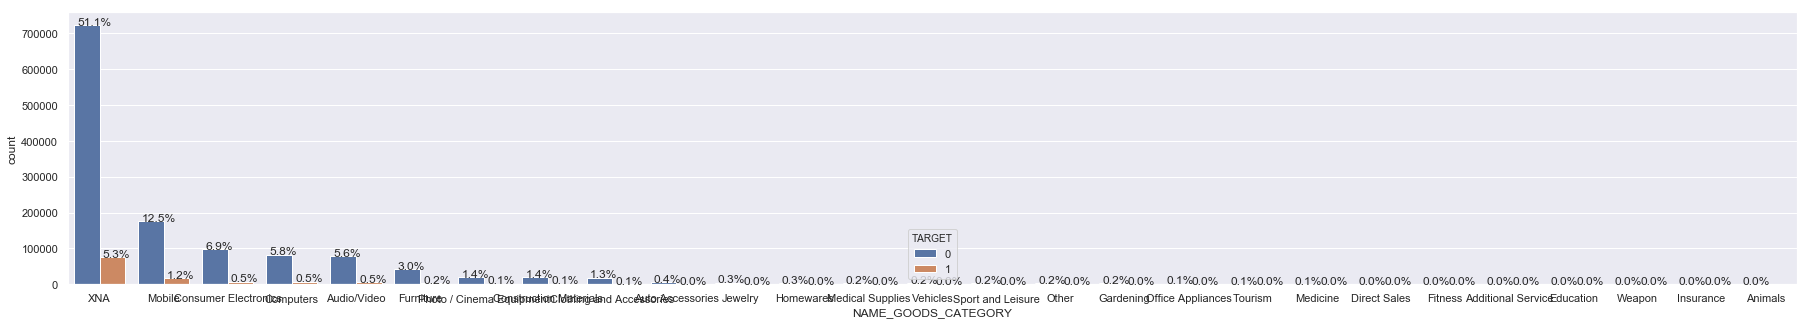

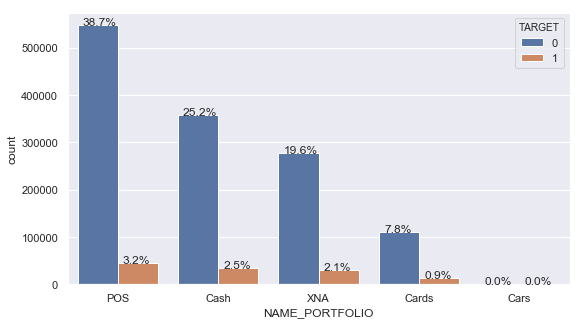

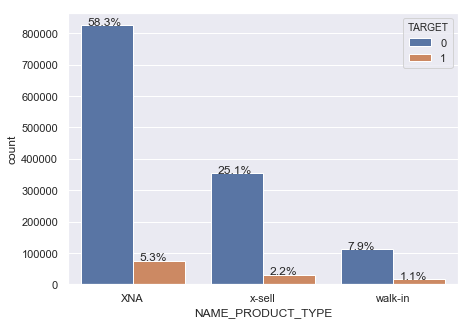

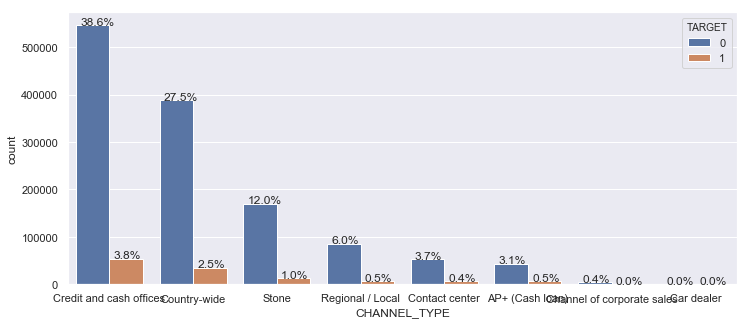

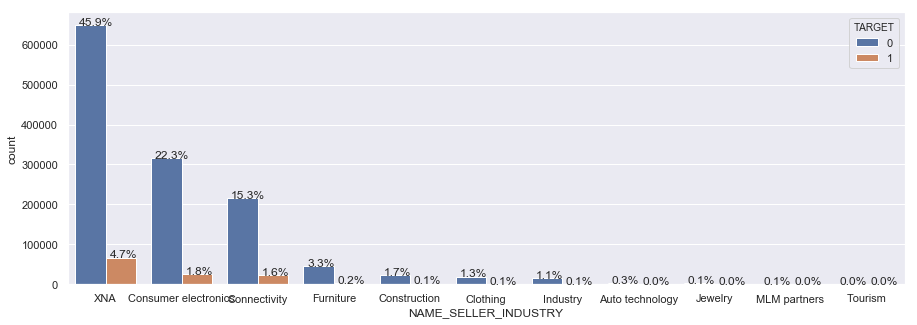

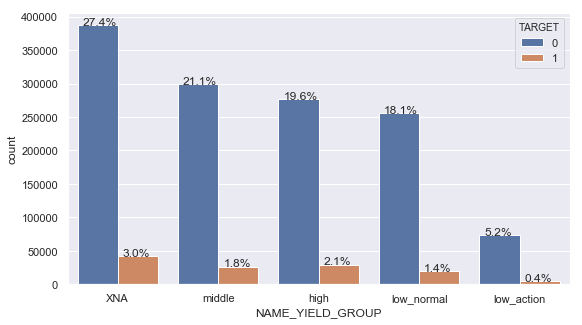

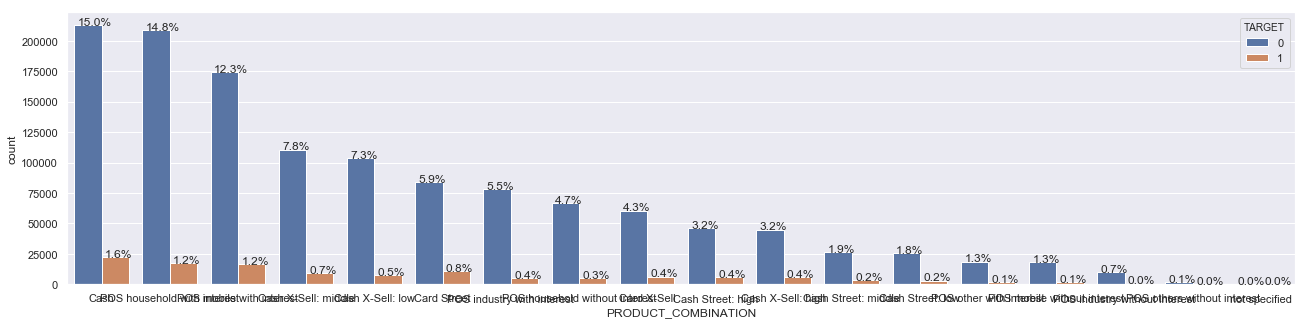

In [108]:
for item in loan_variables:
           univariate(df=combined_df,col=item,vartype=1,hue='TARGET')

#### CONTINUOUS VARIABLE ANALYSIS

In [109]:
combined_df[combined_df['AMT_CREDIT_PREV'].isnull()]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_CURR CODE_GENDER FLAG_OWN_CAR  \
1342536      438387       1              Cash loans           F            N   

        FLAG_OWN_REALTY CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_CURR  \
1342536               Y            0        90000.0000      536917.5000   

         AMT_ANNUITY_CURR  AMT_GOODS_PRICE_CURR NAME_TYPE_SUITE_CURR  \
1342536        22702.5000           463500.0000        Unaccompanied   

        NAME_INCOME_TYPE            NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  \
1342536        Pensioner  Secondary / secondary special            Married   

         NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  OWN_CAR_AGE  \
1342536  House / apartment                      0.0152          nan   

        FLAG_MOBIL FLAG_EMP_PHONE FLAG_WORK_PHONE FLAG_CONT_MOBILE FLAG_PHONE  \
1342536          1              0               0                1          1   

        FLAG_EMAIL OCCUPATION_TYPE CNT_FAM_MEMBERS REGION_RATING_CLIENT  \
1342536          0          Others          2.0000                    2   

        REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START_CURR  \
1342536                           2                        THURSDAY   

         HOUR_APPR_PROCESS_START_CURR REG_REGION_NOT_LIVE_REGION  \
1342536                            11                          0   

        REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION  \
1342536                          0                           0   

        REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY  \
1342536                      0                      0                       0   

        ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  \
1342536               XNA           nan        0.3462        0.5209   

         APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  \
1342536          0.0825               nan                       0.9771   

         YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  \
1342536           0.6872          0.0000         0.0000         0.1379   

         FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  ...  RATE_DOWN_PAYMENT  \
1342536         0.1667         0.2083        0.0000  ...                nan   

         NAME_CASH_LOAN_PURPOSE  NAME_CONTRACT_STATUS  NAME_PAYMENT_TYPE  \
1342536                     XAP              Approved                XNA   

         CODE_REJECT_REASON  NAME_TYPE_SUITE_PREV  NAME_CLIENT_TYPE  \
1342536                 XAP         not specified          Repeater   

         NAME_GOODS_CATEGORY  NAME_PORTFOLIO  NAME_PRODUCT_TYPE  CHANNEL_TYPE  \
1342536                  XNA           Cards            walk-in  Country-wide   

         SELLERPLACE_AREA  NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
1342536                20          Connectivity       0.0000   

         NAME_YIELD_GROUP  PRODUCT_COMBINATION  NFLAG_INSURED_ON_APPROVAL  \
1342536               XNA          Card Street                        nan   

         CLIENT_AGE  YEARS_EMPLOYED  YEARS_TERMINATION  YEARS_FIRST_DUE  \
1342536     51.4356      -1000.6658                nan              nan   

         YEARS_LAST_DUE  YEARS_LAST_DUE_1ST_VERSION  YEARS_REGISTRATION  \
1342536             nan                         nan              2.5342   

         YEARS_DECISION  YEARS_FIRST_DRAWING  YEARS_ID_PUBLISH  \
1342536          1.6658                  nan            4.3014   

         YEARS_LAST_PHONE_CHANGE  RANGE_YEARS_TERMINATION  \
1342536                   3.4027                      NaN   

         RANGE_YEARS_LAST_DUE_1ST_VERSION  RANGE_YEARS_LAST_DUE  \
1342536                               NaN                   NaN   

         RANGE_YEARS_FIRST_DUE RANGE_YEARS_DECISION RANGE_YEARS_EMPLOYED  \
1342536                    NaN              1-2 yrs         NOT employed   

         RANGE_YEARS_FIRST_DRAWING RANGE_YEARS_ID_PUBLISH  \
1342536                        NaN                 4-5yrs   

        RANGE_YEARS_REGISTRATION  RANGE_YEARS_LAST

In [110]:
combined_df['AMT_CREDIT_PREV'].fillna(0,inplace=True)


In [111]:
print(numeric_df.columns)

Index(['SK_ID_CURR', 'TARGET', 'AMT_INCOME_TOTAL', 'AMT_CREDIT_CURR',
       'AMT_ANNUITY_CURR', 'AMT_GOODS_PRICE_CURR',
       'REGION_POPULATION_RELATIVE', 'OWN_CAR_AGE',
       'HOUR_APPR_PROCESS_START_CURR', 'EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI

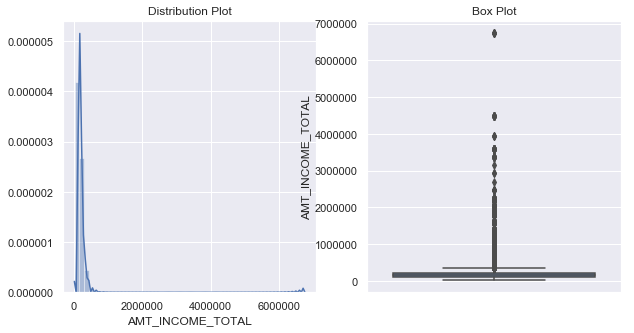

In [112]:
univariate(df=combined_df,col='AMT_INCOME_TOTAL',vartype=0)

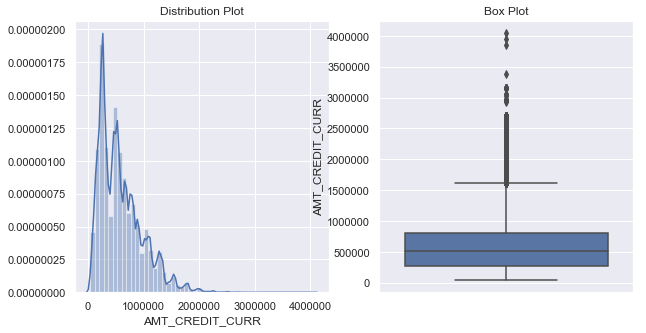

In [113]:
univariate(df=combined_df,col='AMT_CREDIT_CURR',vartype=0)

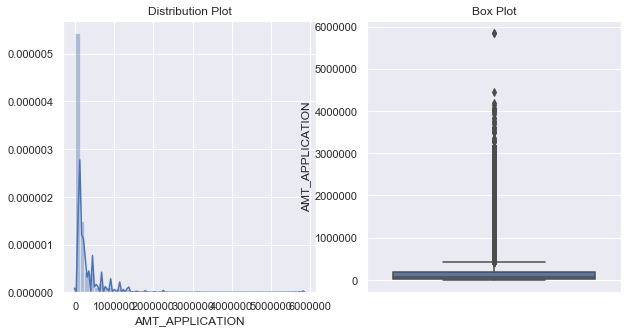

In [114]:
univariate(df=combined_df,col='AMT_APPLICATION',vartype=0)

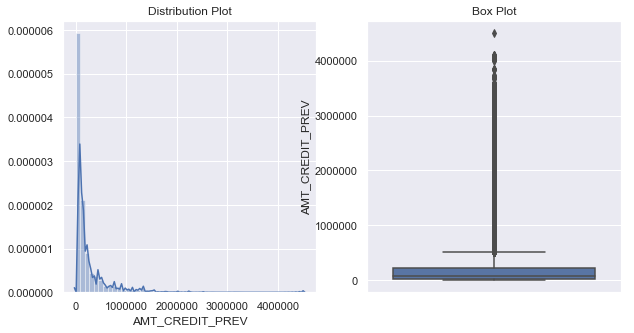

In [115]:
univariate(df=combined_df,col='AMT_CREDIT_PREV',vartype=0)

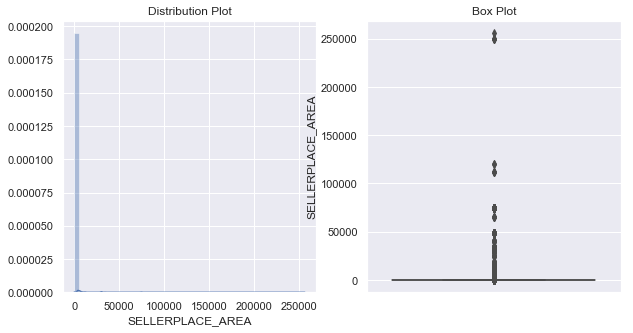

In [116]:
univariate(df=combined_df,col='SELLERPLACE_AREA',vartype=0)

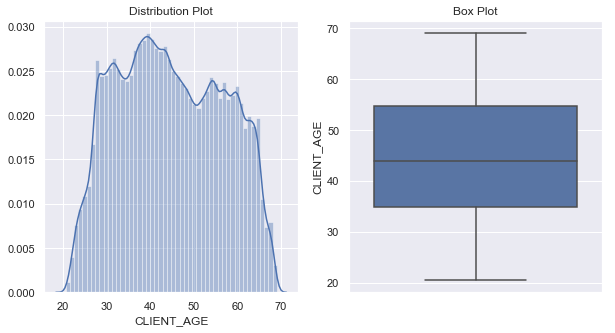

In [117]:
univariate(df=combined_df,col='CLIENT_AGE',vartype=0)

### BIVARIANT ANALYSIS

###### Purpose of Loan vs Loan Amount Target wise

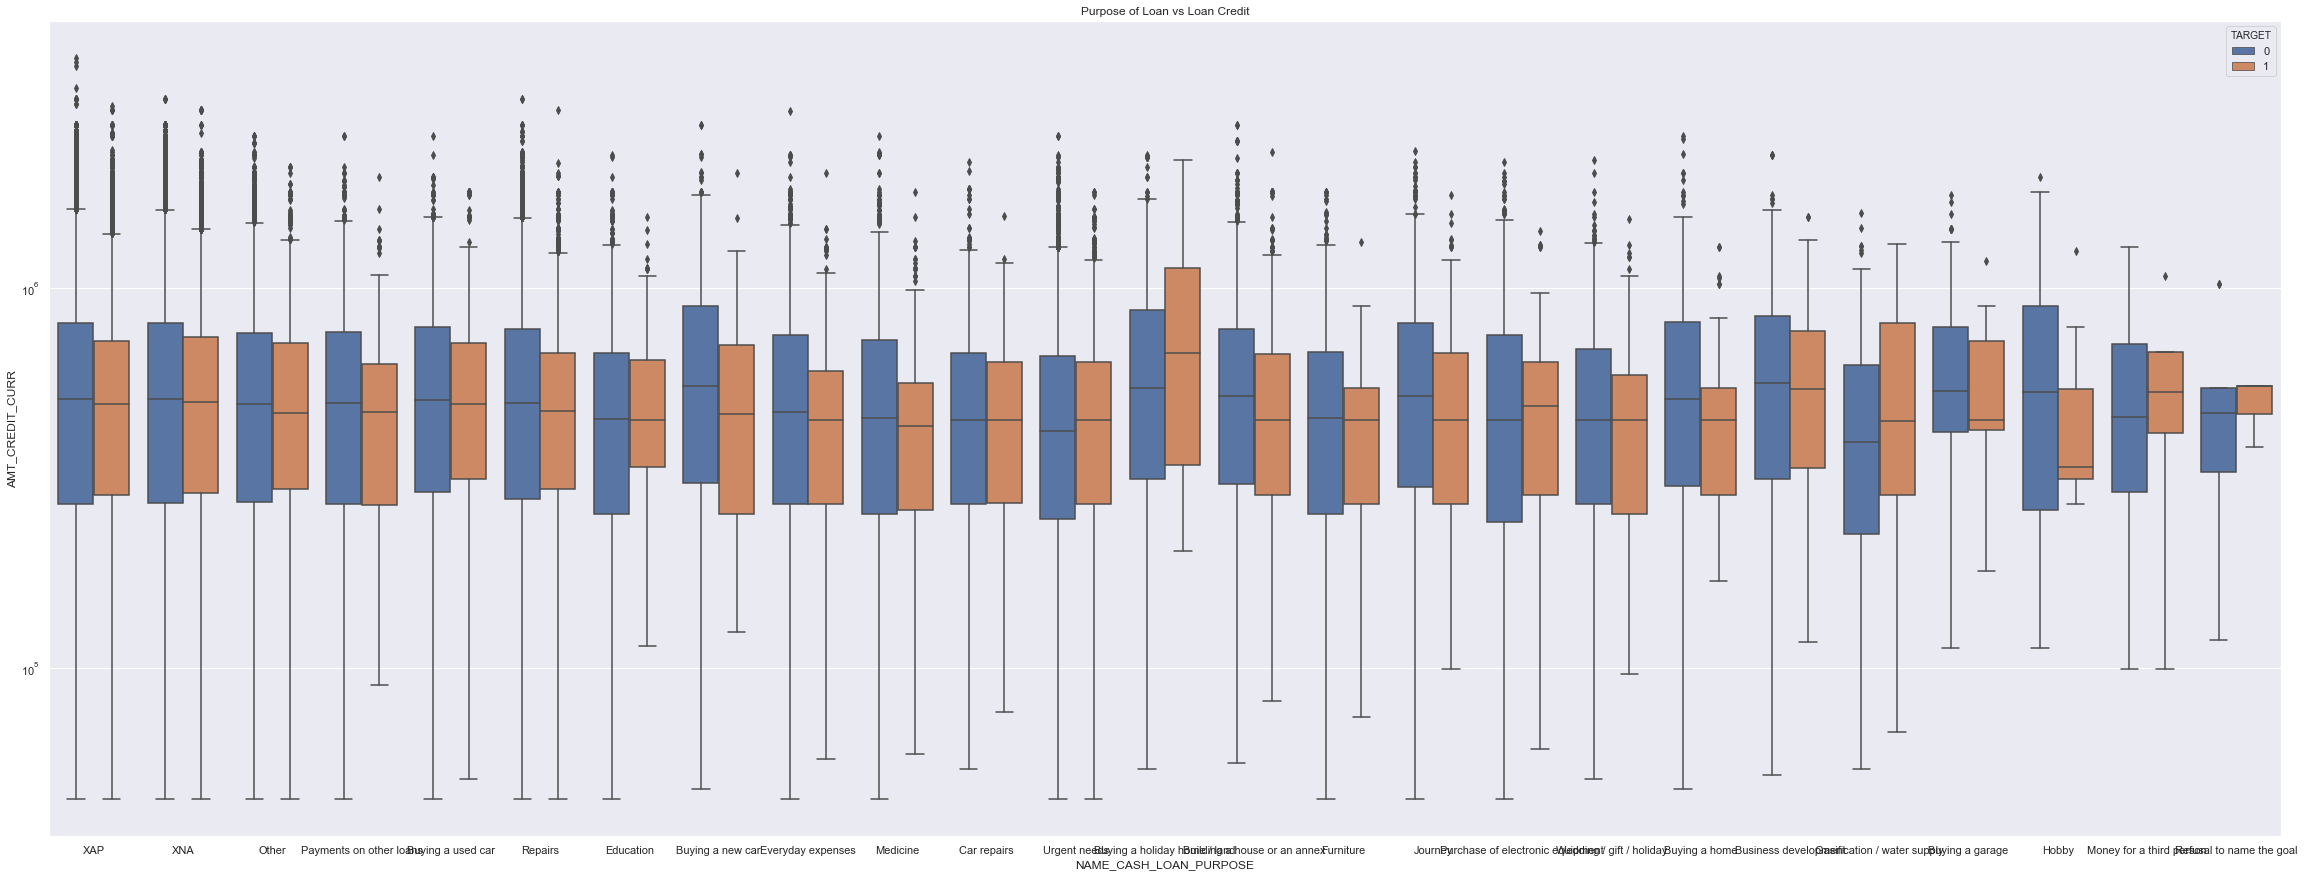

In [118]:
plt.figure(figsize=(40,15))
sns.boxplot(data =combined_df, x='NAME_CASH_LOAN_PURPOSE', y='AMT_CREDIT_CURR', hue ='TARGET')
plt.title('Purpose of Loan vs Loan Credit')
plt.yscale('log')
plt.show()


##### Defaulters are more in Loan Credited for the purpose: Buying a Holiday Home

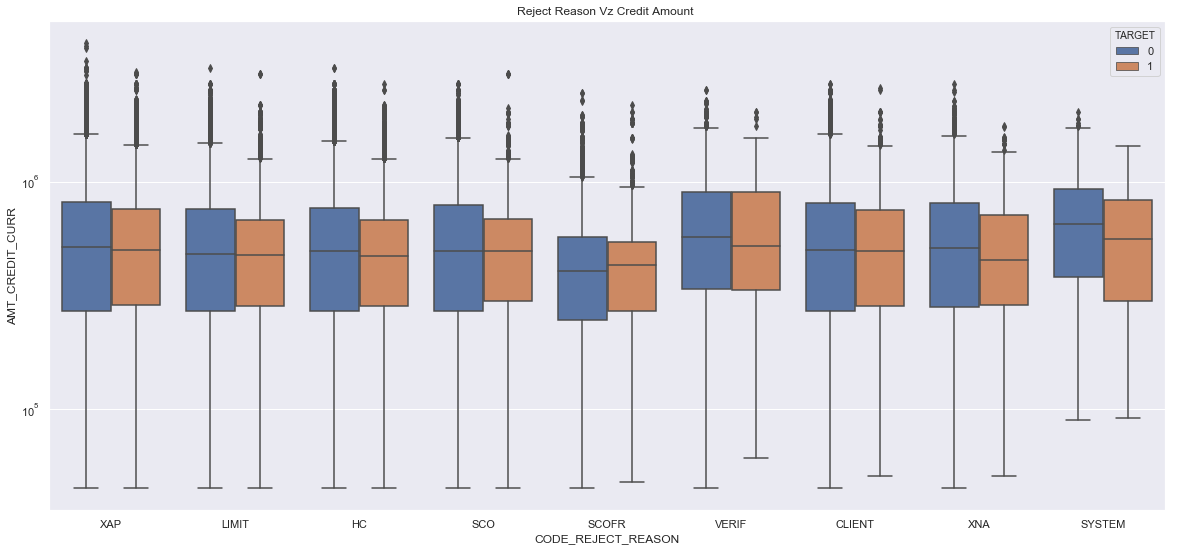

In [119]:
plt.figure(figsize=(20,9))
sns.boxplot(data =combined_df, x='CODE_REJECT_REASON', y='AMT_CREDIT_CURR', hue ='TARGET')
plt.title('Reject Reason Vz Credit Amount ')
plt.yscale('log')
plt.show()


##### AGE type vz Income Amount 

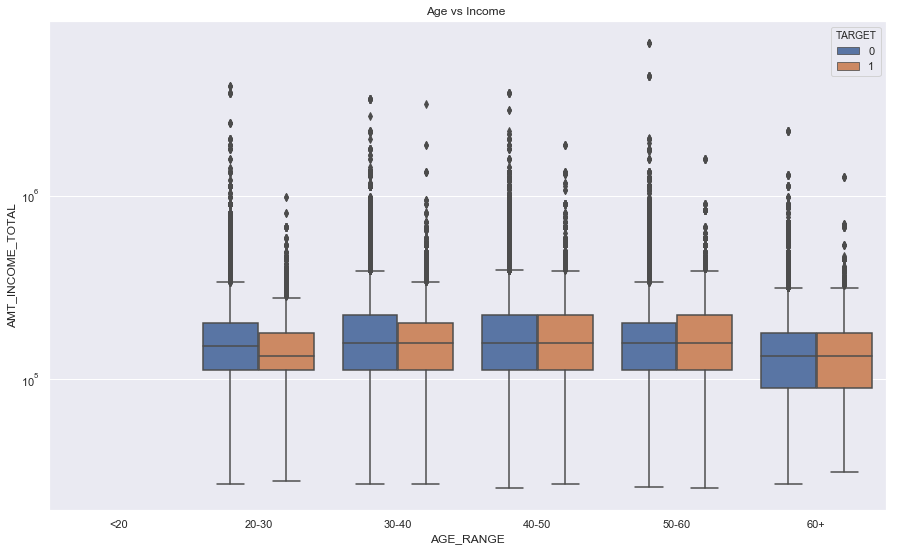

In [120]:
plt.figure(figsize=(15,9))
sns.boxplot(data =combined_df, x='AGE_RANGE', y='AMT_INCOME_TOTAL', hue ='TARGET')
plt.yscale('log')
plt.title('Age vs Income ')
plt.show()


##### Occupation type vz Income Amount 

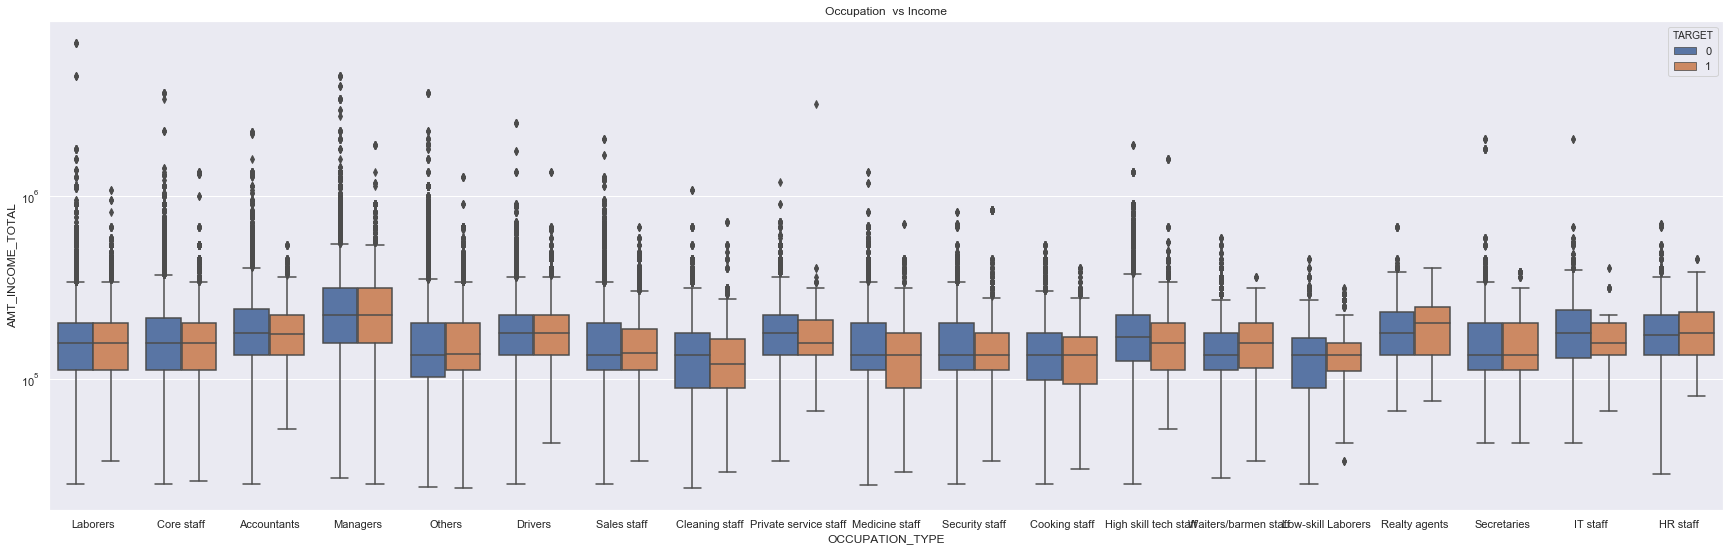

In [121]:
plt.figure(figsize=(30,9))
sns.boxplot(data =combined_df, x='OCCUPATION_TYPE', y='AMT_INCOME_TOTAL', hue ='TARGET')
plt.title('Occupation  vs Income')
plt.yscale('log')
plt.show()


##### Occupation type vz Loan Amount 

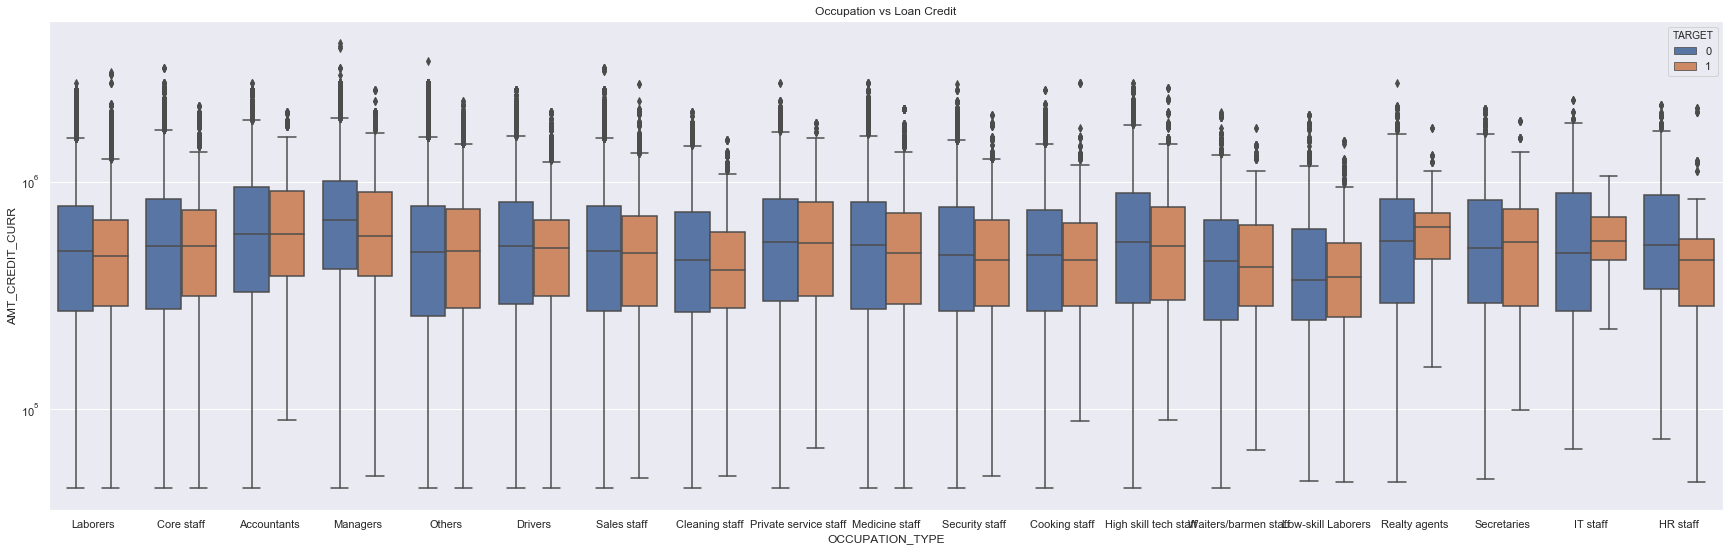

In [122]:
plt.figure(figsize=(30,9))
sns.boxplot(data =combined_df, x='OCCUPATION_TYPE', y='AMT_CREDIT_CURR', hue ='TARGET')
plt.title('Occupation vs Loan Credit')
plt.yscale('log')
plt.show()


###### Defaulers are very less in IT SECTOR

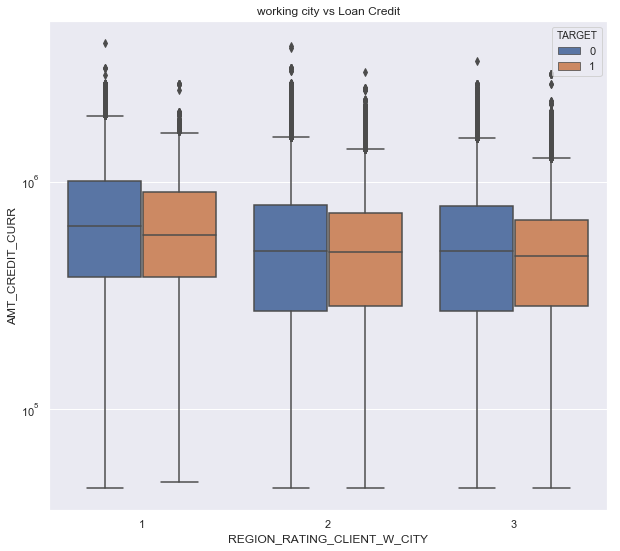

In [123]:

plt.figure(figsize=(10,9))
sns.boxplot(data =combined_df, x='REGION_RATING_CLIENT_W_CITY', y='AMT_CREDIT_CURR', hue ='TARGET')
plt.title('working city vs Loan Credit')
plt.yscale('log')
plt.show()



###### REGION_RATING_CLIENT_W_CITY with rating 1 have more chances of defaulters

### CORRELATION MATRIX ANALYSIS

#### the top 10 correlation for the Client with payment difficulties and all other cases 

In [124]:
#sEGRAGATING DATAFRAMDE INTO REPAYERS AND DEFAULTERS
repayers_df=combined_df[combined_df['TARGET']==0]
defaulters_df=combined_df[combined_df['TARGET']==1]

In [125]:
corr_variables=['AMT_INCOME_TOTAL', 'AMT_CREDIT_CURR','AMT_ANNUITY_CURR', 'AMT_GOODS_PRICE_CURR', 
                  'AMT_ANNUITY_PREV', 'AMT_APPLICATION', 'AMT_CREDIT_PREV', 'AMT_DOWN_PAYMENT',
                  'AMT_GOODS_PRICE_PREV', 'TOTALAREA_MODE','RATE_DOWN_PAYMENT','REGION_POPULATION_RELATIVE','YEARS_EMPLOYED','CLIENT_AGE','EXT_SOURCE_1', 'EXT_SOURCE_2',
       'EXT_SOURCE_3','SELLERPLACE_AREA', 'CNT_PAYMENT',   'YEARS_FIRST_DRAWING', 'YEARS_ID_PUBLISH', 'YEARS_LAST_PHONE_CHANGE',
      'YEARS_TERMINATION', 'YEARS_FIRST_DUE',
       'YEARS_LAST_DUE', 'YEARS_LAST_DUE_1ST_VERSION', 'YEARS_REGISTRATION',
       'YEARS_DECISION', 'CREDIT_TO_INCOME', 'ANNUITY_T0_INCOME' ]


###### REPAYER VARIABLES

In [126]:
repayers_attrib=repayers_df[corr_variables]

In [127]:
repayers_correlation=repayers_attrib.corr()
repayers_correlation

AMT_INCOME_TOTAL  AMT_CREDIT_CURR  \
AMT_INCOME_TOTAL                      1.0000           0.3524   
AMT_CREDIT_CURR                       0.3524           1.0000   
AMT_ANNUITY_CURR                      0.4314           0.7595   
AMT_GOODS_PRICE_CURR                  0.3557           0.9866   
AMT_ANNUITY_PREV                      0.2427           0.1539   
AMT_APPLICATION                       0.1516           0.1187   
AMT_CREDIT_PREV                       0.1502           0.1167   
AMT_DOWN_PAYMENT                      0.0840           0.0522   
AMT_GOODS_PRICE_PREV                  0.1925           0.1382   
TOTALAREA_MODE                        0.1158           0.0596   
RATE_DOWN_PAYMENT                     0.0374           0.0347   
REGION_POPULATION_RELATIVE            0.1655           0.0861   
YEARS_EMPLOYED                        0.1443           0.0673   
CLIENT_AGE                           -0.0586           0.0397   
EXT_SOURCE_1                          0.0750           0.1580   
EXT_SOURCE_2                          0.1407           0.1153   
EXT_SOURCE_3                         -0.0859           0.0329   
SELLERPLACE_AREA                      0.0088           0.0172   
CNT_PAYMENT                           0.0434           0.0374   
YEARS_FIRST_DRAWING                   0.0214           0.0099   
YEARS_ID_PUBLISH                     -0.0347          -0.0139   
YEARS_LAST_PHONE_CHANGE               0.0568           0.0842   
YEARS_TERMINATION                    -0.0032           0.0510   
YEARS_FIRST_DUE                       0.0018          -0.0017   
YEARS_LAST_DUE                       -0.0025           0.0590   
YEARS_LAST_DUE_1ST_VERSION           -0.0179          -0.0123   
YEARS_REGISTRATION                   -0.0627          -0.0131   
YEARS_DECISION                       -0.0107           0.0558   
CREDIT_TO_INCOME                     -0.2575           0.6718   
ANNUITY_T0_INCOME                    -0.3602           0.3942   

                            AMT_ANNUITY_CURR  AMT_GOODS_PRICE_CURR  \
AMT_INCOME_TOTAL                      0.4314                0.3557   
AMT_CREDIT_CURR                       0.7595                0.9866   
AMT_ANNUITY_CURR                      1.0000                0.7637   
AMT_GOODS_PRICE_CURR                  0.7637                1.0000   
AMT_ANNUITY_PREV                      0.2052                0.1558   
AMT_APPLICATION                       0.1132                0.1203   
AMT_CREDIT_PREV                       0.1088                0.1169   
AMT_DOWN_PAYMENT                      0.0687                0.0533   
AMT_GOODS_PRICE_PREV                  0.1358                0.1391   
TOTALAREA_MODE                        0.0815                0.0623   
RATE_DOWN_PAYMENT                     0.0368                0.0353   
REGION_POPULATION_RELATIVE            0.1051                0.0880   
YEARS_EMPLOYED                        0.1117                0.0656   
CLIENT_AGE                           -0.0318                0.0370   
EXT_SOURCE_1                          0.1026                0.1627   
EXT_SOURCE_2                          0.1095                0.1211   
EXT_SOURCE_3                          0.0120                0.0354   
SELLERPLACE_AREA                      0.0200                0.0207   
CNT_PAYMENT                          -0.0063                0.0356   
YEARS_FIRST_DRAWING                   0.0013                0.0042   
YEARS_ID_PUBLISH                     -0.0325               -0.0116   
YEARS_LAST_PHONE_CHANGE               0.0632                0.0875   
YEARS_TERMINATION                     0.0575                0.0559   
YEARS_FIRST_DUE                      -0.0011               -0.0000   
YEARS_LAST_DUE                        0.0621                0.0632   
YEARS_LAST_DUE_1ST_VERSION           -0.0041               -0.0063   
YEARS_REGISTRATION                   -0.0466               -0.0159   
YEARS_DECISION                        0.0323        

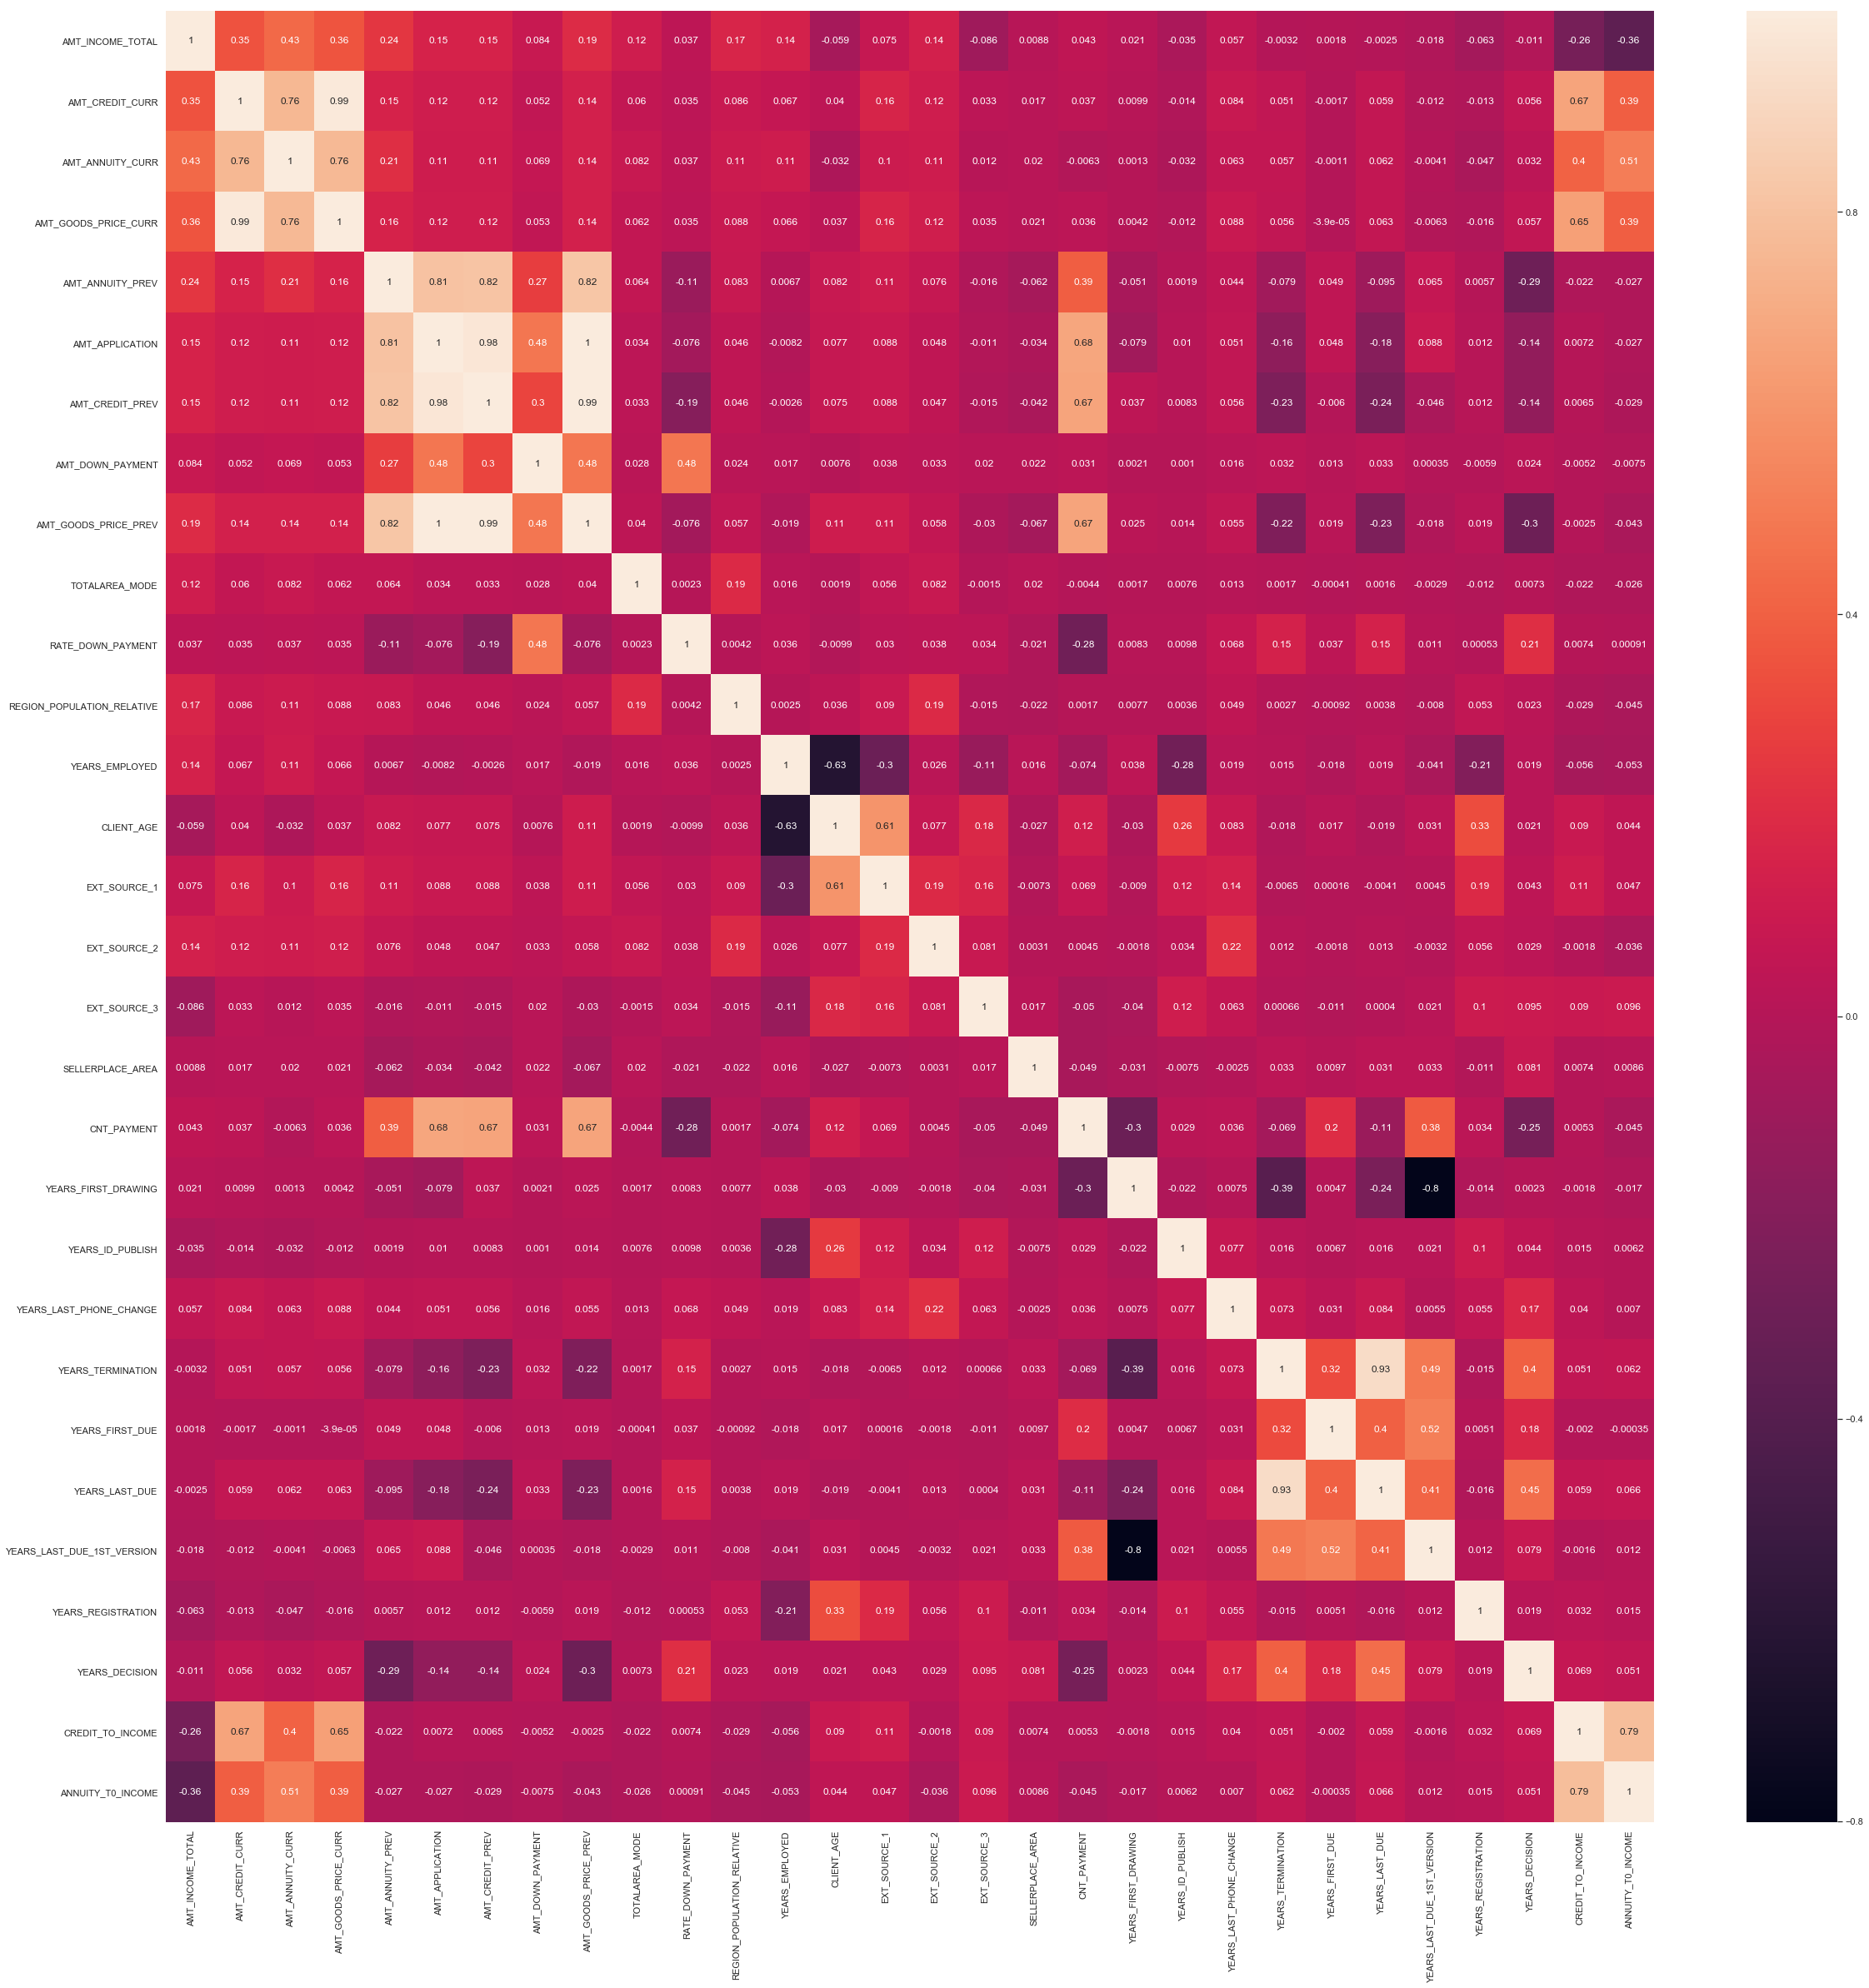

In [128]:
f, ax = plt.subplots(figsize=(40,40))
sns.heatmap(repayers_correlation, 
            xticklabels=repayers_correlation.columns.values,
            yticklabels=repayers_correlation.columns.values,annot= True)
plt.show()


In [129]:
defaulters_attrib=defaulters_df[corr_variables]

In [130]:
defaulters_correlation=defaulters_attrib.corr()
defaulters_correlation

AMT_INCOME_TOTAL  AMT_CREDIT_CURR  \
AMT_INCOME_TOTAL                      1.0000           0.2918   
AMT_CREDIT_CURR                       0.2918           1.0000   
AMT_ANNUITY_CURR                      0.3778           0.7457   
AMT_GOODS_PRICE_CURR                  0.2916           0.9829   
AMT_ANNUITY_PREV                      0.2341           0.1371   
AMT_APPLICATION                       0.1437           0.1196   
AMT_CREDIT_PREV                       0.1428           0.1181   
AMT_DOWN_PAYMENT                      0.0536           0.0386   
AMT_GOODS_PRICE_PREV                  0.1846           0.1337   
TOTALAREA_MODE                        0.0845           0.0655   
RATE_DOWN_PAYMENT                     0.0386           0.0475   
REGION_POPULATION_RELATIVE            0.1178           0.0667   
YEARS_EMPLOYED                        0.0948          -0.0077   
CLIENT_AGE                            0.0221           0.1253   
EXT_SOURCE_1                          0.0716           0.1814   
EXT_SOURCE_2                          0.1394           0.1030   
EXT_SOURCE_3                         -0.0613           0.0837   
SELLERPLACE_AREA                      0.0074           0.0150   
CNT_PAYMENT                           0.0485           0.0496   
YEARS_FIRST_DRAWING                   0.0073          -0.0147   
YEARS_ID_PUBLISH                     -0.0033           0.0313   
YEARS_LAST_PHONE_CHANGE               0.0760           0.1106   
YEARS_TERMINATION                     0.0207           0.0809   
YEARS_FIRST_DUE                       0.0025          -0.0005   
YEARS_LAST_DUE                        0.0199           0.0861   
YEARS_LAST_DUE_1ST_VERSION           -0.0083           0.0074   
YEARS_REGISTRATION                   -0.0261           0.0235   
YEARS_DECISION                        0.0131           0.1033   
CREDIT_TO_INCOME                     -0.3105           0.6484   
ANNUITY_T0_INCOME                    -0.4245           0.3956   

                            AMT_ANNUITY_CURR  AMT_GOODS_PRICE_CURR  \
AMT_INCOME_TOTAL                      0.3778                0.2916   
AMT_CREDIT_CURR                       0.7457                0.9829   
AMT_ANNUITY_CURR                      1.0000                0.7456   
AMT_GOODS_PRICE_CURR                  0.7456                1.0000   
AMT_ANNUITY_PREV                      0.1646                0.1405   
AMT_APPLICATION                       0.0977                0.1250   
AMT_CREDIT_PREV                       0.0942                0.1219   
AMT_DOWN_PAYMENT                      0.0486                0.0406   
AMT_GOODS_PRICE_PREV                  0.1144                0.1386   
TOTALAREA_MODE                        0.0804                0.0700   
RATE_DOWN_PAYMENT                     0.0421                0.0473   
REGION_POPULATION_RELATIVE            0.0694                0.0736   
YEARS_EMPLOYED                        0.0849               -0.0150   
CLIENT_AGE                           -0.0027                0.1277   
EXT_SOURCE_1                          0.1057                0.1890   
EXT_SOURCE_2                          0.0970                0.1118   
EXT_SOURCE_3                          0.0354                0.0853   
SELLERPLACE_AREA                      0.0206                0.0182   
CNT_PAYMENT                           0.0057                0.0539   
YEARS_FIRST_DRAWING                  -0.0247               -0.0206   
YEARS_ID_PUBLISH                     -0.0077                0.0343   
YEARS_LAST_PHONE_CHANGE               0.0597                0.1164   
YEARS_TERMINATION                     0.0888                0.0851   
YEARS_FIRST_DUE                       0.0016                0.0020   
YEARS_LAST_DUE                        0.0921                0.0897   
YEARS_LAST_DUE_1ST_VERSION            0.0203                0.0138   
YEARS_REGISTRATION                   -0.0455                0.0249   
YEARS_DECISION                        0.0633        

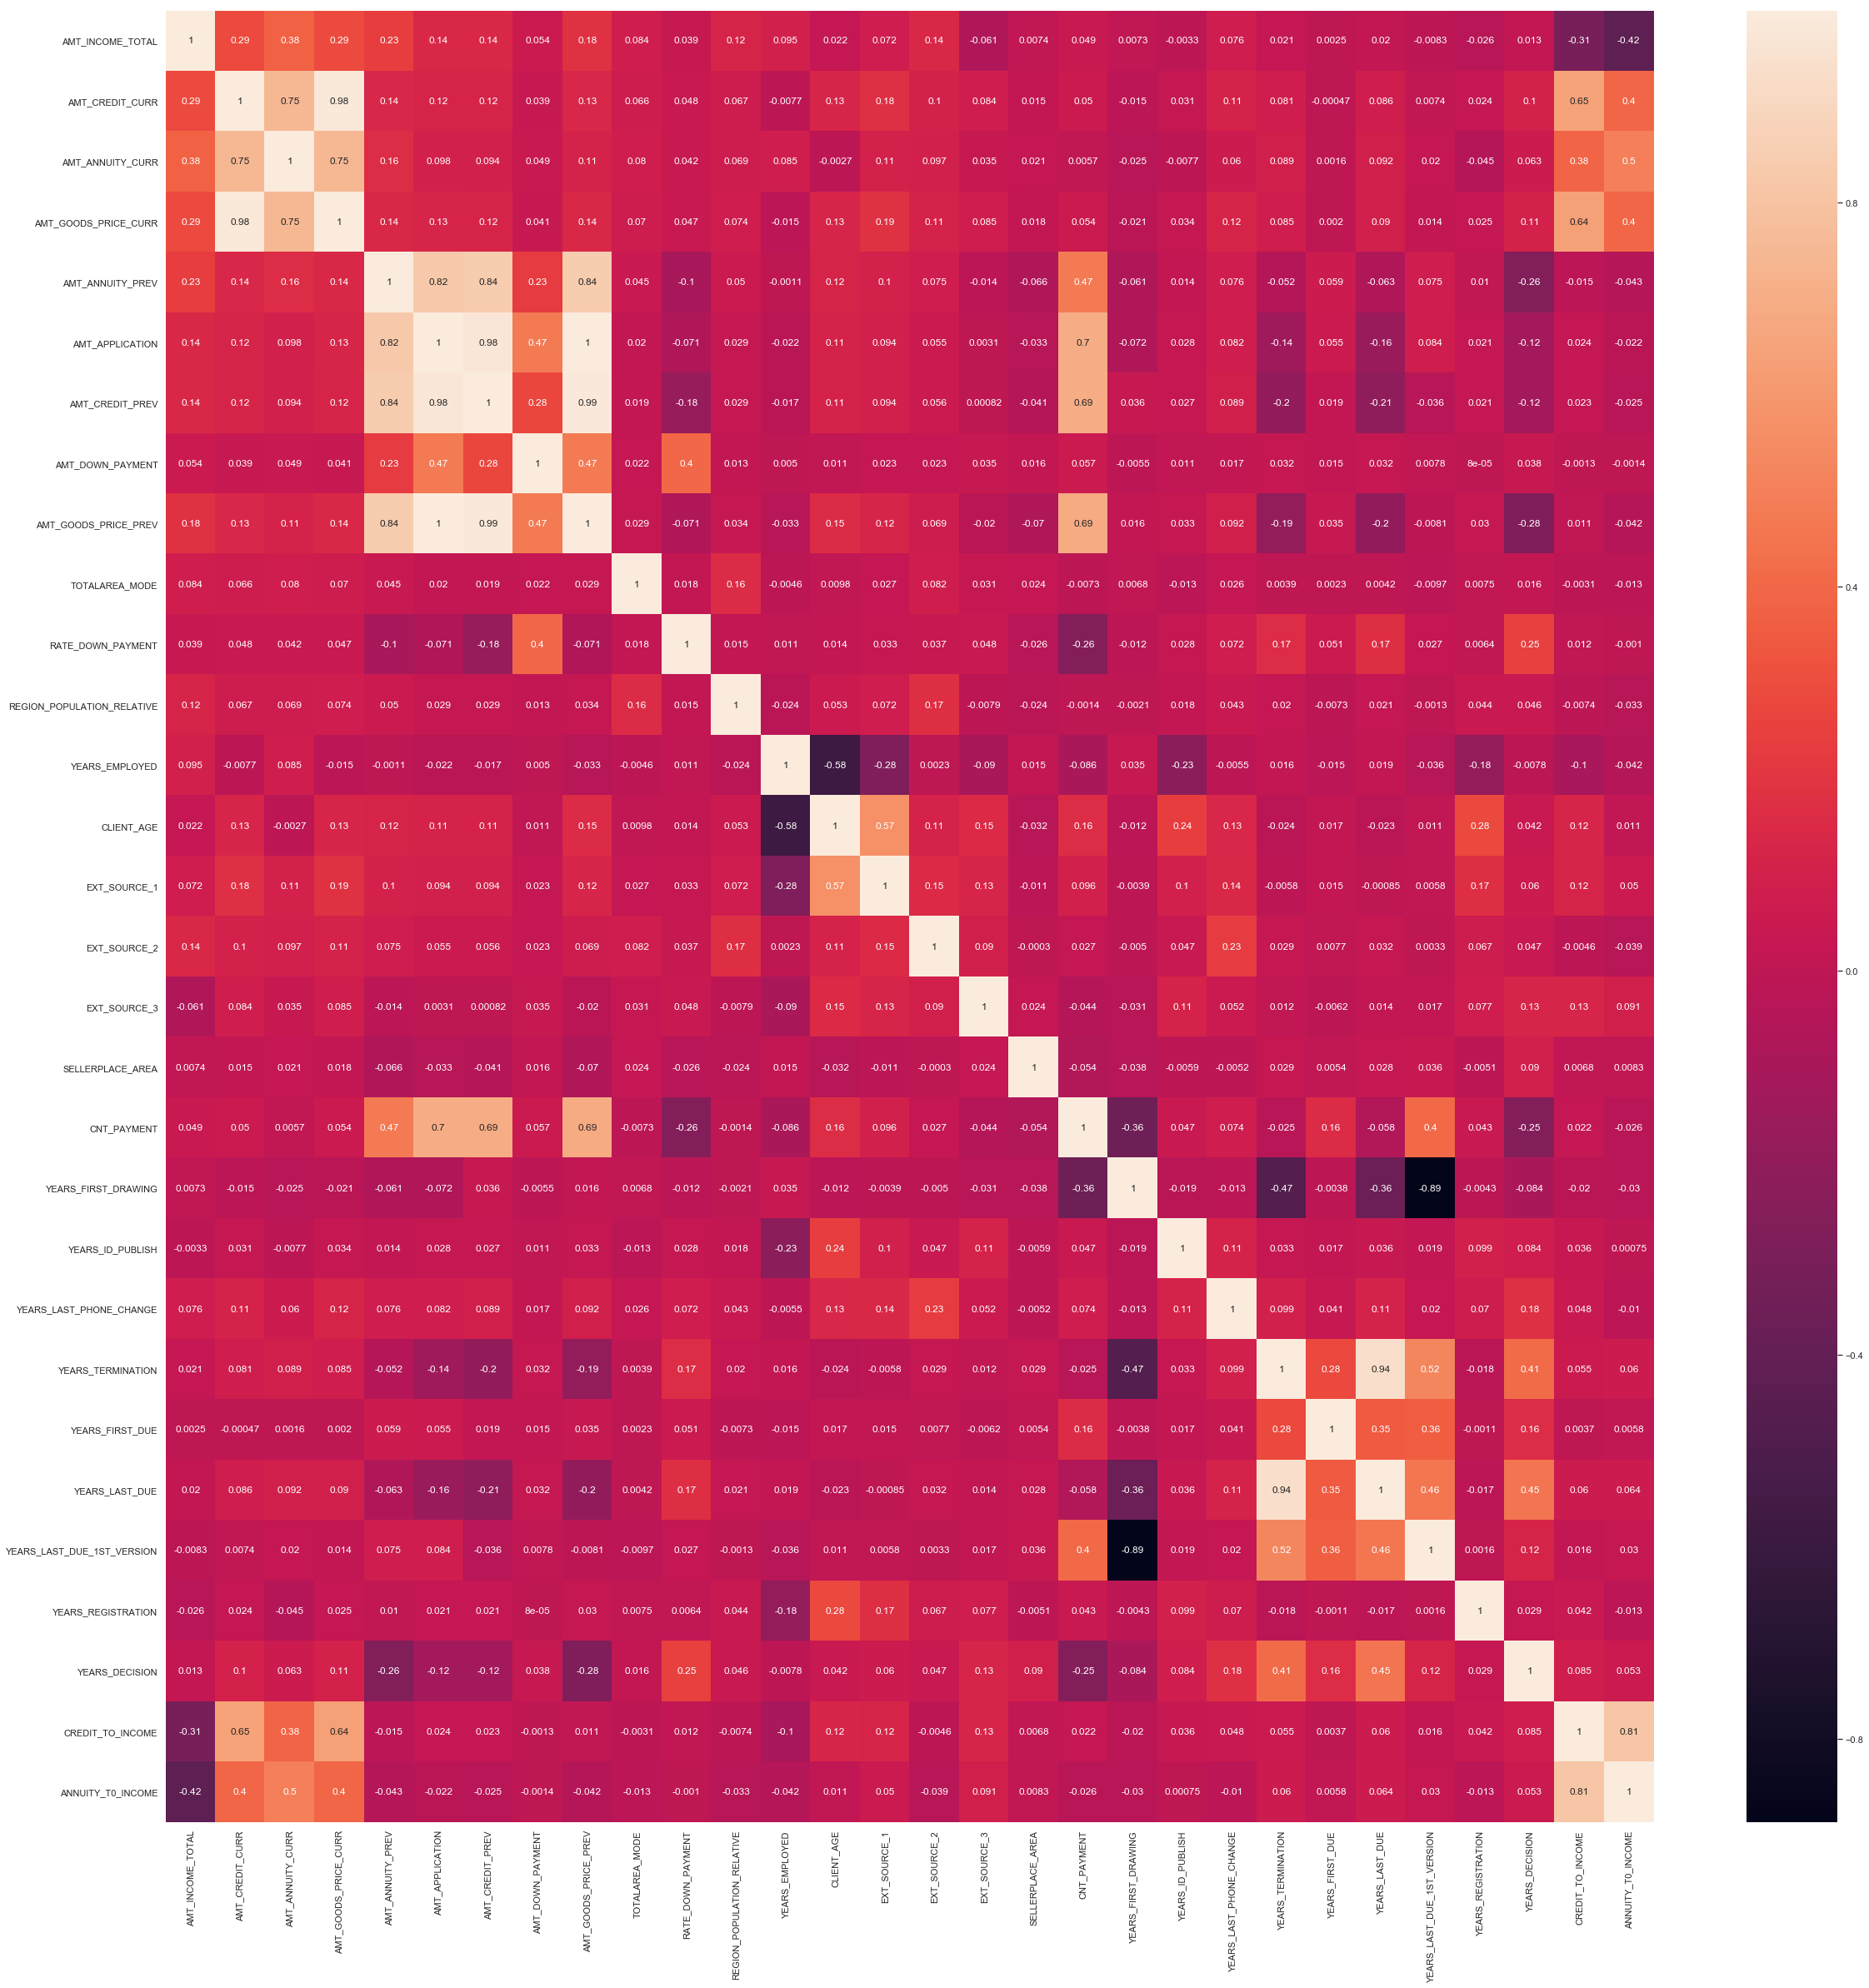

In [131]:
f, ax = plt.subplots(figsize=(40,40))
sns.heatmap(defaulters_correlation, 
            xticklabels=defaulters_correlation.columns.values,
            yticklabels=defaulters_correlation.columns.values,annot= True)
plt.show()


###### Function to extract top n correlation pairs

In [132]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [133]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(repayers_correlation, 15))

Top Absolute Correlations
AMT_CREDIT_CURR      AMT_GOODS_PRICE_CURR         0.9998
AMT_APPLICATION      AMT_GOODS_PRICE_PREV         0.9926
YEARS_TERMINATION    YEARS_LAST_DUE               0.9902
AMT_CREDIT_PREV      AMT_GOODS_PRICE_PREV         0.9902
AMT_APPLICATION      AMT_CREDIT_PREV              0.9890
AMT_ANNUITY_PREV     AMT_GOODS_PRICE_PREV         0.9640
                     AMT_CREDIT_PREV              0.9584
                     AMT_APPLICATION              0.9583
CREDIT_TO_INCOME     ANNUITY_T0_INCOME            0.9449
AMT_ANNUITY_CURR     AMT_GOODS_PRICE_CURR         0.9440
AMT_CREDIT_CURR      AMT_ANNUITY_CURR             0.9419
YEARS_FIRST_DRAWING  YEARS_LAST_DUE_1ST_VERSION   0.9237
YEARS_EMPLOYED       CLIENT_AGE                   0.9160
AMT_APPLICATION      CNT_PAYMENT                  0.8622
AMT_CREDIT_PREV      CNT_PAYMENT                  0.8482
dtype: float64


In [134]:
print("Top Absolute Correlations")
print(get_top_abs_correlations(defaulters_correlation, 15))

Top Absolute Correlations
AMT_CREDIT_CURR      AMT_GOODS_PRICE_CURR         0.9998
YEARS_TERMINATION    YEARS_LAST_DUE               0.9942
AMT_APPLICATION      AMT_GOODS_PRICE_PREV         0.9930
                     AMT_CREDIT_PREV              0.9890
AMT_CREDIT_PREV      AMT_GOODS_PRICE_PREV         0.9890
AMT_ANNUITY_PREV     AMT_GOODS_PRICE_PREV         0.9690
YEARS_FIRST_DRAWING  YEARS_LAST_DUE_1ST_VERSION   0.9688
AMT_ANNUITY_PREV     AMT_CREDIT_PREV              0.9665
                     AMT_APPLICATION              0.9646
CREDIT_TO_INCOME     ANNUITY_T0_INCOME            0.9508
AMT_ANNUITY_CURR     AMT_GOODS_PRICE_CURR         0.9300
AMT_CREDIT_CURR      AMT_ANNUITY_CURR             0.9299
YEARS_EMPLOYED       CLIENT_AGE                   0.8867
AMT_APPLICATION      CNT_PAYMENT                  0.8688
AMT_CREDIT_PREV      CNT_PAYMENT                  0.8543
dtype: float64


### BUSINESS INSIGHTS